In [ ]:
# Import necessary libraries for DCGAN

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
tf.__version__

'2.15.0'

In [ ]:
# The MNIST dataset comes preloaded with TensorFlow, making it easy to access and use.
# This is a dataset of 60,000 28x28 pixel grayscale images of the 10 digits, along with a test set of 10,000 images.

(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# load_data() returns => (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test)
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# NumPy array of grayscale image data with shapes (60000, 28, 28)  i.e. 60000 images with 28 pixels width and 28 pixels height

X_train.shape   # 28*28 = 784 pixels in an image

(60000, 28, 28)

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train[7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  43, 139, 224, 226,
        252, 253, 252, 252, 252, 252, 252, 252, 158,  14,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 178, 252, 252, 252,
        252, 253, 252, 252, 252, 252, 252, 252, 252,  59,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 109, 252, 252, 230,
        132, 133, 132, 132, 189, 252, 252, 252, 252,  59,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  29,  29,  24,
          0,   0,   0,   0,  14, 226, 252, 252, 172,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  85, 243, 252, 252, 144,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  88, 189, 252, 252, 252,  14,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  91, 212, 247, 252, 252, 252, 204,   9,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 125, 193, 193,
        193, 253, 252, 252, 252, 238, 102,  28,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45, 222, 252, 252, 252,
        252, 253, 252, 252, 252, 177,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45, 223, 253, 253, 253,
        253, 255, 253, 253, 253, 253,  74,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 123,  52,  44,
         44,  44,  44, 143, 252, 252,  74,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  15, 252, 252,  74,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  86, 252, 252,  74,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   5,  75,   9,   0,   0,   0,   0,
          0,   0,  98, 242, 252, 252,  74,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  61, 183, 252,  29,   0,   0,   0,   0,
         18,  92, 239, 252, 252, 243,  65,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 208, 252, 252, 147, 134, 134, 134, 134,
        203, 253, 252, 252, 188,  83,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 208, 252, 252, 252, 252, 252, 252, 252,
        252, 253, 230, 153,   8,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  49, 157, 252, 252, 252, 252, 252, 217,
        207, 146,  45,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
# NumPy array of digit labels or classes (integers in range 0-9) with shape (60000,) for the training data

y_train.shape

(60000,)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train[7]

3

2380
7


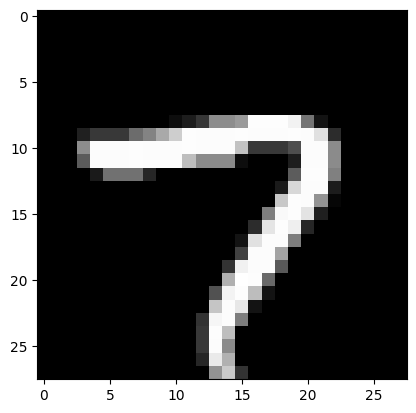

In [ ]:
# NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.
# To visualize the position and iage at that random position in gray scale color map

i = np.random.randint(0, 60000)
print(i)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray');

In [ ]:
#.............................Preprocessing to be compatible with Tensorflow.................................................

In [ ]:
# The images are 28x28 and 1 color channel (i.e. grayscale rather than something like 3 for RGB). So, adding 1 for color channel.
# The 2D convolution layer in Keras expects the number of channels (by default as the last dimension)
# The syntax has first parameter as X_train.shape[0] which means 60000.

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

# For colored images change syntax to X_train = X_train.reshape(X_train.shape[0], 28, 28, 3).astype('float32')

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# Maximum and minimum value in X_train: 0 for black pixel and 255 for white pixel

X_train[0].min(), X_train[0].max()

(0.0, 255.0)

In [ ]:
# To train a neural network We need to normalize this data because the range is too big and the neural network would take a longer time to process.
# This is a common process when working with neural networks.
# We will recreate the variable x_train = x_train - 127.5, which is half of 255 divided by 127.5. Generally scaled data lies b/w 0 to 1 but DCGANs prefer -1 to 1.

X_train = (X_train - 127.5) / 127.5

In [ ]:
X_train[0].min(), X_train[0].max()

(-1.0, 1.0)

In [ ]:
# Variables required to divide the datatset into batches

buffer_size = 60000   # Total number of Images
batch_size = 256      # Total number of batches

In [ ]:
buffer_size / batch_size      # Each batch contains 234 images.

234.375

In [ ]:
# The result states that we are going to divide the entire image dataset into 256 batches and each batch will contain 234 images
# We will use mini-batch gradient descent algorithm.
# According to it: It means that we are going to send one batch with 234 image then the weights will be adjusted.
# After that, we send one more batch which is composed by 234 images then the weights are updated.
# We are going to send the images batch by batch.

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# We need to convert to the TensorFlow format to send it to the neural network.

X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [ ]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [ ]:
X_train    # X_train is now in form of set of batches i.e. batch dataset

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [ ]:
# ..................................................... Creating networks of GANs i.e., Generator and Discriminator ...........................................

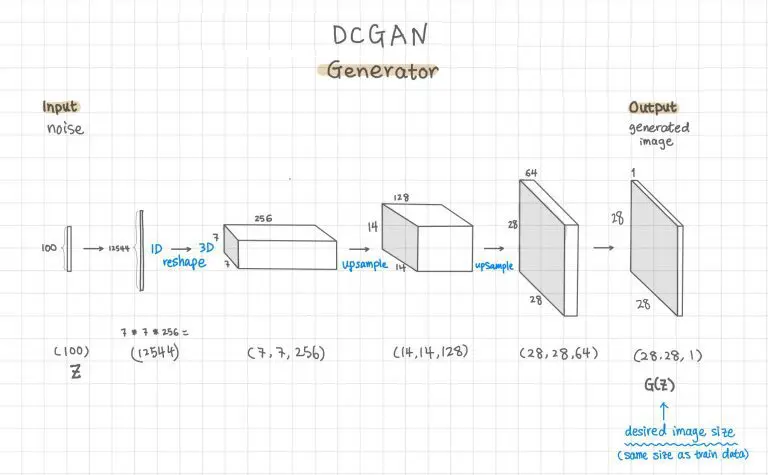

The generator’s job is to generate plausible images. Its objective is trying to fool the discriminator into thinking its generated images are real.

* The generator takes random noise as an input and outputs an image that resembles the training images.
* Since we are generating a 28x28 gray-scale image here, the model architecture needs to make sure we arrive at a shape such that the generator output should be 28x28x1

So to be able to create the image, the generator’s main tasks are:
1. Convert the 1D random noise (latent vector) to 3D with the Reshape layer
2. Upsample a few times with Keras Conv2DTranspose layer (fractional or strided convolution), to the output image size, in the case of MNIST, a grayscale image in the shape of 28x28x1.
3. There are a few layers forming building blocks for G:
  * Dense (fully connected) layer: only for reshaping and flatting the noise vector
  * Conv2DTranspose: upsampling
  * BatchNormalization: stabilize training; after the conv layer and before the activation function.
  * Use ReLU activation in G for all layers except for the output, which uses tanh


  # Kernel: https://en.wikipedia.org/wiki/Kernel_(image_processing)
  # Stride and Kernel on cnn: https://makeyourownneuralnetwork.blogspot.com/2020/02/calculating-output-size-of-convolutions.html
  # https://towardsdatascience.com/understand-transposed-convolutions-and-build-your-own-transposed-convolution-layer-from-scratch-4f5d97b2967
  

In [ ]:
# The first step is to create a function def build generator.
# It does not receive any parameter.

def build_generator():

  # Step 1: # Create a sequential model using TensorFlow's Keras API.

  # This model will be used to generate synthetic images.
  # (fully connected)            nn -( basic reading )

  network = tf.keras.Sequential()

  # .........................................................................................................................................
  # Step 2: Add layers to the dense network to prepare for reshaping to 3D
 # 
  network.add(layers.Dense(units = 7*7*256, use_bias = False, input_shape=(100,)))

  # Add a fully connected layer (Dense) with 7*7*256 units,
  # which takes a 100-dimensional random noise vector as input.
  # Here 'units' parameter is the number of neurons i.e. 7*7*256 = 12,544 neurons
  # in first layer of neural network.
  # use_bias=False means no bias terms are used in this layer.
  # We don't need to use it in the generator since we are not actually training a
  # neural network to classify images.
  # The last parameter input shape. It is the number of neurons in the input layer of the neural network.
  # The default value for Gans is 100. Thus, 100 neurons in the input layer, are connected to 12,544 neurons.

  # ..........................................................................................................................................

  # Step 3: Apply normalization calculation in the layers of the neural network.

  network.add(layers.BatchNormalization())

  # Add a batch normalization layer to normalize the activations
  # of the previous layer. Batch normalization helps stabilize training.

  # ..........................................................................................................................................

  # Step 4: Activation Layer: The next step is to add the activation layer layers and
  # Add a Leaky ReLU activation function to introduce non-linearity in the network
  # so that the networks can learn the relationship between the input and output values.

  network.add(layers.LeakyReLU())

  # ReLU stands for rectified linear activation unit which returns 0 for any negative input, but for any positive value x, it returns that value back.
  # Leaky ReLU function is an improved version of the ReLU to prevent dying ReLU problem
  # Leaky ReLU returns x for any positive input, but for any negative value of x, it returns a really small value which is 0.01 times x.

  # Step 5: # Reshape the output of the previous layers to have a shape of (7, 7, 256).
  # To convert a vector to matrix.

  network.add(layers.Reshape((7,7,256)))

  # Step 6: The next step is adding our upscaling convolutional layers using Conv2DTranspose to increase the dimensions of image.
  # https://keras.io/api/layers/convolution_layers/convolution2d_transpose/
  # # Add a transposed convolutional layer with 128 filters and 'same' padding.
  # 7x7x128
  network.add(layers.Conv2DTranspose(filters = 128, kernel_size = (5,5), padding = 'same',
                                     use_bias = False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())



  # Add another transposed convolutional layer with 64 filters, larger stride (2, 2), and 'same' padding.
  # Stride will increase the window that will perform the calculation and convert 7x7 to 14x14 and
  # later to 28x28
  # 14x14x64
  network.add(layers.Conv2DTranspose(filters = 64, kernel_size = (5,5), padding = 'same',
                                     strides = (2,2), use_bias = False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # In the end we need a 28 x 28 image as was given in imput an image of same size
  # # Add a final transposed convolutional layer with 1 filter,
  # larger stride (2, 2), and 'same' padding.
  # The activation function 'tanh' is used to ensure the output values are in the range [-1, 1],
  # suitable for image data.
  # 28x28x1
  network.add(layers.Conv2DTranspose(filters = 1, kernel_size = (5,5), padding = 'same',
                                     strides = (2,2), use_bias=True, activation='tanh'))

  network.summary()

  return network

In [ ]:
# To visualize network summary
# We can see converting from vector (None, 12544) to Matrix (None, 7, 7, 256)

generator = build_generator()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (Batch  (None, 12544)             50176     
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 7, 7, 128)         819200    
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 128)         5

In [ ]:
# We observe that generator receives as inputs a vector with 100 numbers.

generator.input

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_input')>

In [ ]:
noise = tf.random.normal([1, 100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-1.47448480e-01, -9.34782863e-01, -1.08024776e-01,
        -2.25211028e-02, -1.02645612e+00, -4.03562784e-01,
         1.44515204e+00, -4.28444505e-01, -4.29833017e-04,
        -1.12301457e+00,  1.17253721e+00,  1.57385409e+00,
        -4.57759708e-01,  9.20633376e-01, -7.12639213e-01,
         7.87388504e-01, -1.38300791e-01, -5.68795264e-01,
        -8.44931602e-01, -9.68981624e-01,  1.24196184e+00,
        -5.55450559e-01,  1.39520779e-01, -2.88877994e-01,
         1.67014655e-02,  1.38790593e-01, -9.11117554e-01,
         8.21005285e-01, -8.96407425e-01,  2.22962052e-01,
        -9.15160418e-01,  1.23448394e-01,  8.51260349e-02,
         1.48819661e+00,  5.53022563e-01,  6.28769934e-01,
        -1.87589693e+00,  2.12895781e-01,  4.39145744e-01,
         7.23233745e-02,  1.43972540e+00, -7.77000964e-01,
         2.20207870e-01,  1.80661273e+00, -3.13336062e+00,
        -1.30240822e+00, -2.10141730e+00, -8.65443766e-01,
      

In [ ]:
# # Generate an image using the generator model by passing
# the random noise as input.
# Set the training mode to False to ensure that the generator
# doesn't update its parameters during this generation.

generated_image = generator(noise, training = False)

In [ ]:
generated_image.shape     # Out is 1 image of 28 x 28 dimensions and 1 color channel

TensorShape([1, 28, 28, 1])

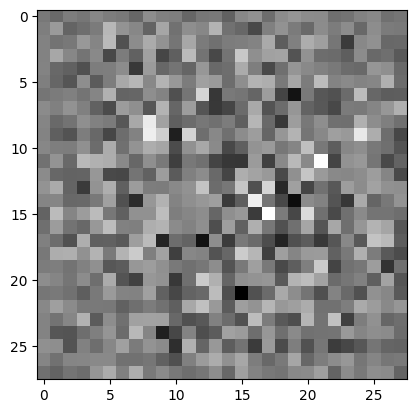

In [ ]:
plt.imshow(generated_image[0, :,:,0], cmap='gray')
# To plot all dimension in TensorShape([1, 28, 28, 1]) --> [0, :,:,0]
# In [1, 28, 28, 1] -> first 1 is image, 28 x 28 image dimensions and last 1 is color channels

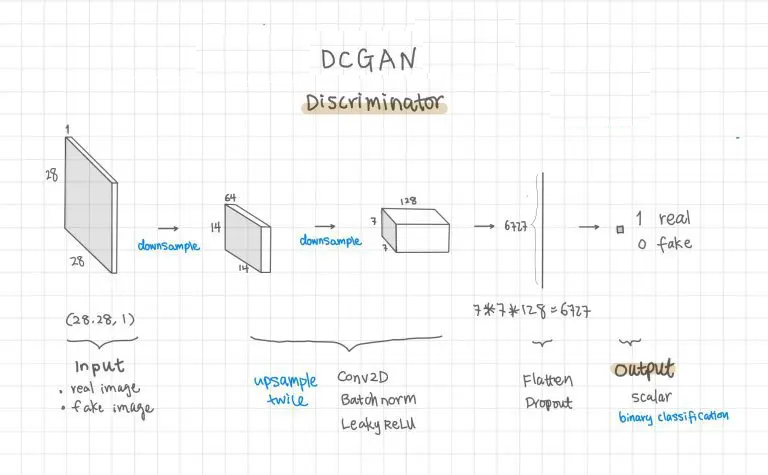

In [ ]:
def build_discriminator():
  network = tf.keras.Sequential()

  # The structure of discriminator works opposite to that of a Generator i.e from 28 -> 14 -> 7
  # when we implement a convolutional neural network for classification, we need to reduce
  # the size as oppose to Conv2D transpose

  # 14x14x64
  network.add(layers.Conv2D(filters = 64, strides = (2,2), kernel_size = (5,5), padding = 'same',
                            input_shape = [28,28,1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  # 7x7x128
  network.add(layers.Conv2D(filters = 128, strides = (2,2), kernel_size = (5,5), padding = 'same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  # Use Dropout to prevent overfitting of Neural Network.
  # All neurons from one layer are connected to all other neurons of the next layer.
  # When we apply dropout, we just don't consider all the neurons and the value 0.3 means that
  # 30% of the neurons will be deleted during training.

  # Finally, we need to convert from the matrix format to the vector format using layers.flatten.
  network.add(layers.Flatten())

  # Next we are going to use only one neuron at the output layer since it will return a probability or a number between 0 and 1.
  network.add(layers.Dense(1))

  network.summary()

  return network

In [ ]:
discriminator = build_discriminator()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

In [ ]:
7 * 7 * 128     # We see that 6272 neurons are connected to the last layer

6272

In [ ]:
discriminator.input    # Input to discriminator is an image of dimension 28 by 28

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
discriminator(generated_image, training = False)  # Here we test discriminator with image generated by Generator. Training = False since we are not training our NN

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00086577]], dtype=float32)>

In [ ]:
# The result is in logits format i.e. not processed
# The output above gives numpy=array([[-0.00086577]] which is not a probablity factor since no activation function is applied yet.
# So, next we apply an activation function -> sigmoid To translate it to probabilities

In [ ]:
tf.sigmoid(-0.00081761)           # Output gives  numpy=0.49979565 i.e. 50% probablity for image to be real.

<tf.Tensor: shape=(), dtype=float32, numpy=0.49979565>

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

# The binary cross entropy is a calculation used in binary classification.
# We are using from Logits equals true because the output of the discriminator is logits (something that humans cannot interpret)

**Error calculation**
Logits: https://deepai.org/machine-learning-glossary-and-terms/logit
This method quantifies how well the discriminator is able to distinguish real images from fakes images. It compares the discriminator predictions on real images with an array of 1s and the discriminator predictions on fake (generated) images with an array of 0s.

In [ ]:
def discriminator_loss(expected_output, fake_output):

  # Compute the loss for real images by comparing them
  # to a tensor of ones (real labels).

  real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)

  # Since real images are equivalent to one, For this reason, we are comparing
  # the expected outputs, the real images with number ones.

  # Compute the loss for fake images by comparing them to a tensor of zeros (fake labels).

  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)

  # Calculate the total discriminator loss by summing the real and fake losses.

  total_loss = real_loss + fake_loss
  return total_loss

In [ ]:
# # Define the generator loss function,
# which measures the error in fooling the discriminator.

def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

# Compute the loss by comparing the generator's output
# to a tensor of ones (indicating that the generator wants
# to fool the discriminator).
# we need to compare the fake outputs with a vector of ones because the generator must
# learn how to create images that are similar to the ones in the real world.
# For this reason, we need to compare with a vector of ones because as you already know, one means images
# similar to the ones in the real world.

In [ ]:
# # Create optimizers for the generator and discriminator.
# These optimizers are used to update the neural network weights
# during training.  we need an optimizer, for example,
# the gradient descent to find the best weights for the neural network.
# Let's access the optimizers package and we are going to use the Adam algorithm, which is an improvement
# on the gradient descent.

generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)

In [ ]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [ ]:
epochs = 100
noise_dimension = 100
number_of_images = 16

In [ ]:
batch_size, noise_dimension

(256, 100)

In [ ]:
# # Annotate the following function with `tf.function` to enable
# TensorFlow's autograph feature, which compiles the function
# for better performance.

@tf.function
def train(images):

  # # Generate random noise for the batch of images.
  noise = tf.random.normal([batch_size, noise_dimension])

  # # Use gradient tapes to record operations for gradient calculation.
  # We are going to calculate the gradient or the direction to update the weights of the generator.

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    # Generate fake images using the generator model.
    generated_images = generator(noise, training = True)

    # Calculate the discriminator's outputs for both real and fake images.
    expected_output = discriminator(images, training = True)
    fake_output = discriminator(generated_images, training = True)

    # Compute generator and discriminator losses.
    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(expected_output, fake_output)

  # Calculate gradients of the losses with respect
  # to the trainable variables of the generator and discriminator.
  generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  # Apply gradients to update the generator and
  # discriminator using their respective optimizers.
  generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

In [ ]:
tf.config.run_functions_eagerly(True)
X_train_batch = X_train.as_numpy_iterator().next()
train(X_train_batch)

In [ ]:
test_images = tf.random.normal([number_of_images, noise_dimension])
test_images.shape

TensorShape([16, 100])

In [ ]:
60000 / 256

234.375

In [ ]:
generated_images =[]
def train_gan(dataset, epochs, test_images):
  for epoch in range(epochs):
    #print(epoch)
    for image_batch in dataset:
      #print(image_batch.shape)
      train(image_batch)

    print('Epoch: ', epoch + 1)
    generated_images = generator(test_images, training = False)
    fig = plt.figure(figsize = (10,10))
    for i in range(generated_images.shape[0]):
      plt.subplot(4,4,i + 1)  # The subplot method has 3 arguments: rows, columns and index of the current plot.
      plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
    plt.show()

Epoch:  1


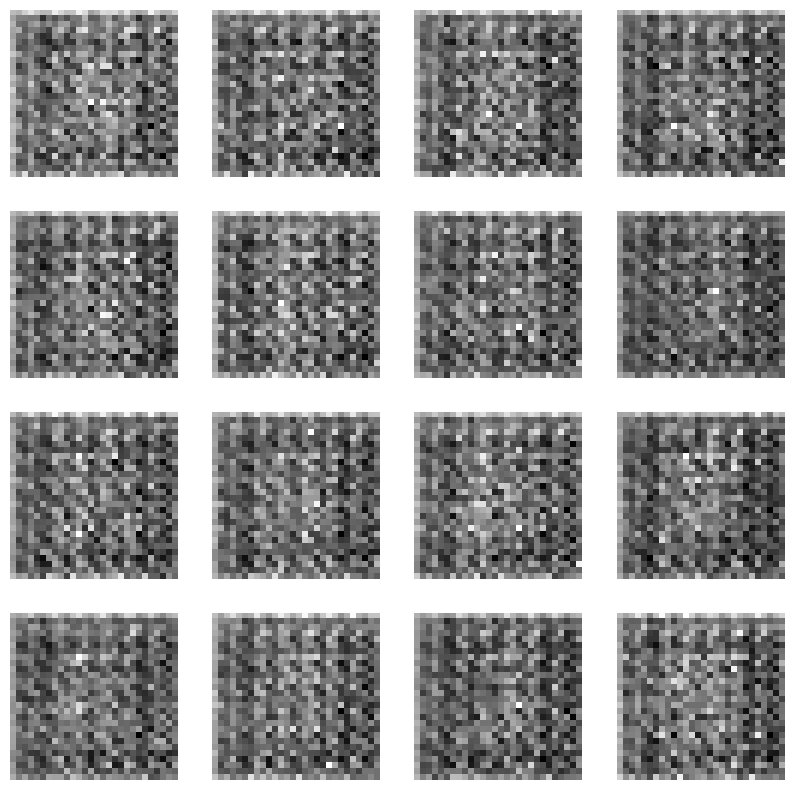

Epoch:  2


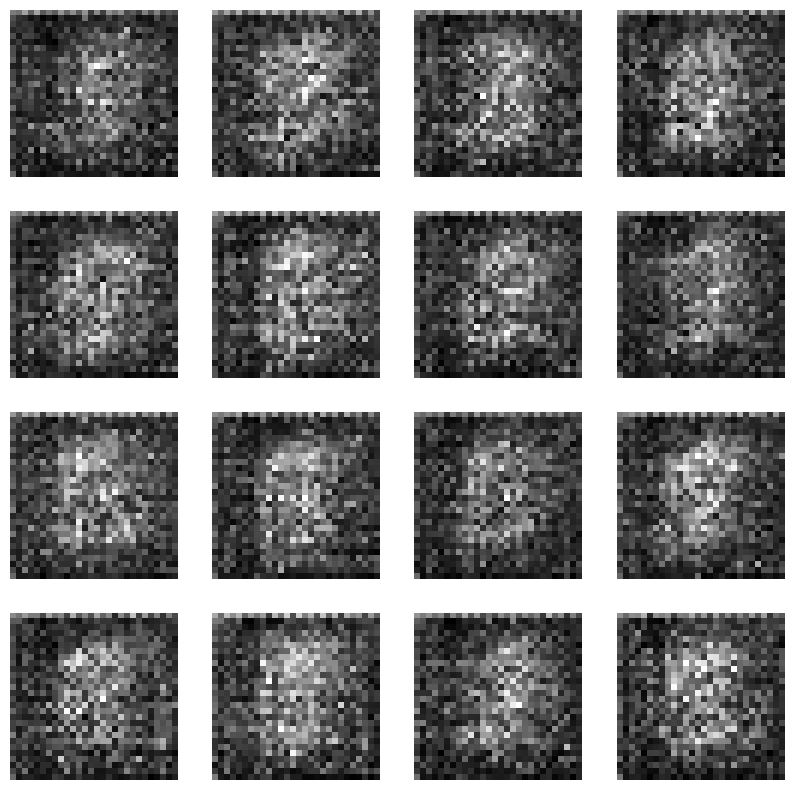

Epoch:  3


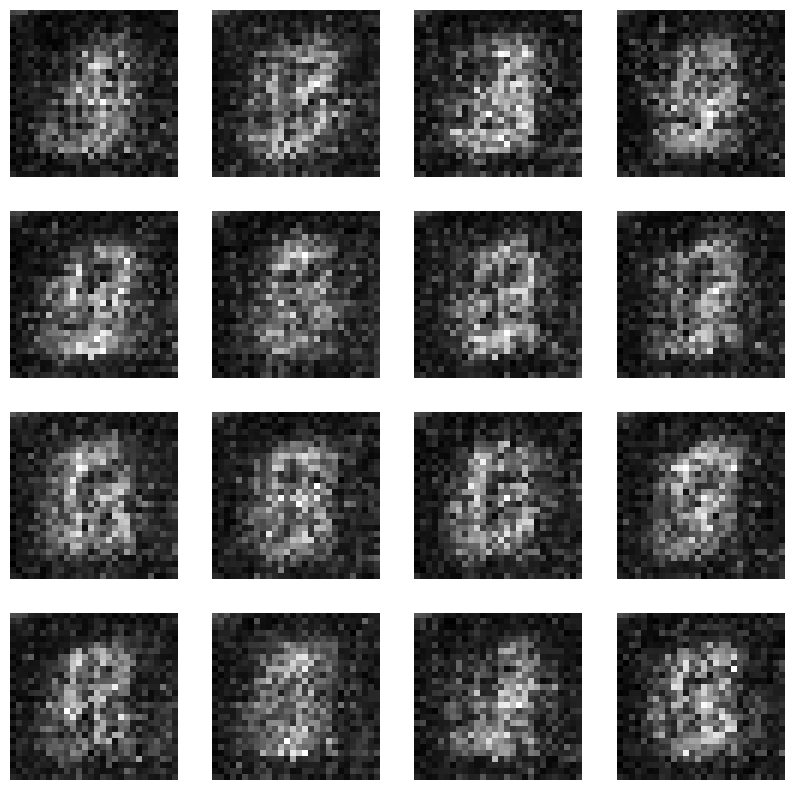

Epoch:  4


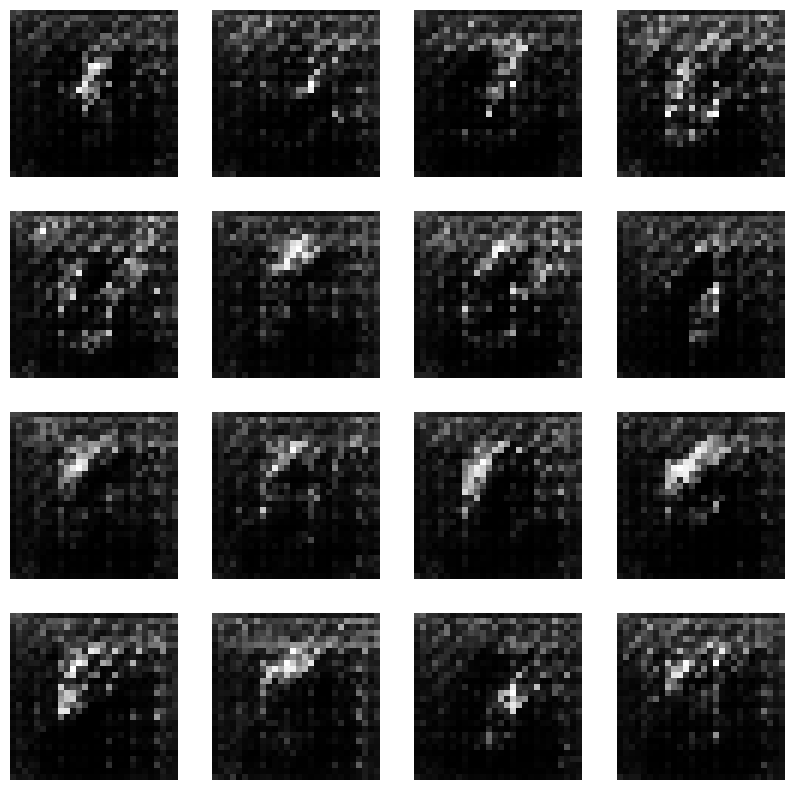

Epoch:  5


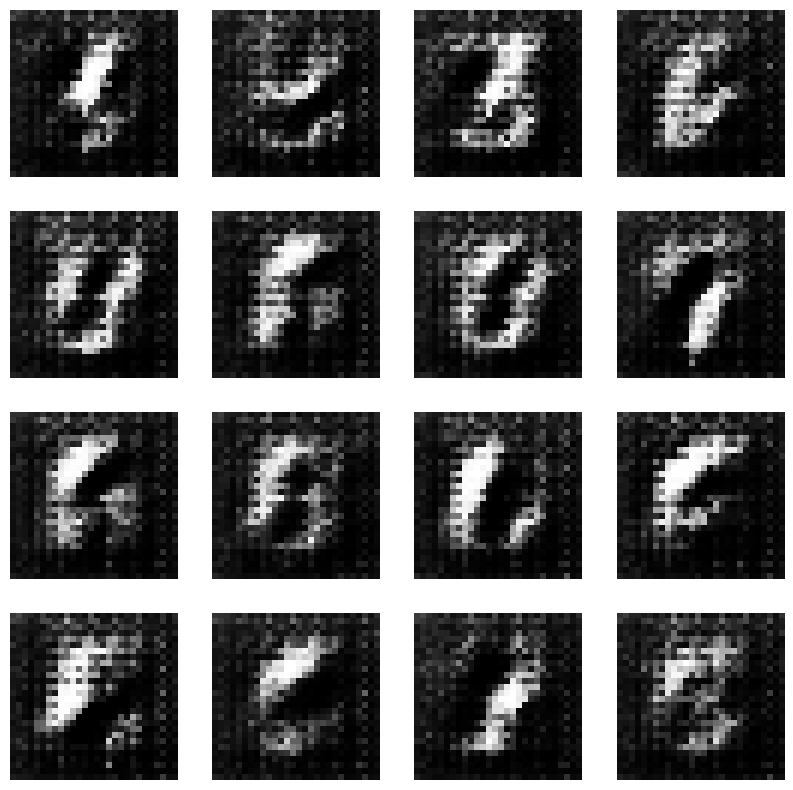

Epoch:  6


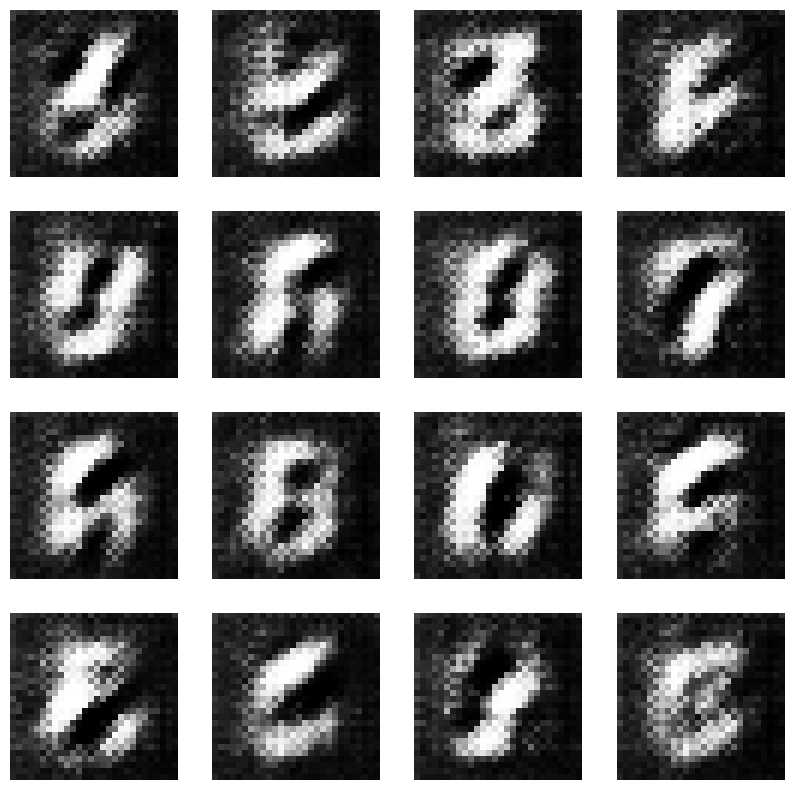

Epoch:  7


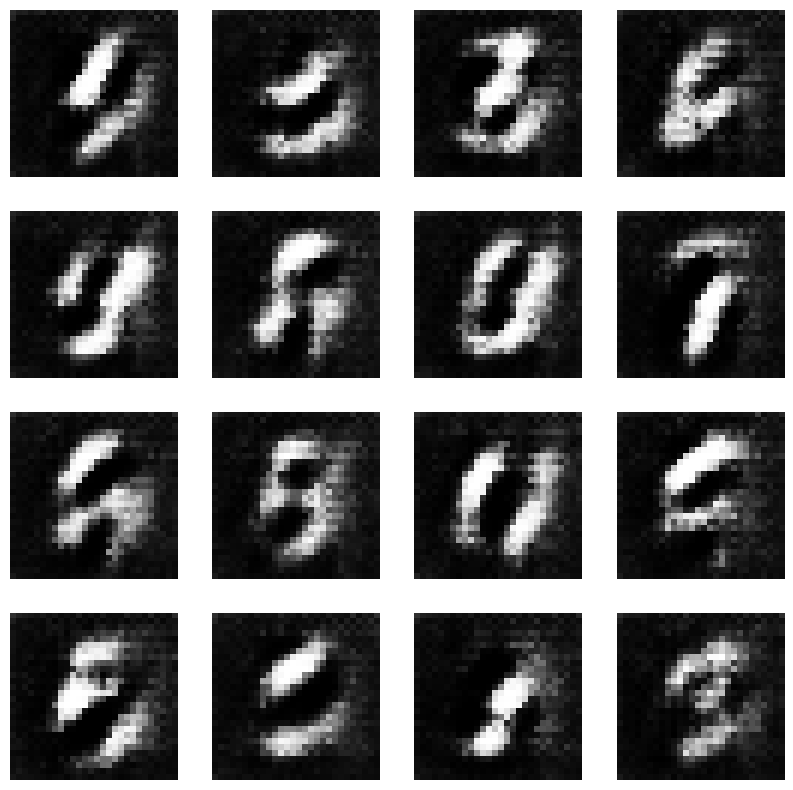

Epoch:  8


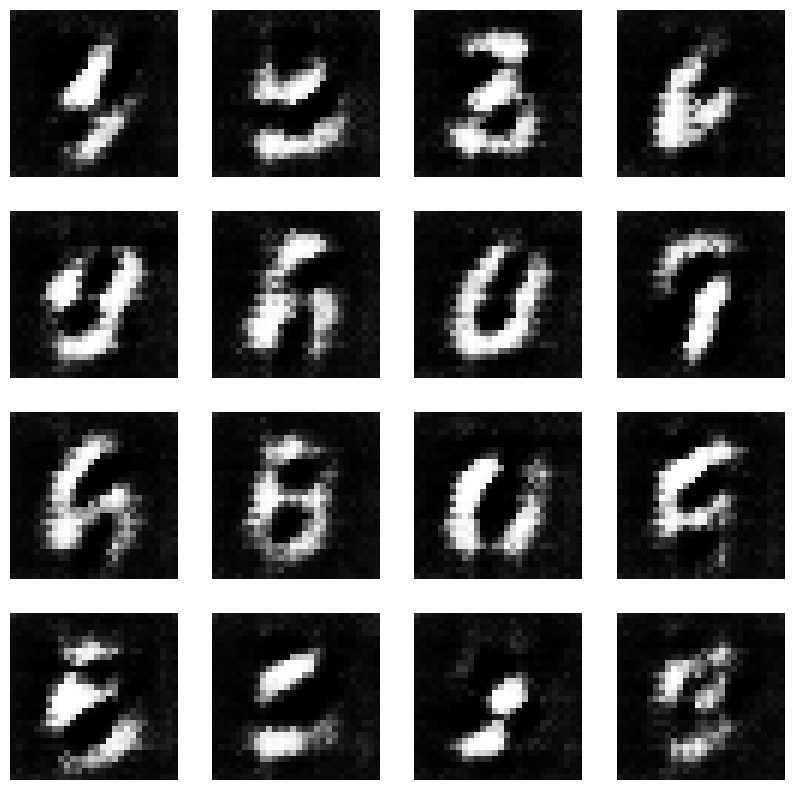

Epoch:  9


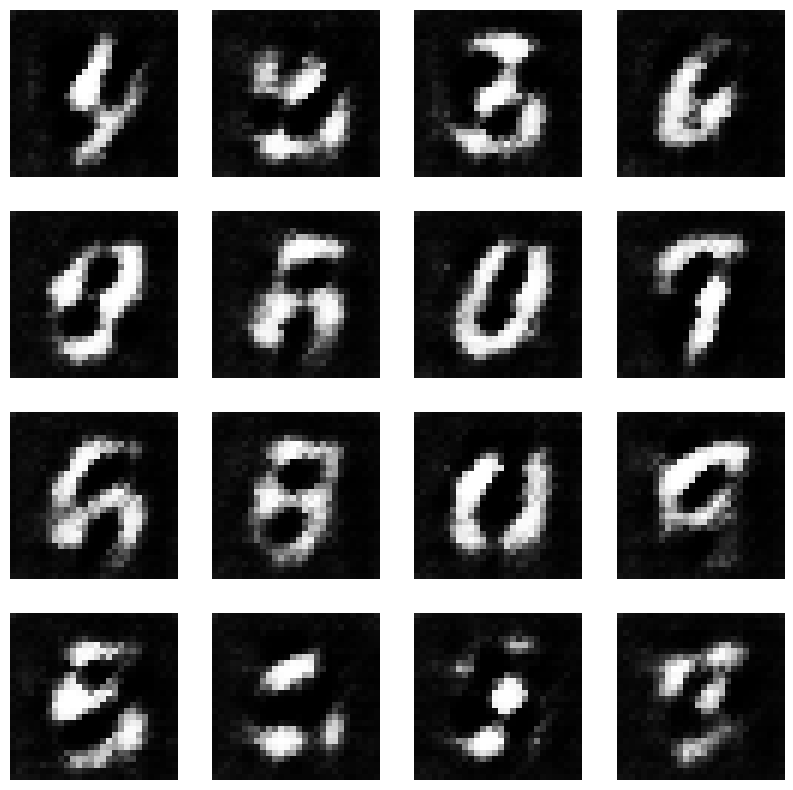

Epoch:  10


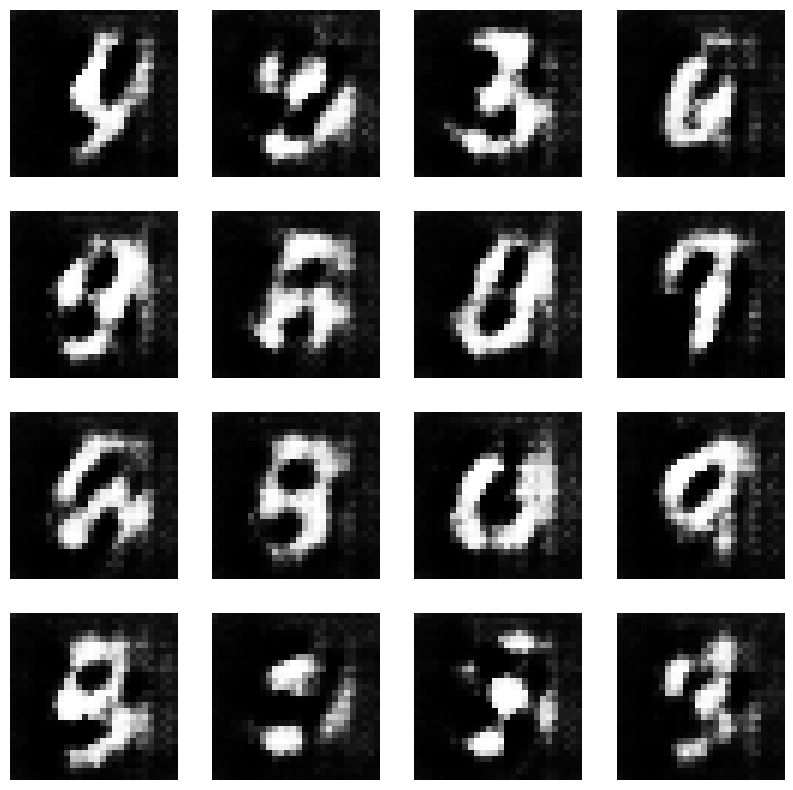

Epoch:  11


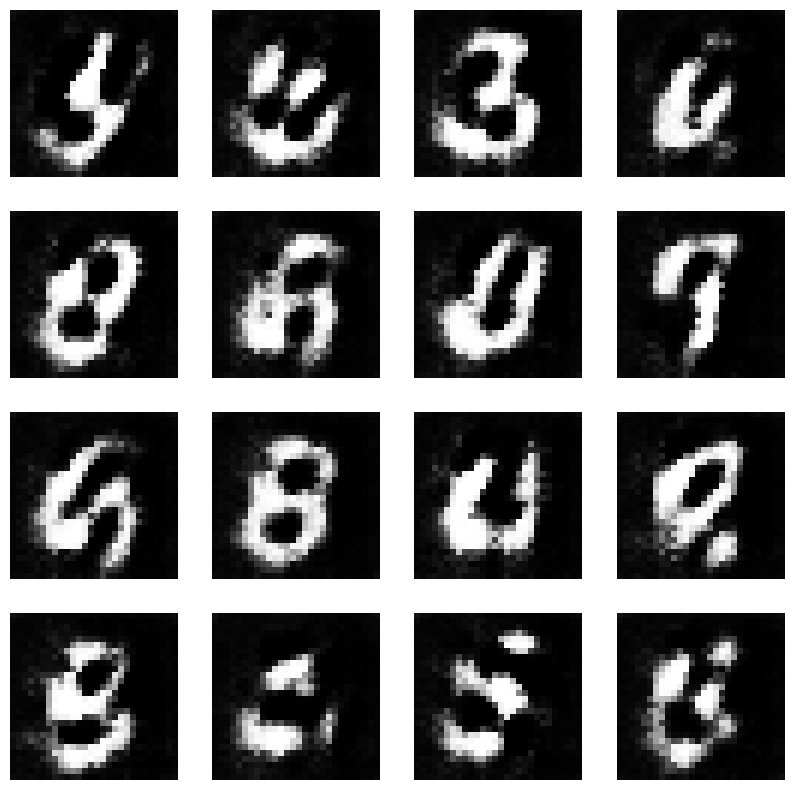

Epoch:  12


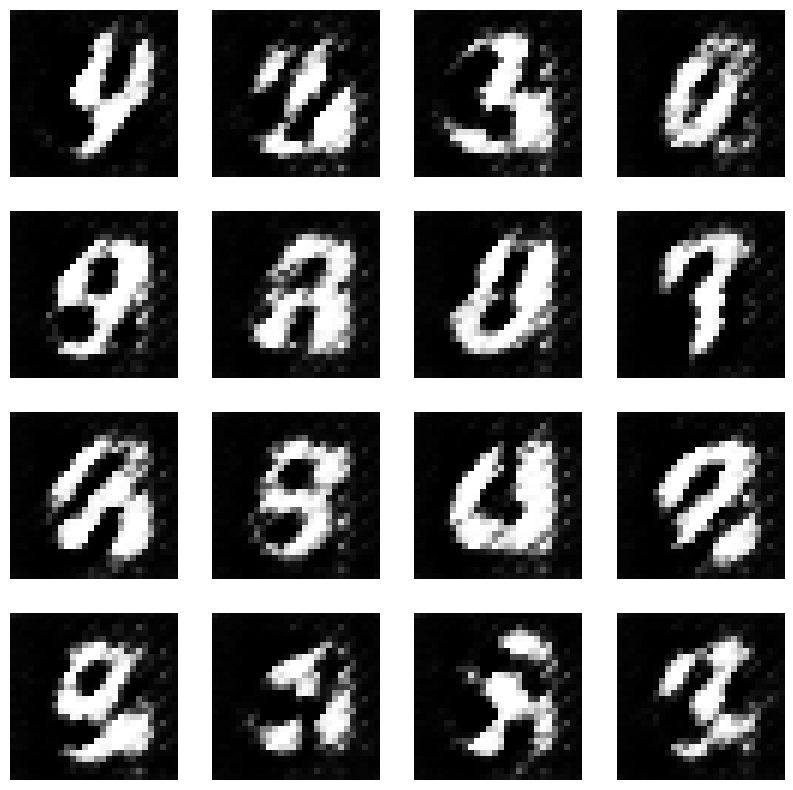

Epoch:  13


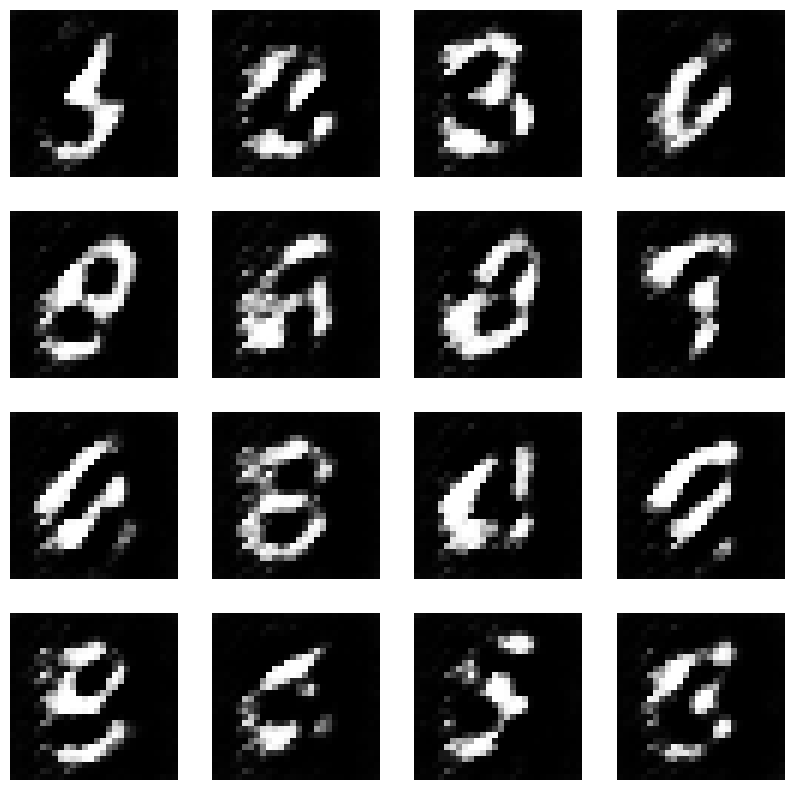

Epoch:  14


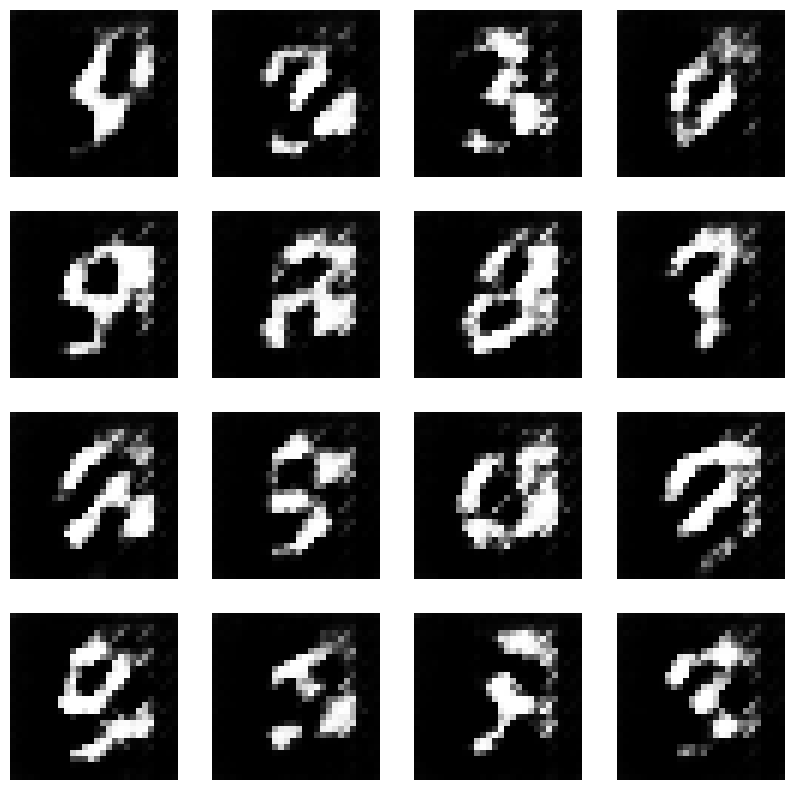

Epoch:  15


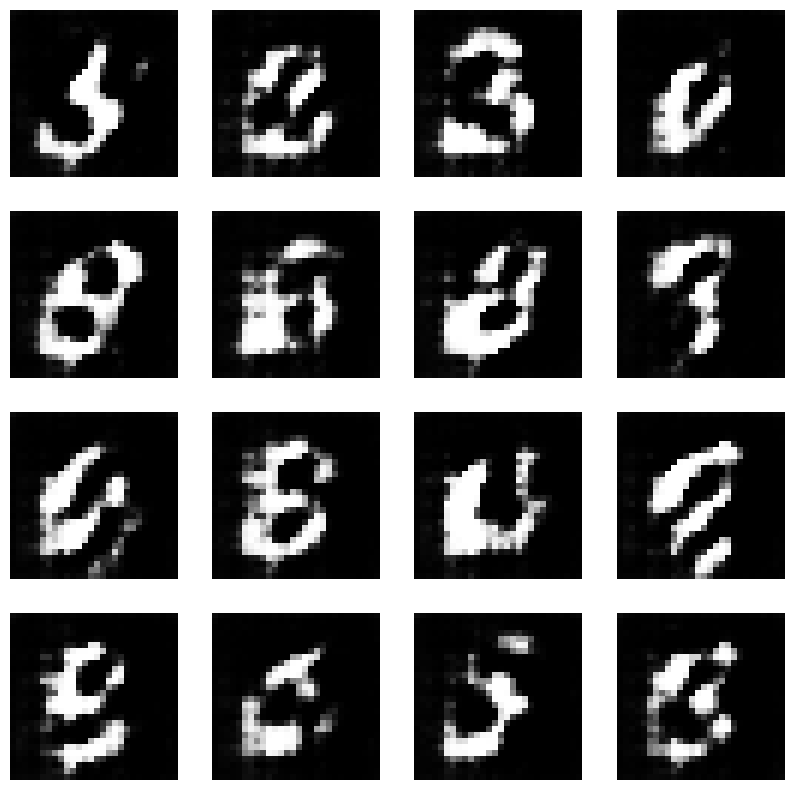

Epoch:  16


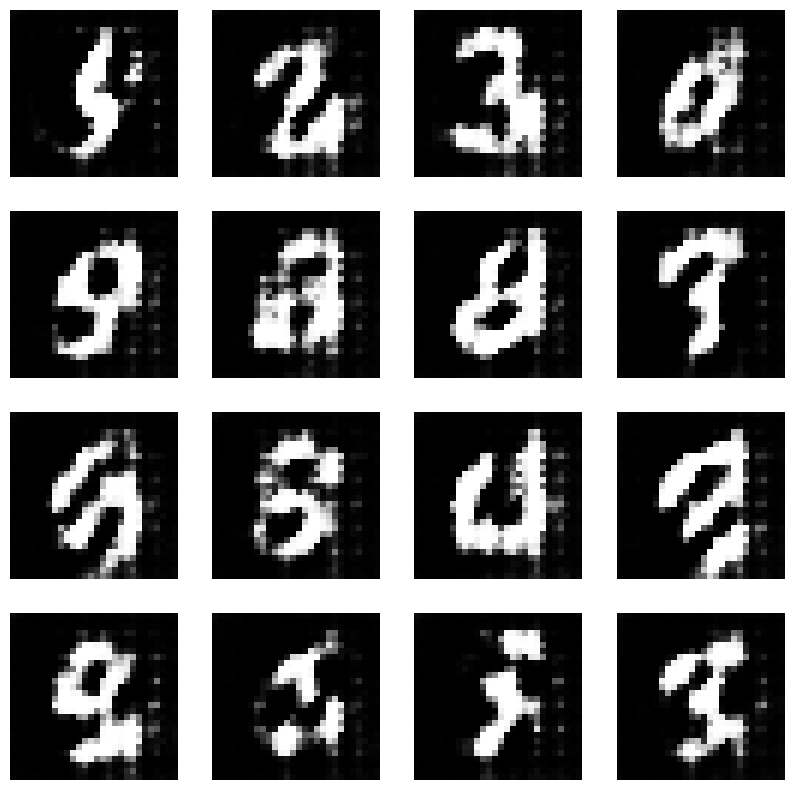

Epoch:  17


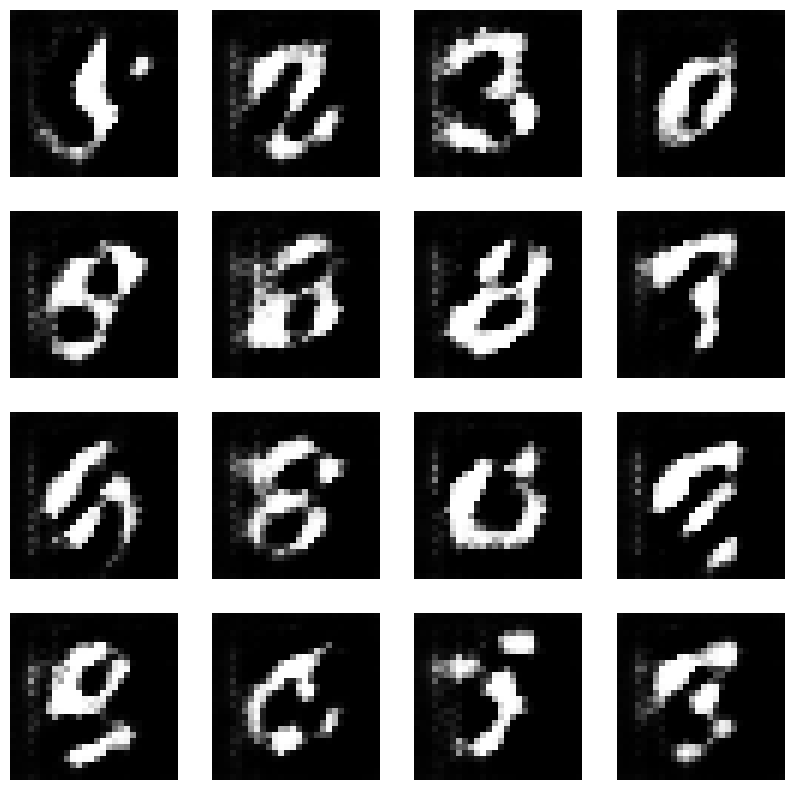

Epoch:  18


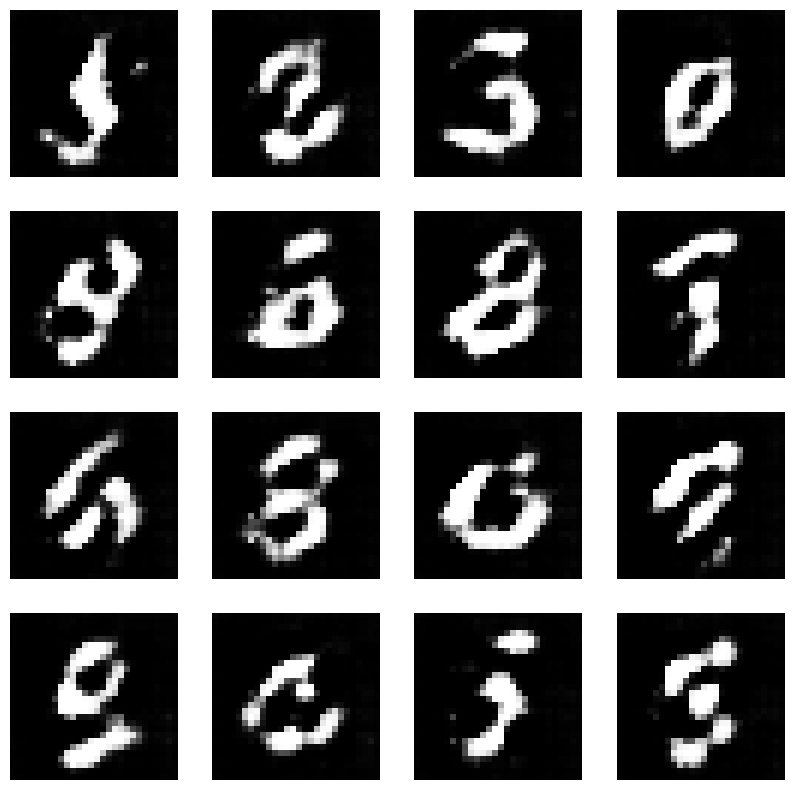

Epoch:  19


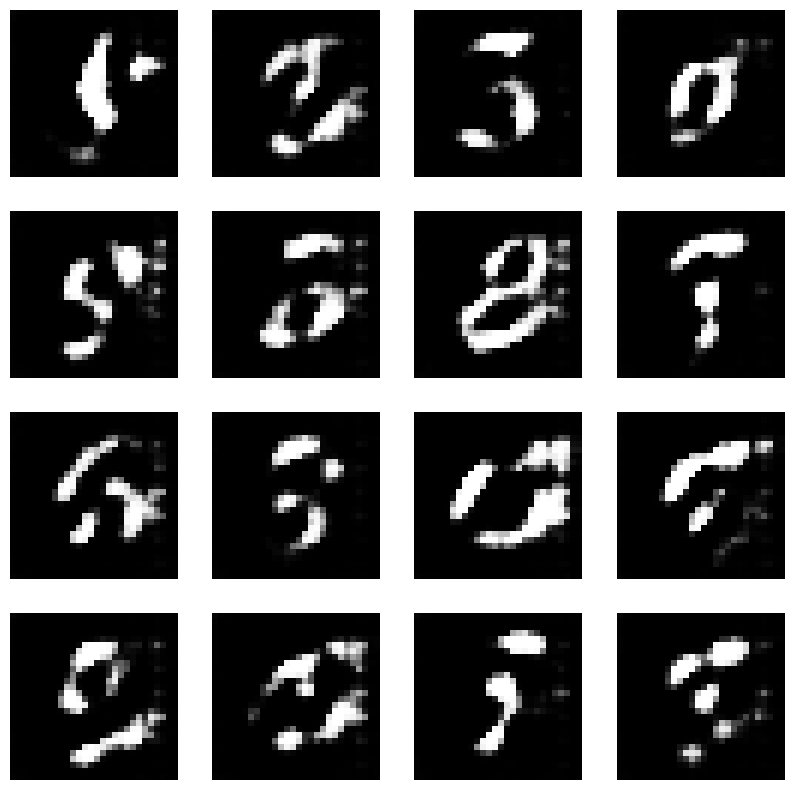

Epoch:  20


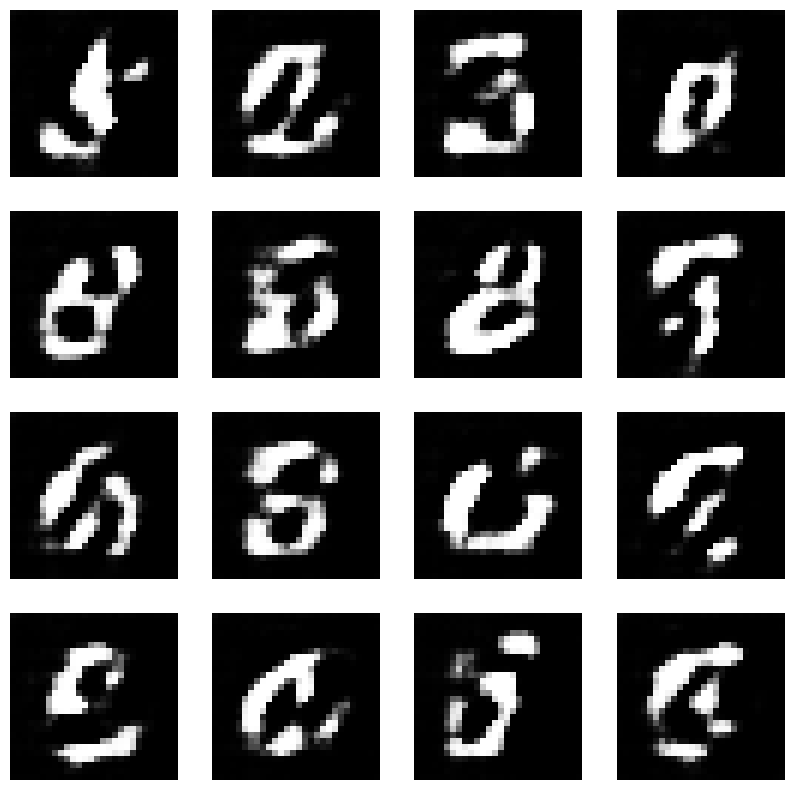

Epoch:  21


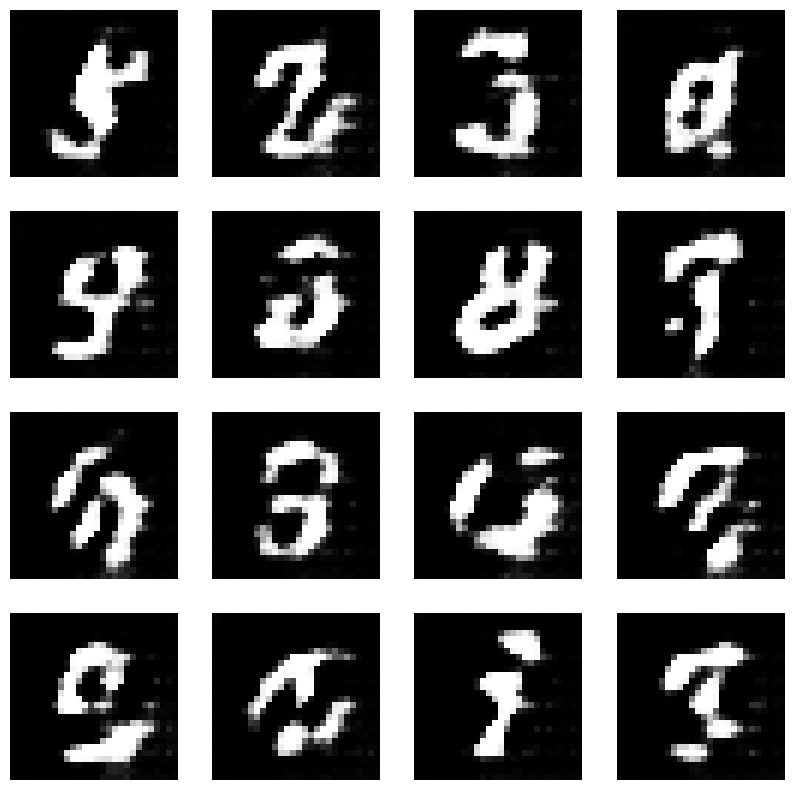

Epoch:  22


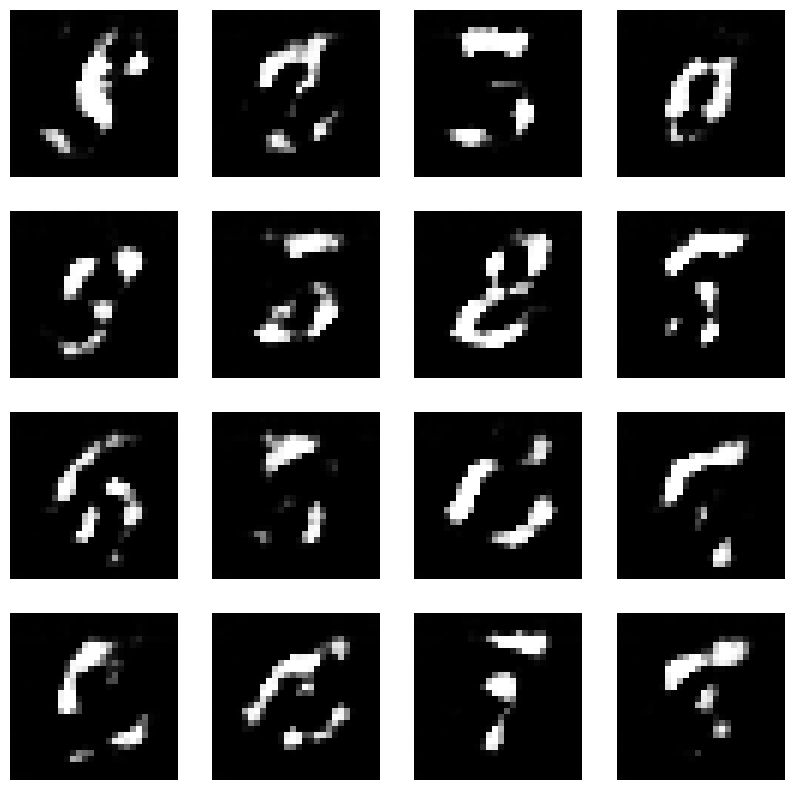

Epoch:  23


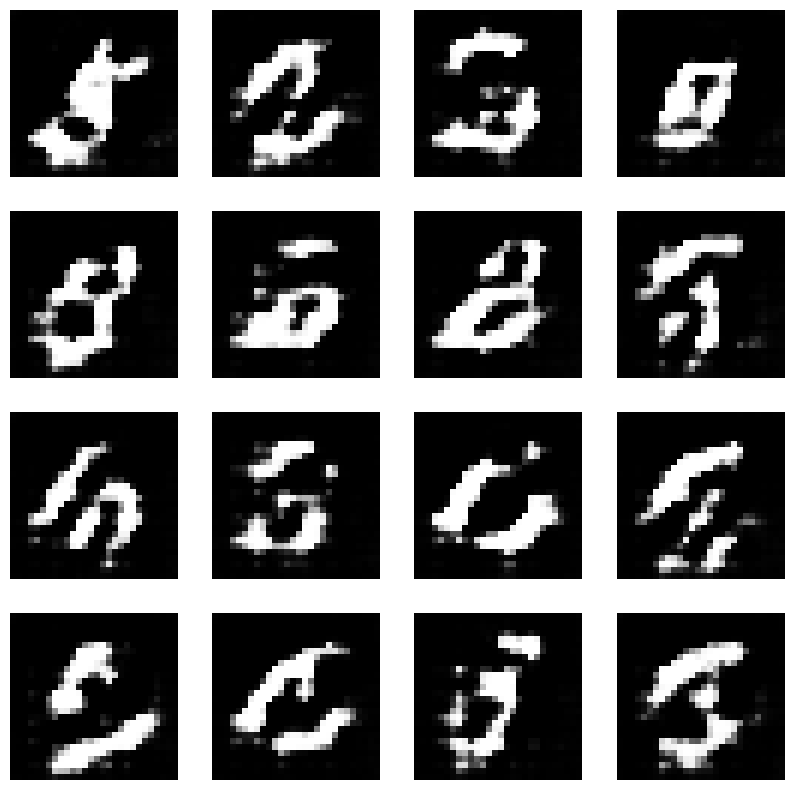

Epoch:  24


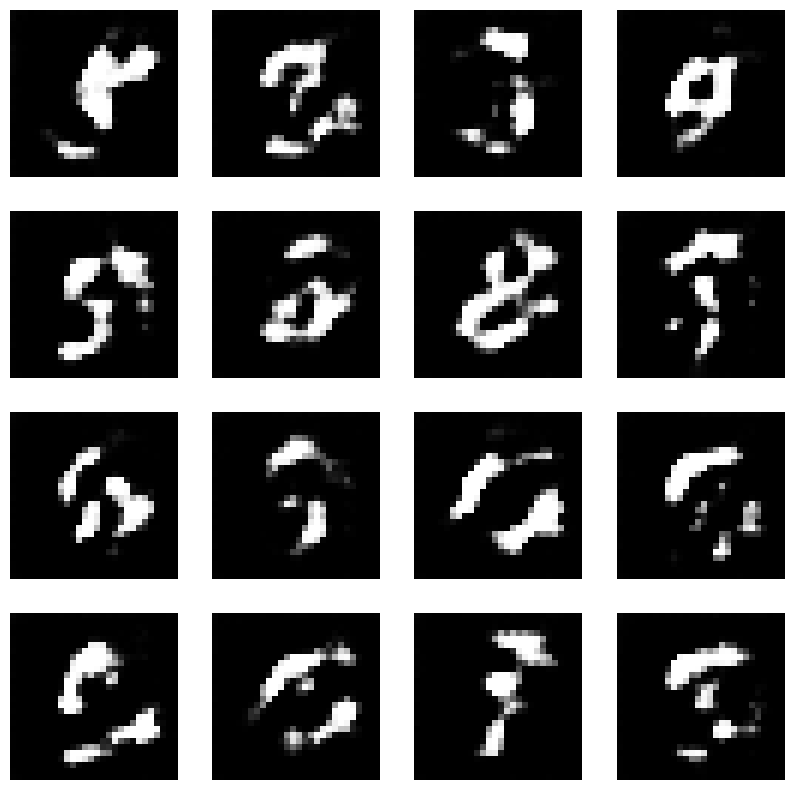

Epoch:  25


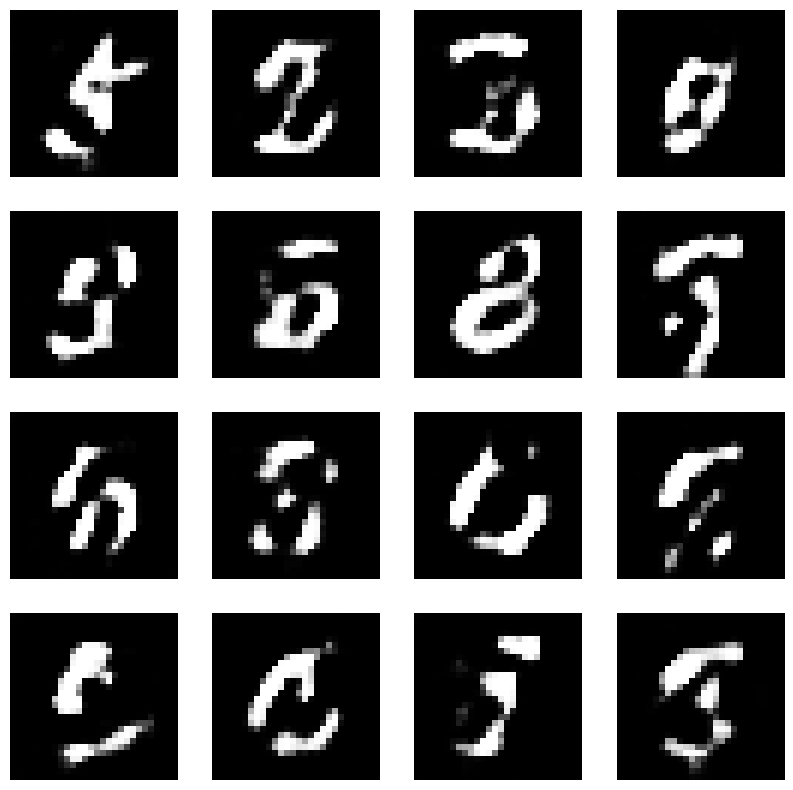

Epoch:  26


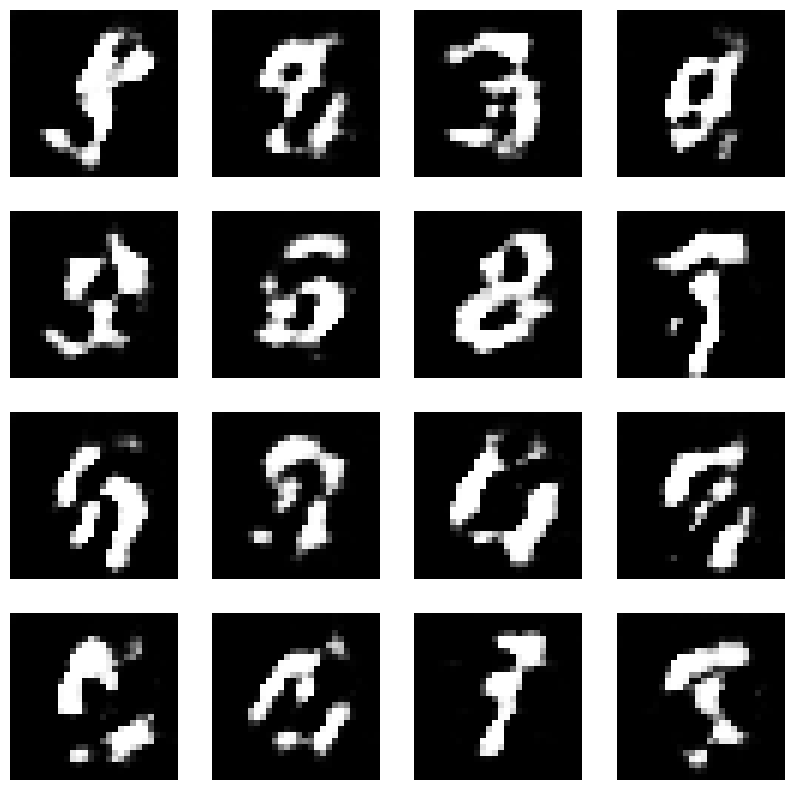

Epoch:  27


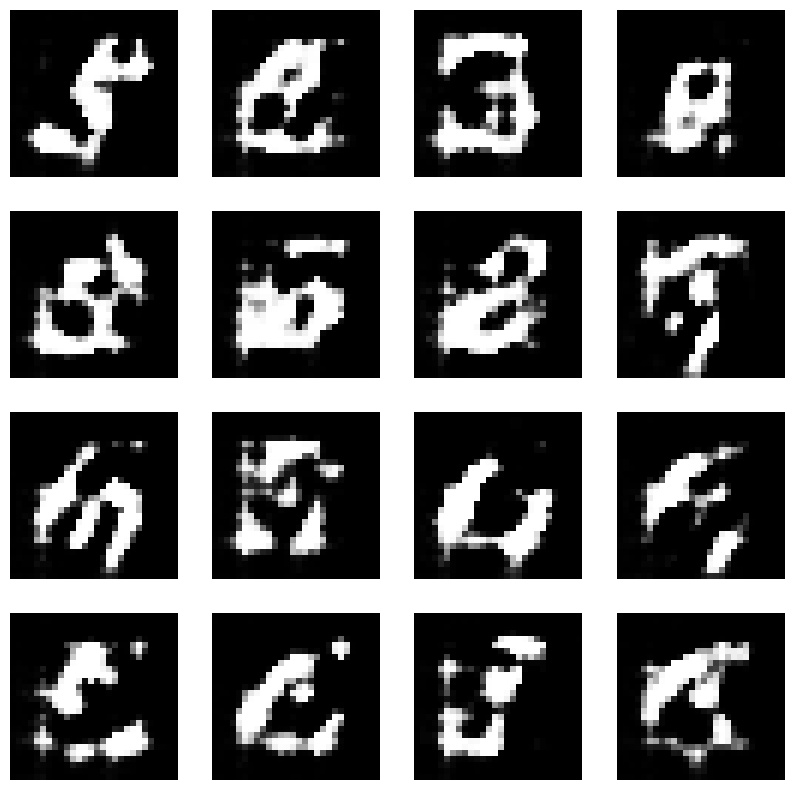

Epoch:  28


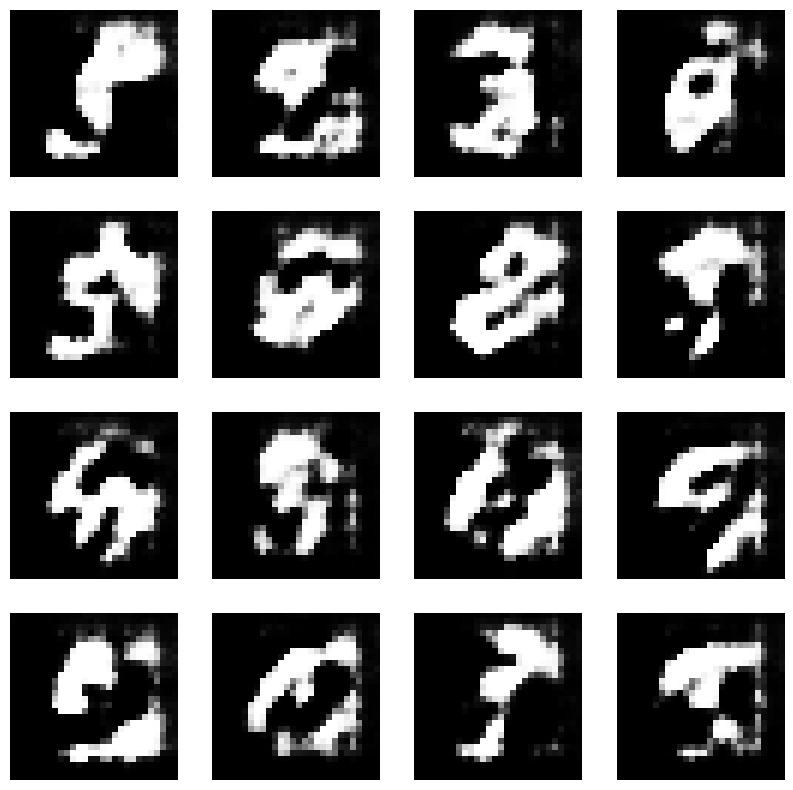

Epoch:  29


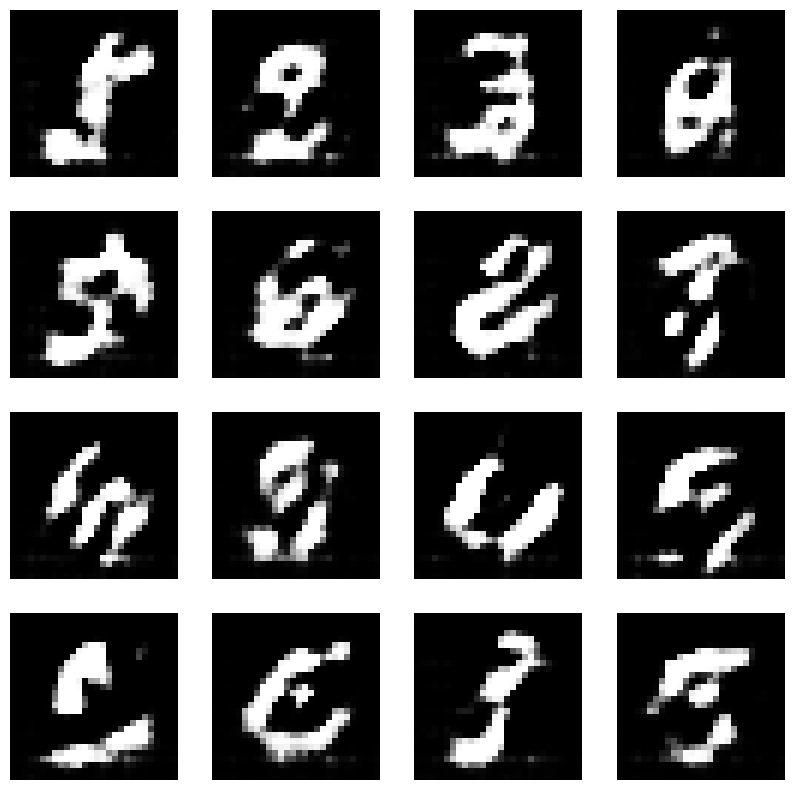

Epoch:  30


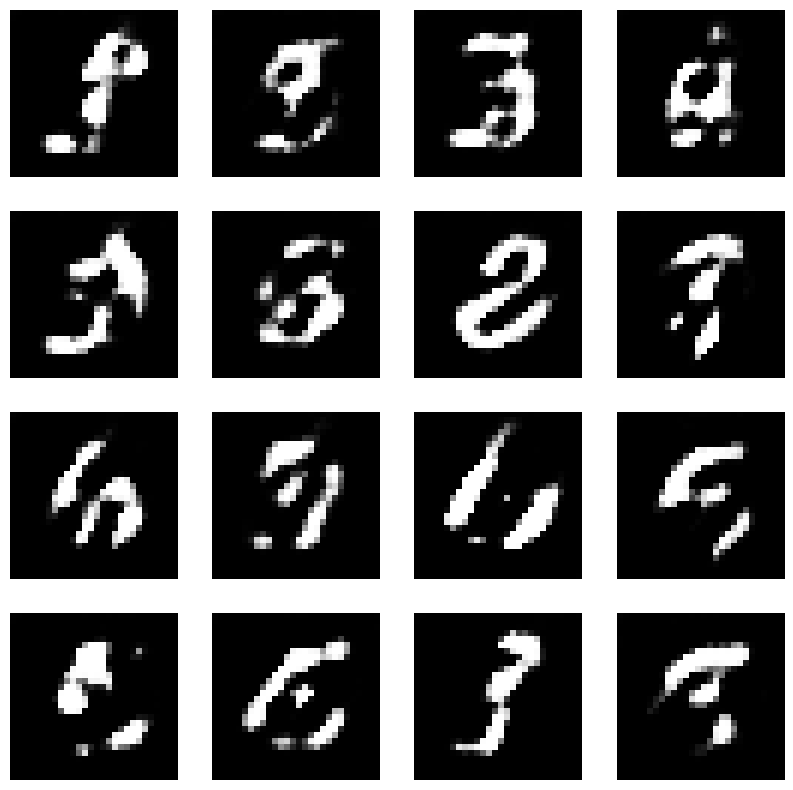

Epoch:  31


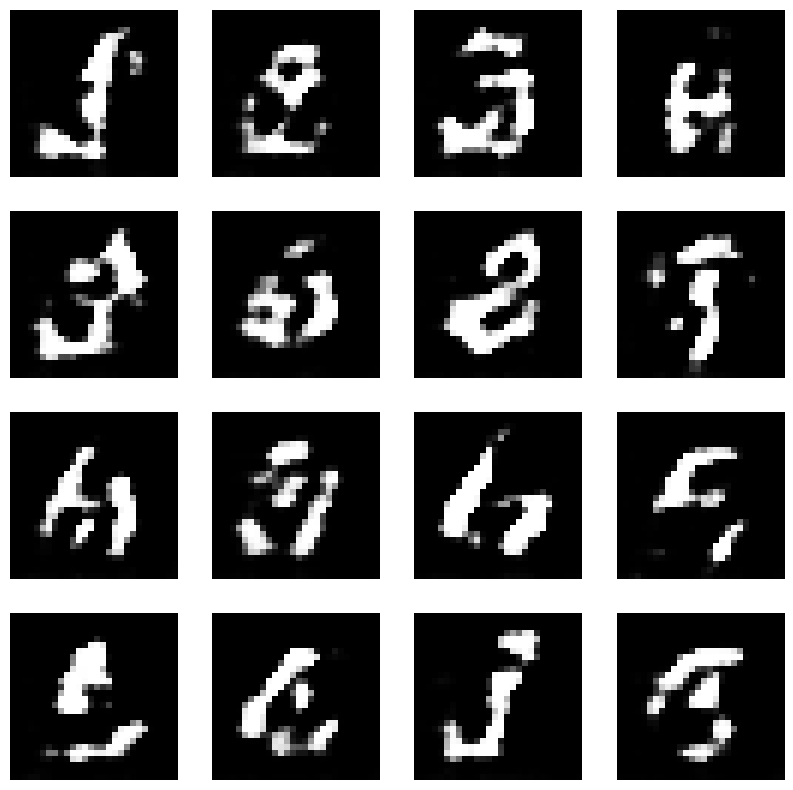

Epoch:  32


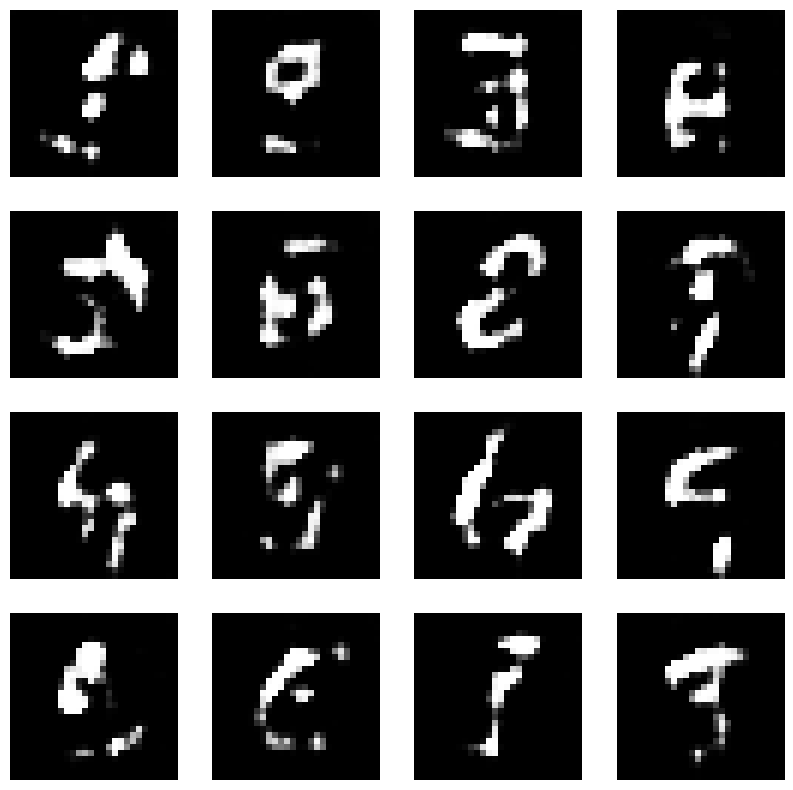

Epoch:  33


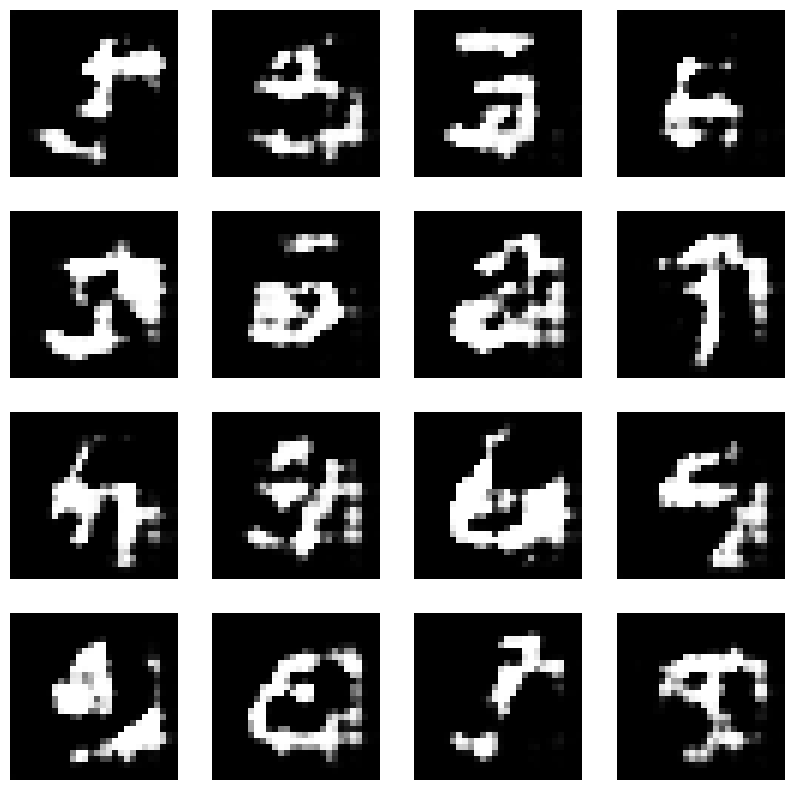

Epoch:  34


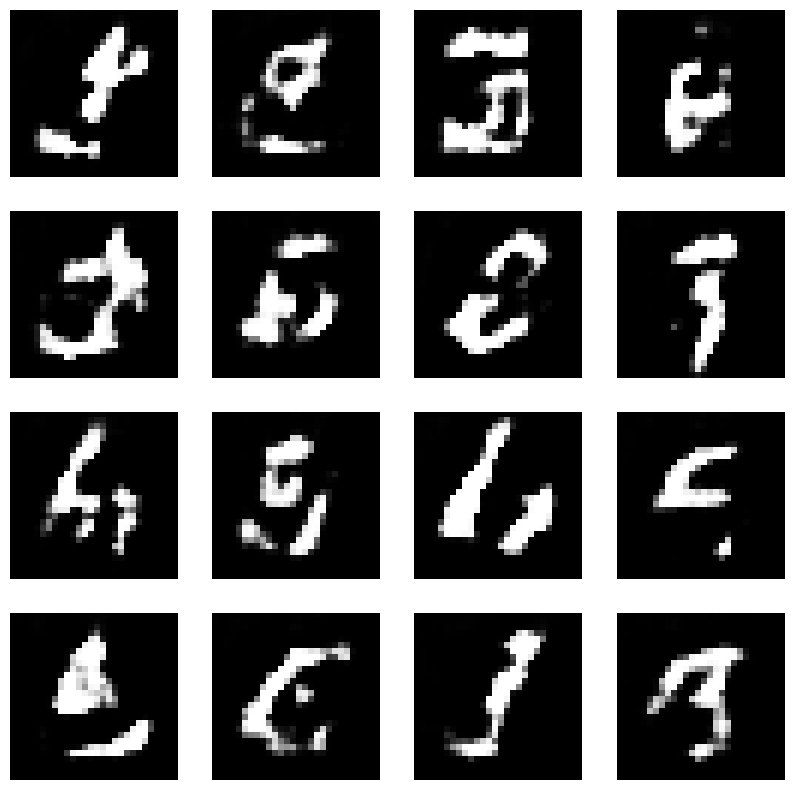

Epoch:  35


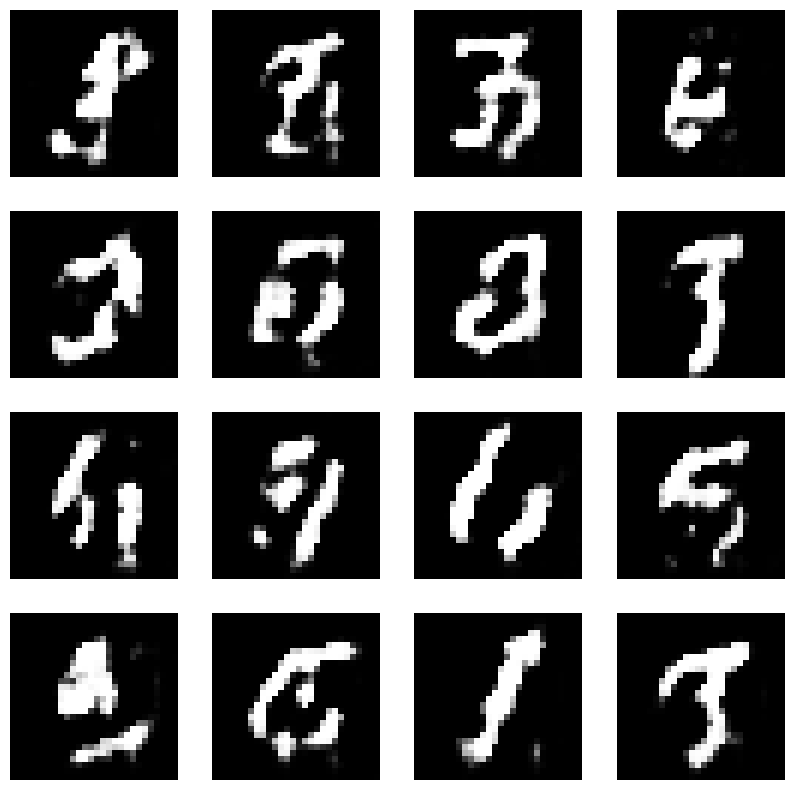

Epoch:  36


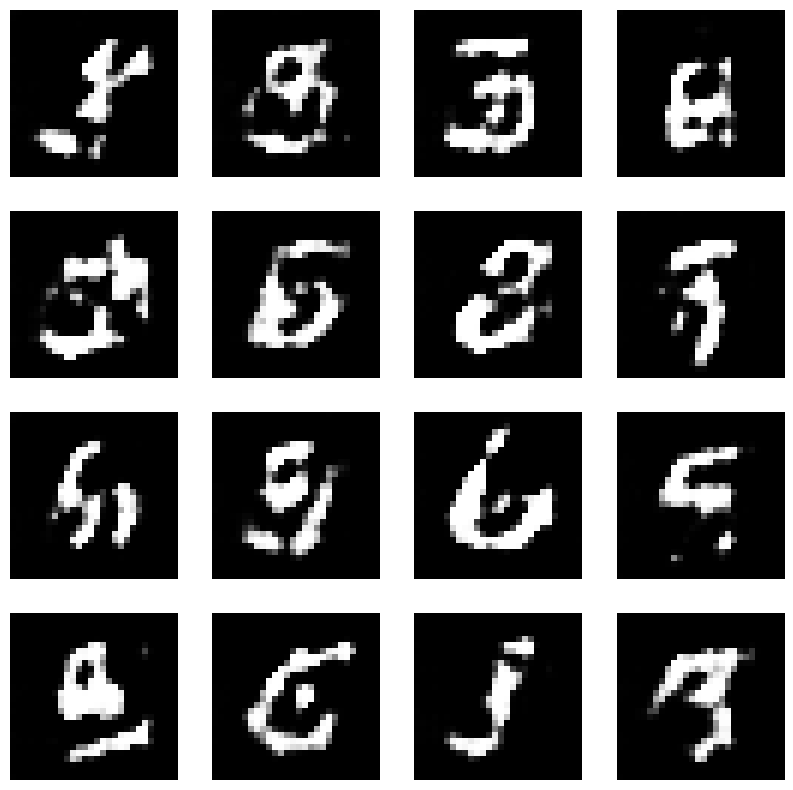

Epoch:  37


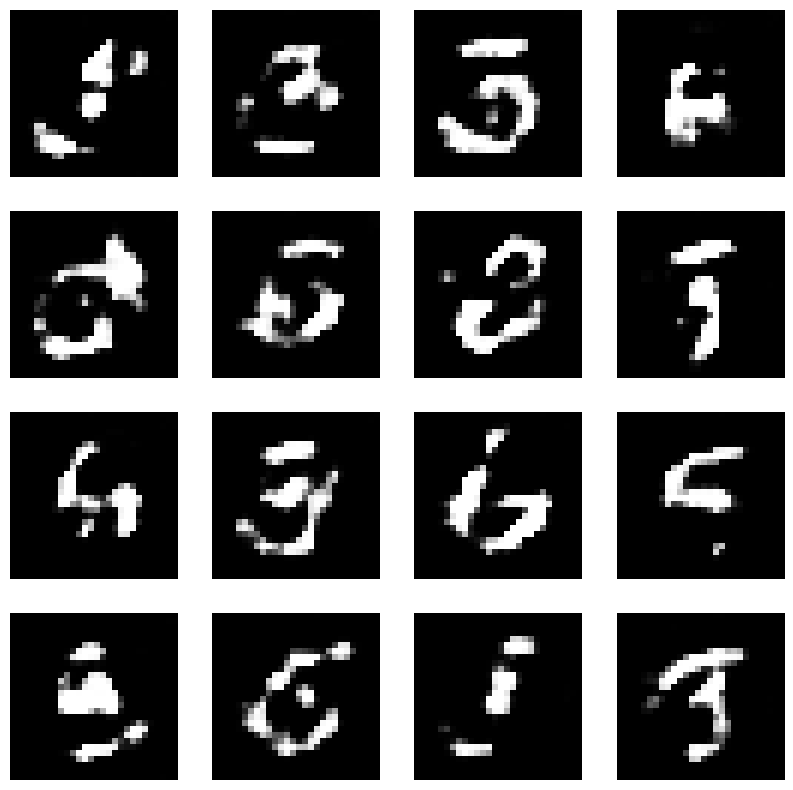

Epoch:  38


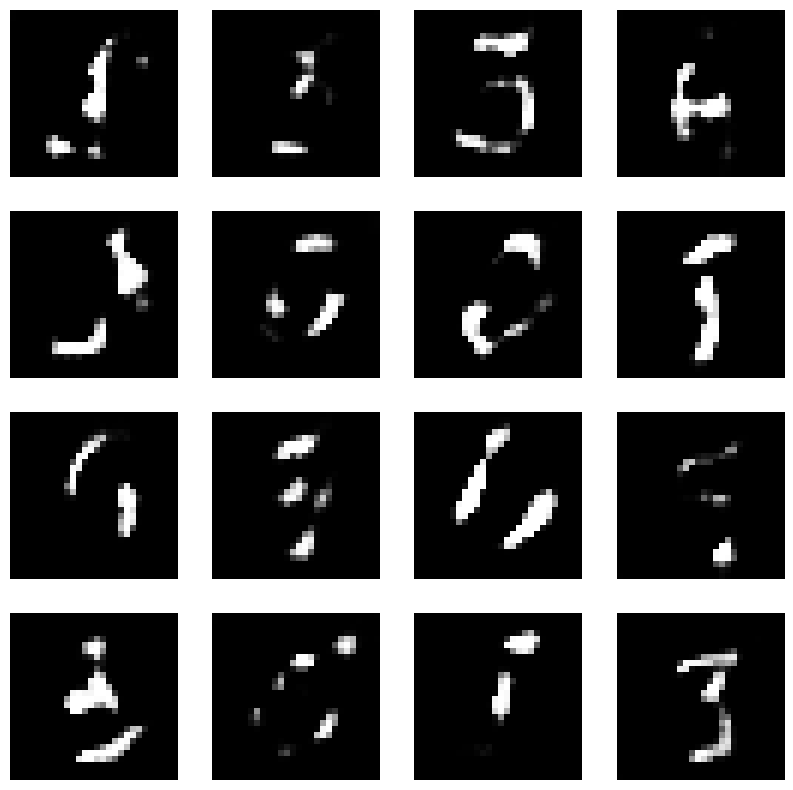

Epoch:  39


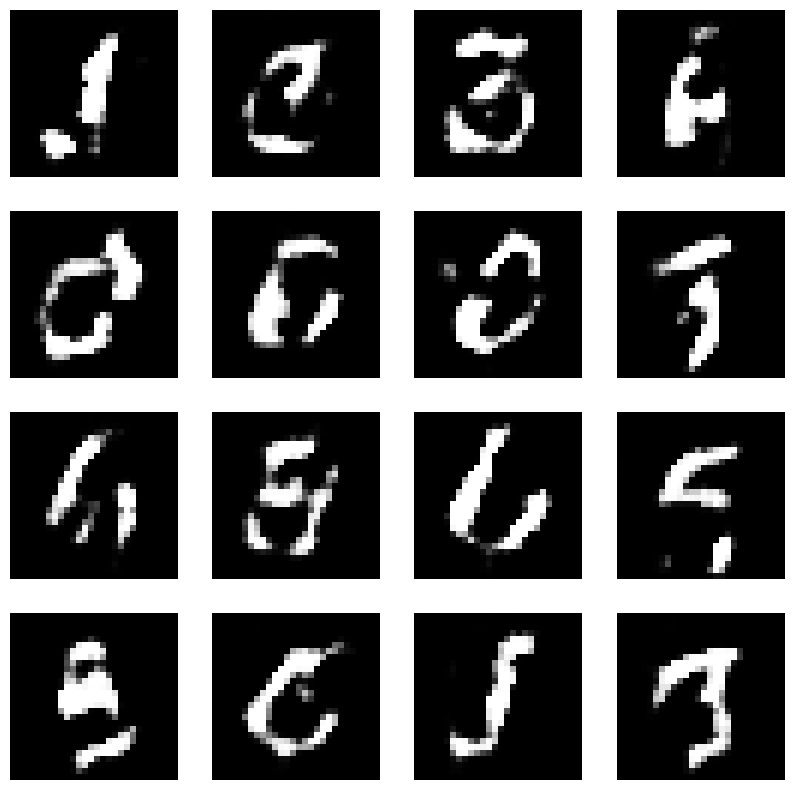

Epoch:  40


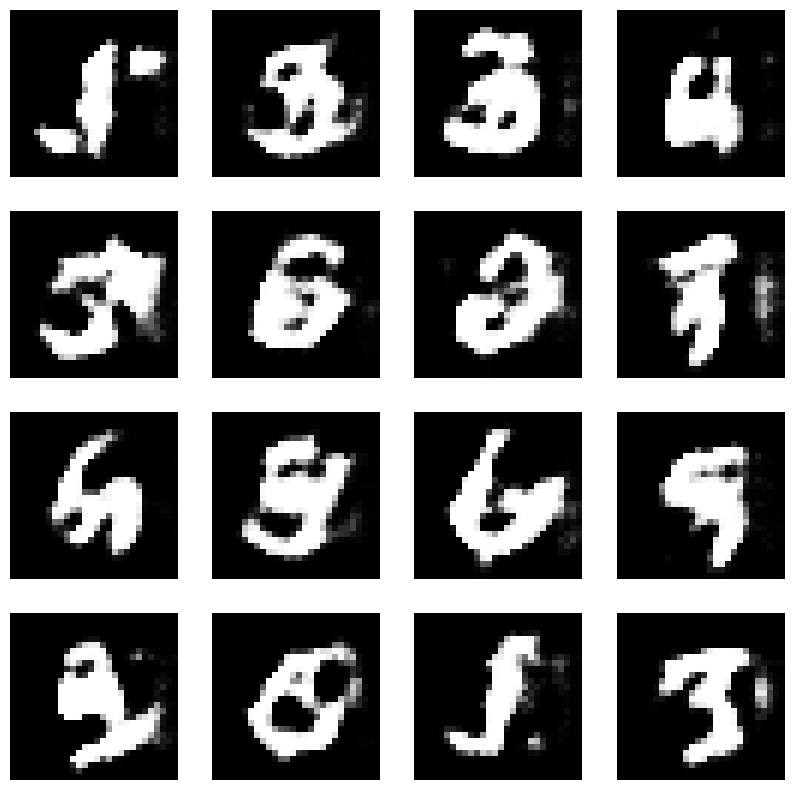

Epoch:  41


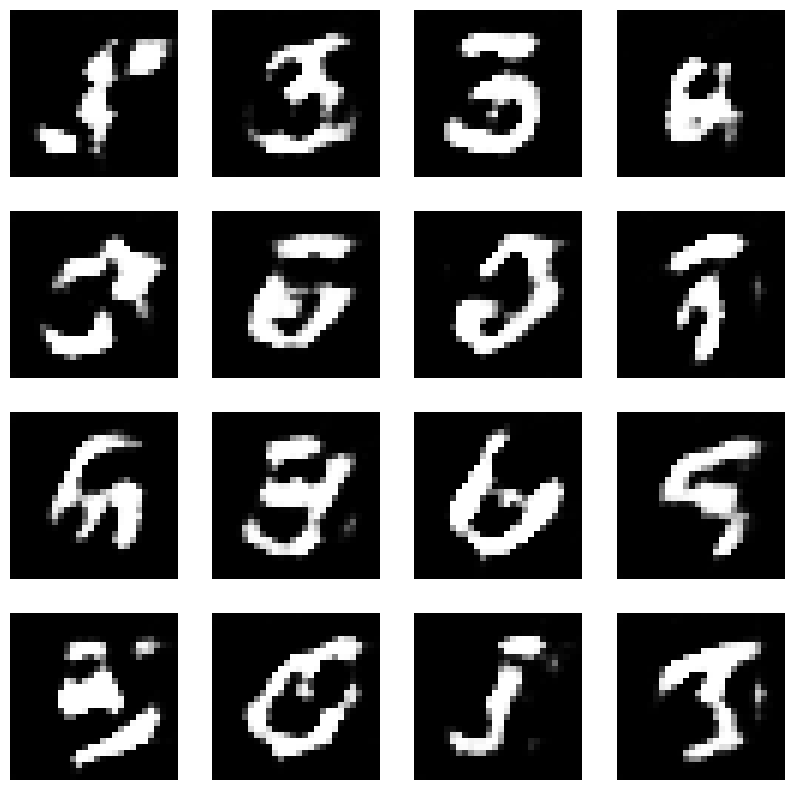

Epoch:  42


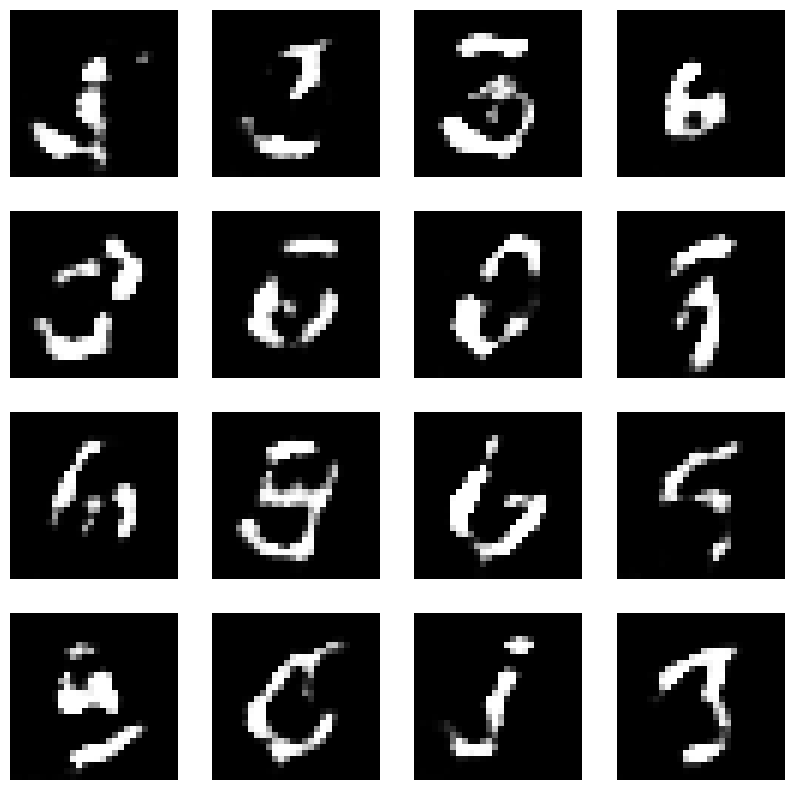

Epoch:  43


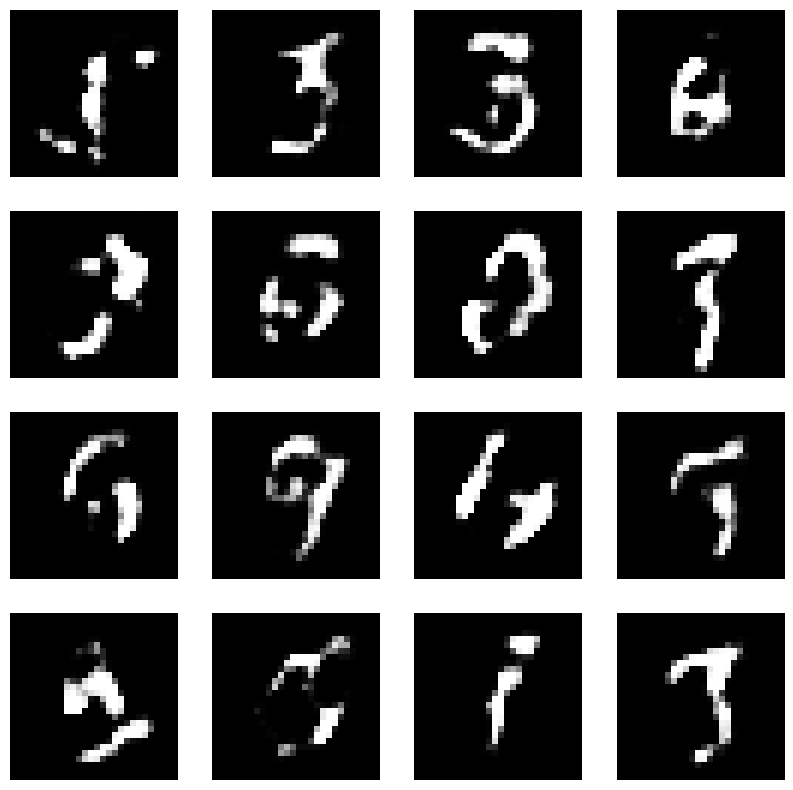

Epoch:  44


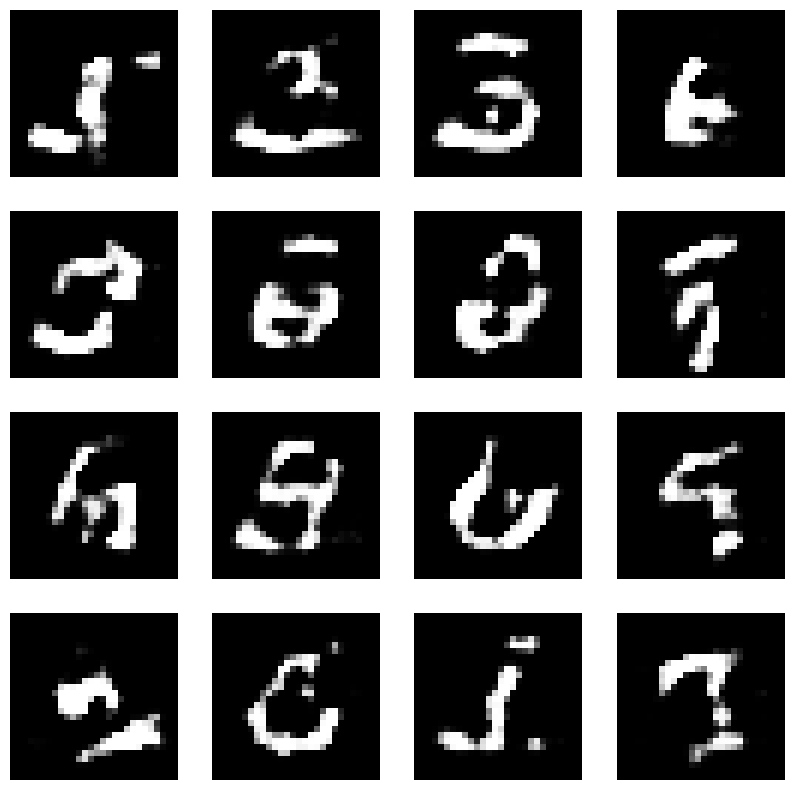

Epoch:  45


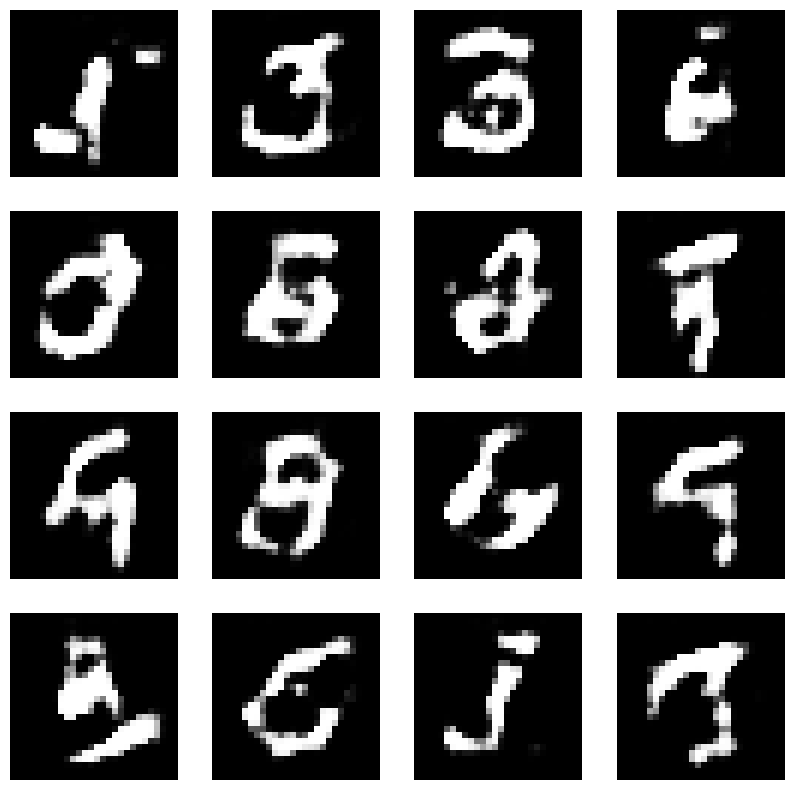

Epoch:  46


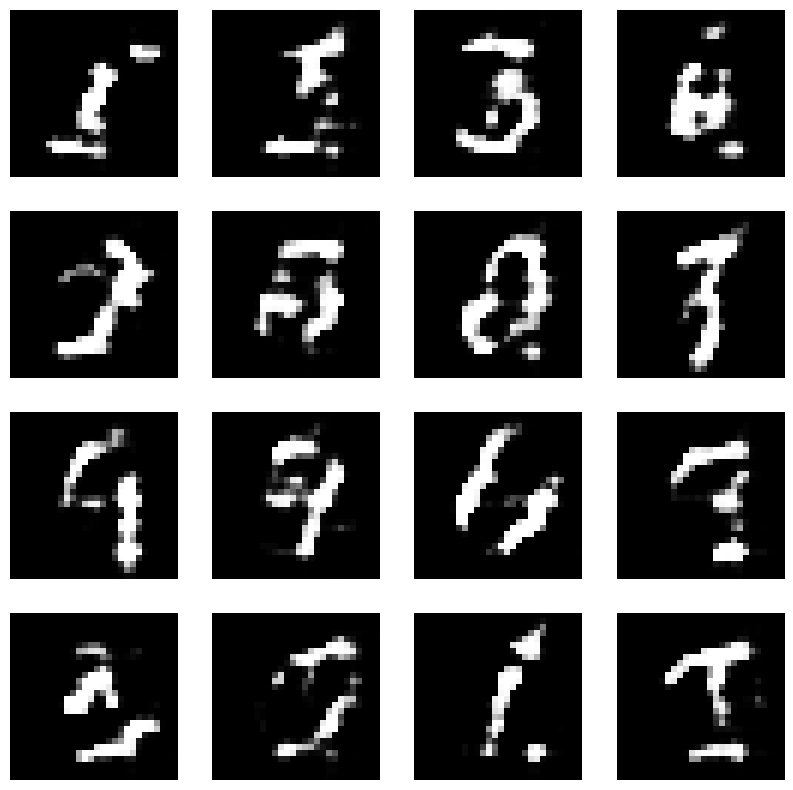

Epoch:  47


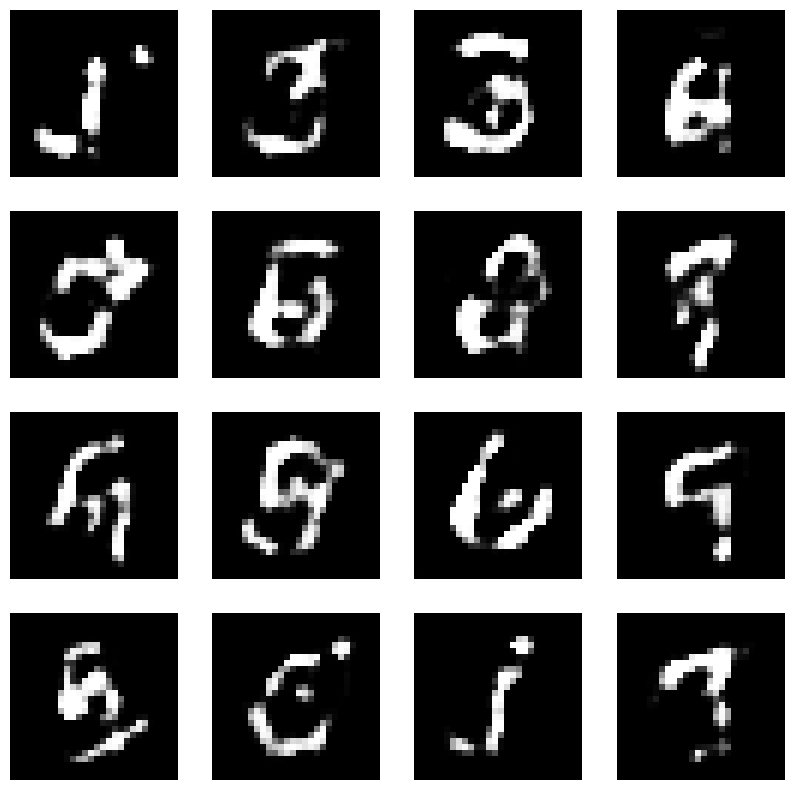

Epoch:  48


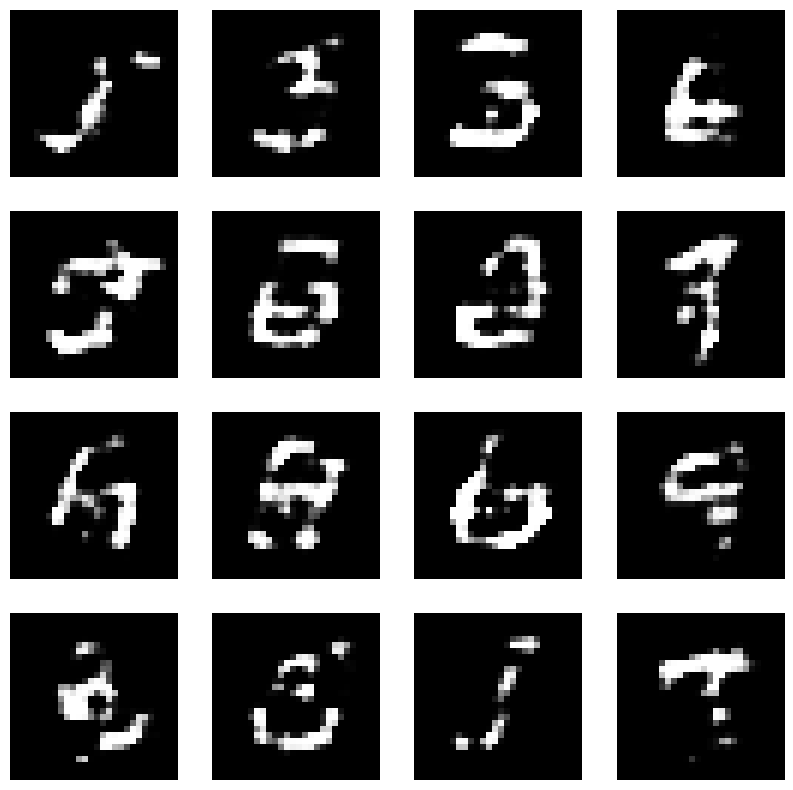

Epoch:  49


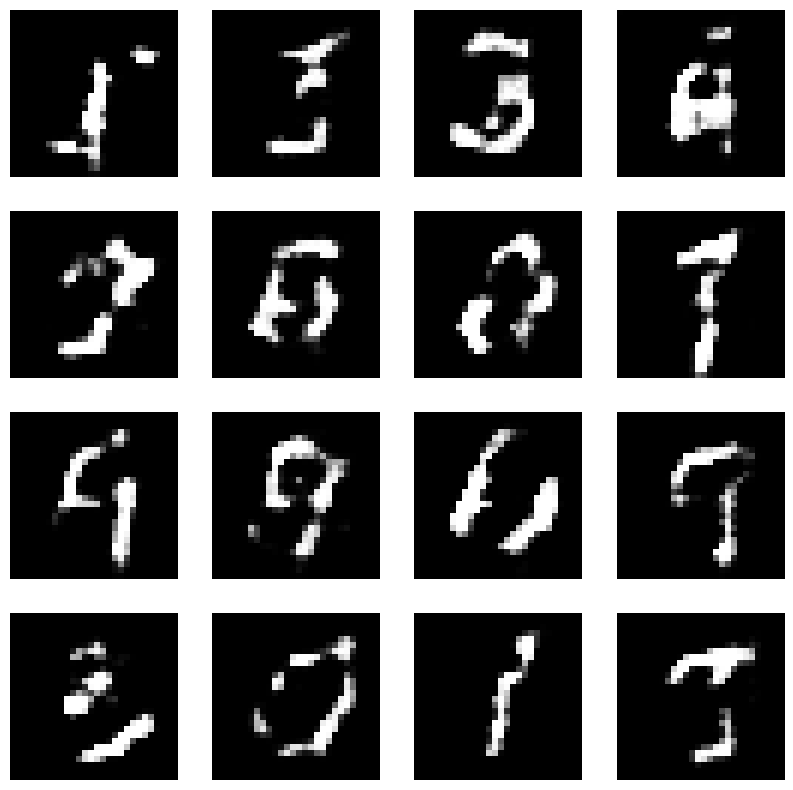

Epoch:  50


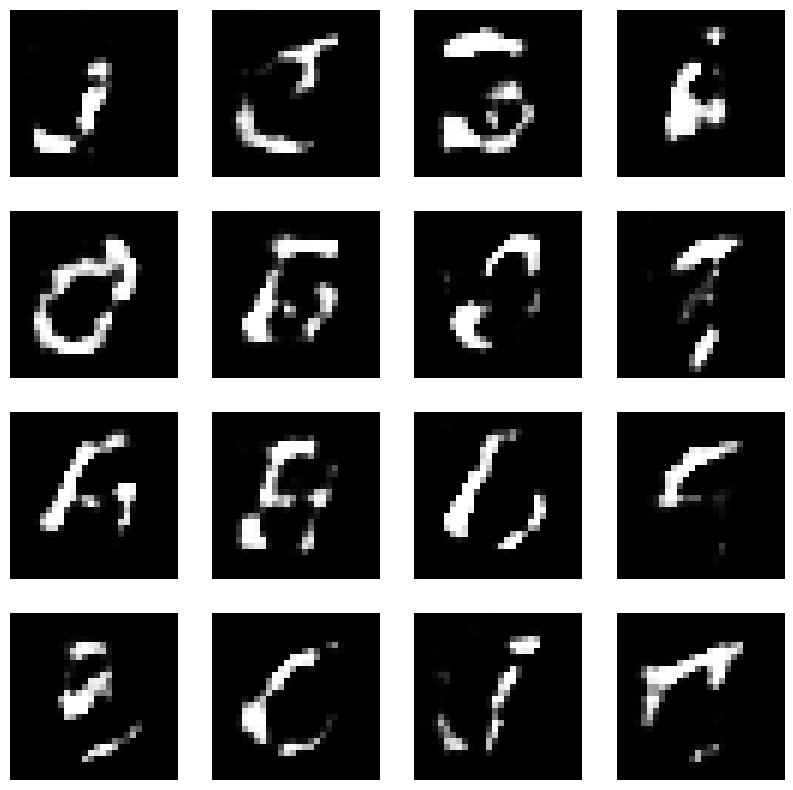

Epoch:  51


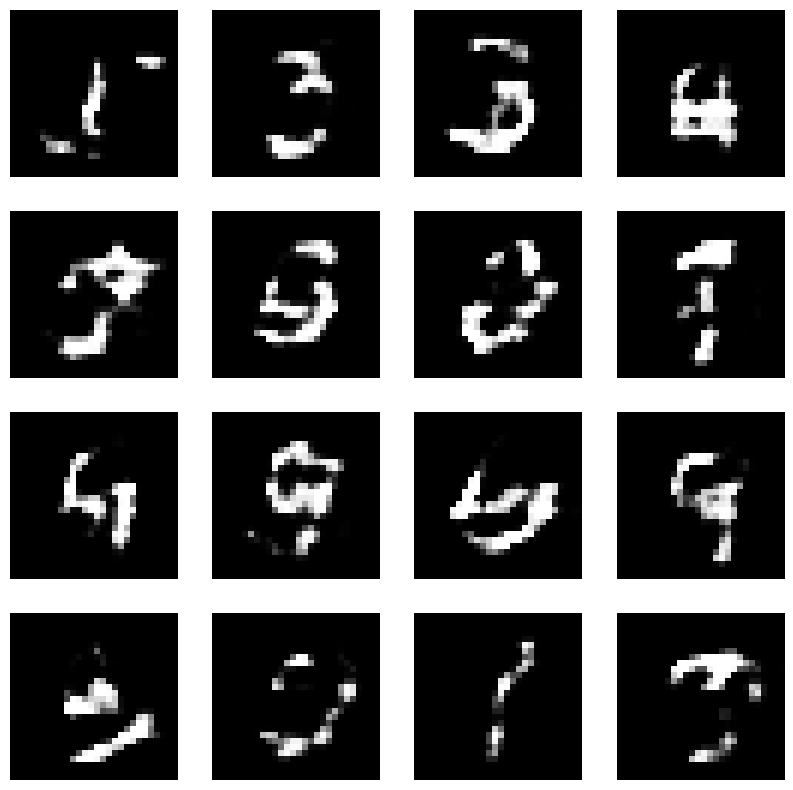

Epoch:  52


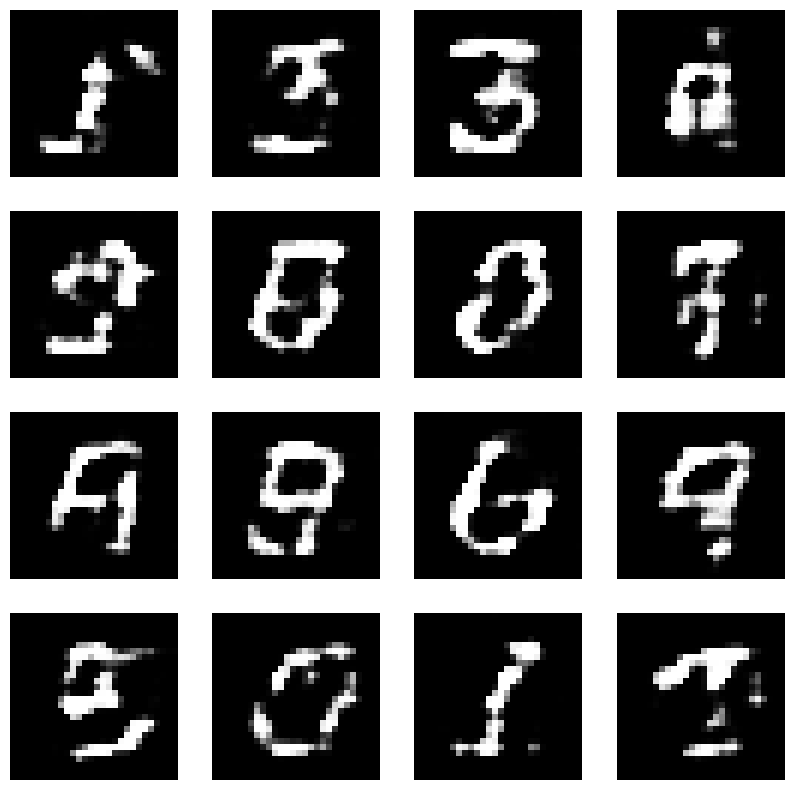

Epoch:  53


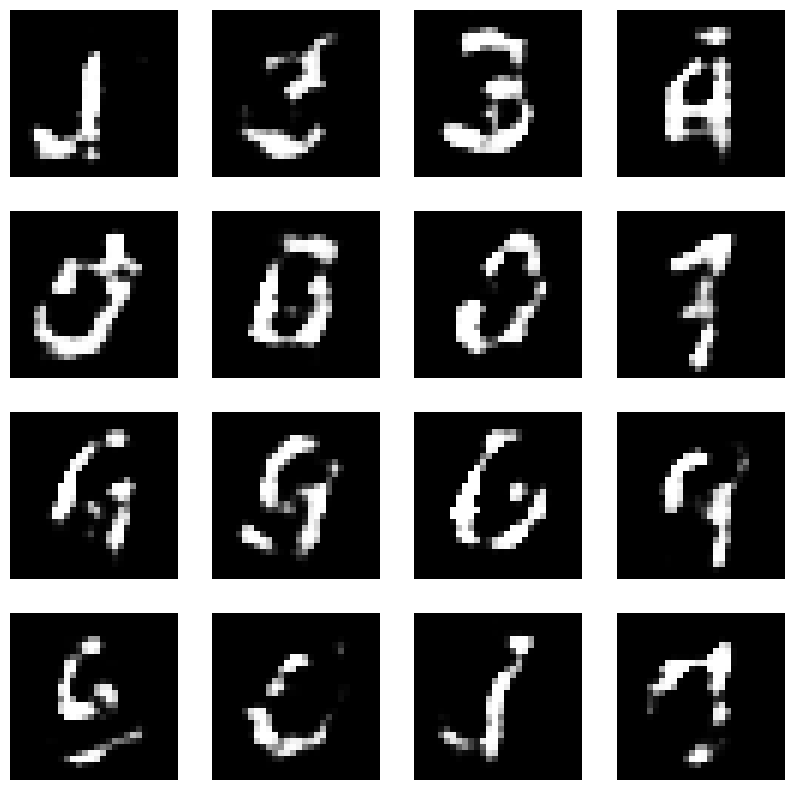

Epoch:  54


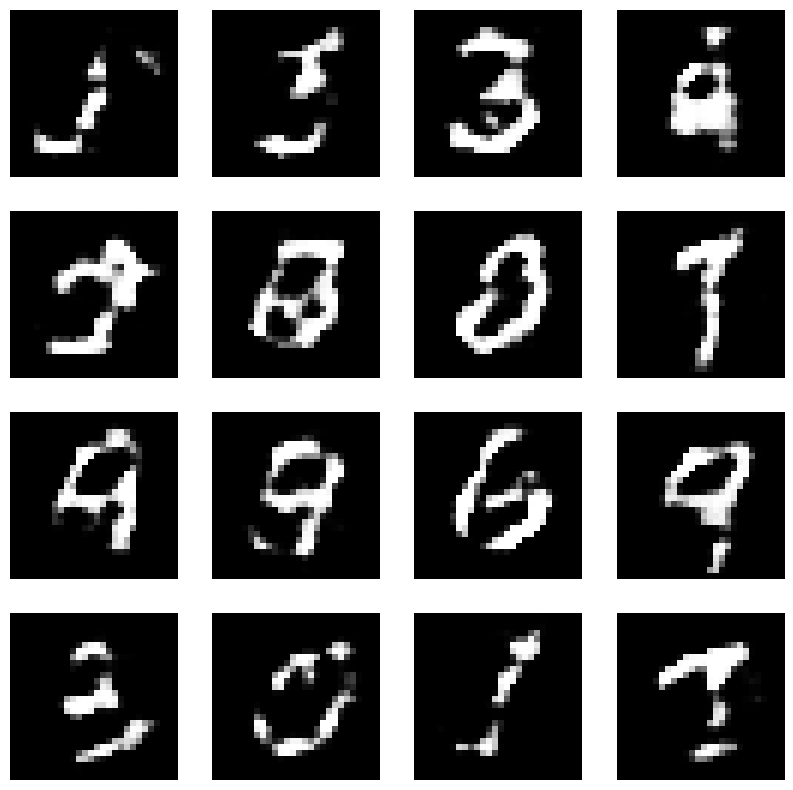

Epoch:  55


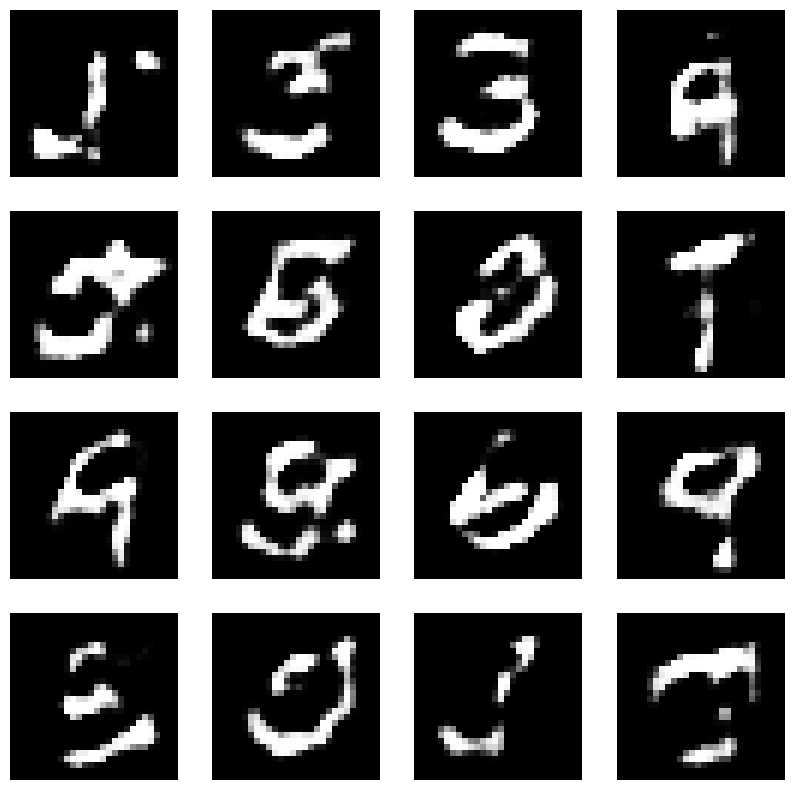

Epoch:  56


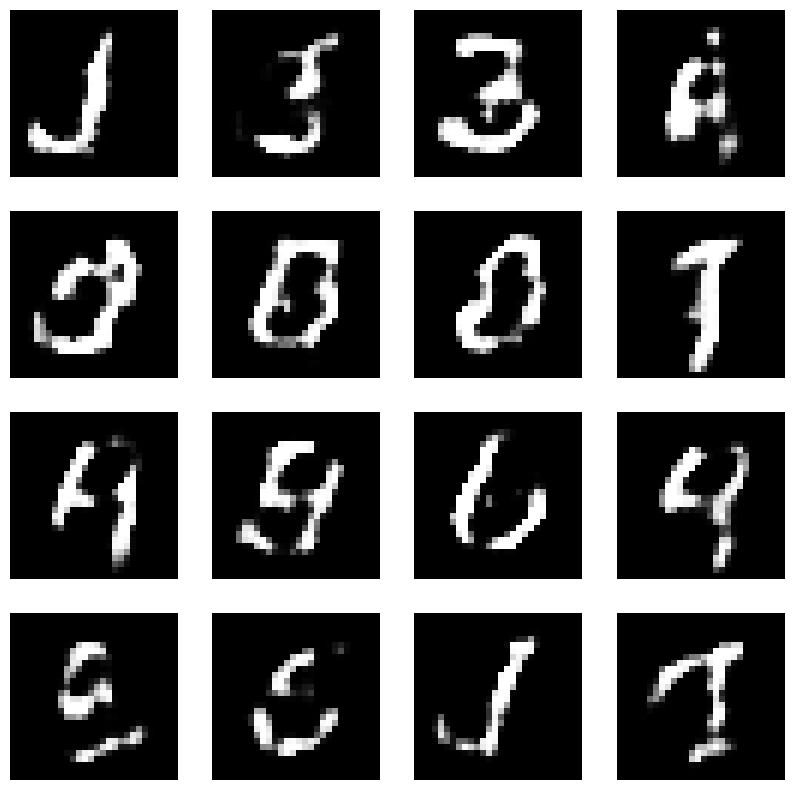

Epoch:  57


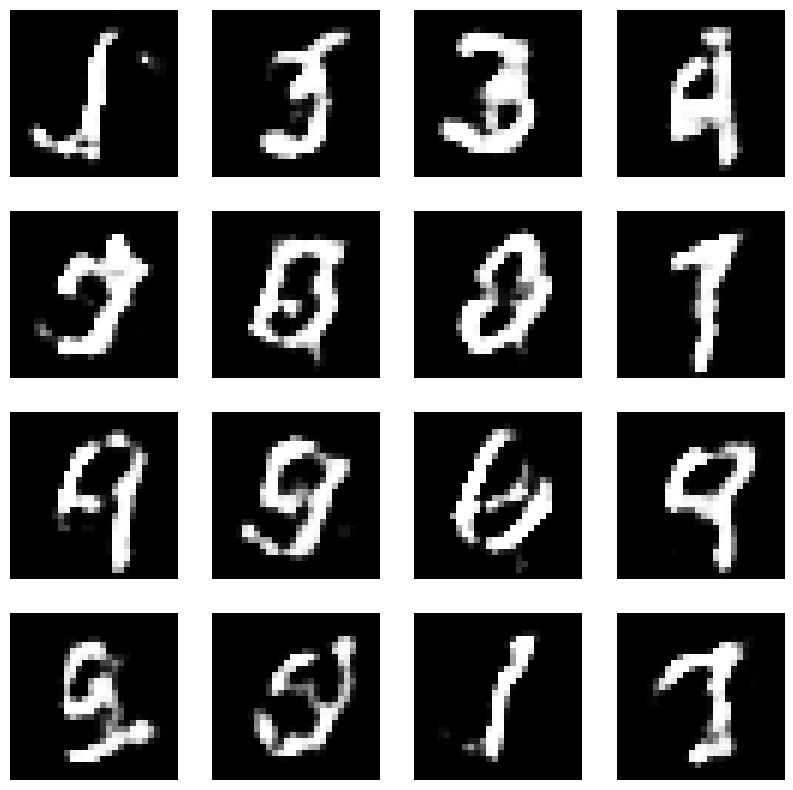

Epoch:  58


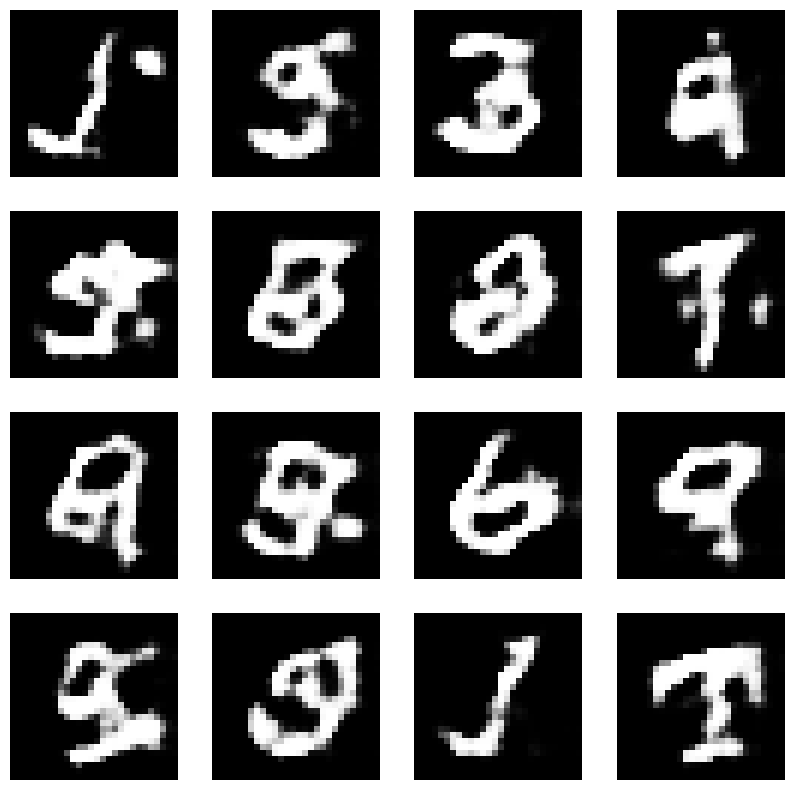

Epoch:  59


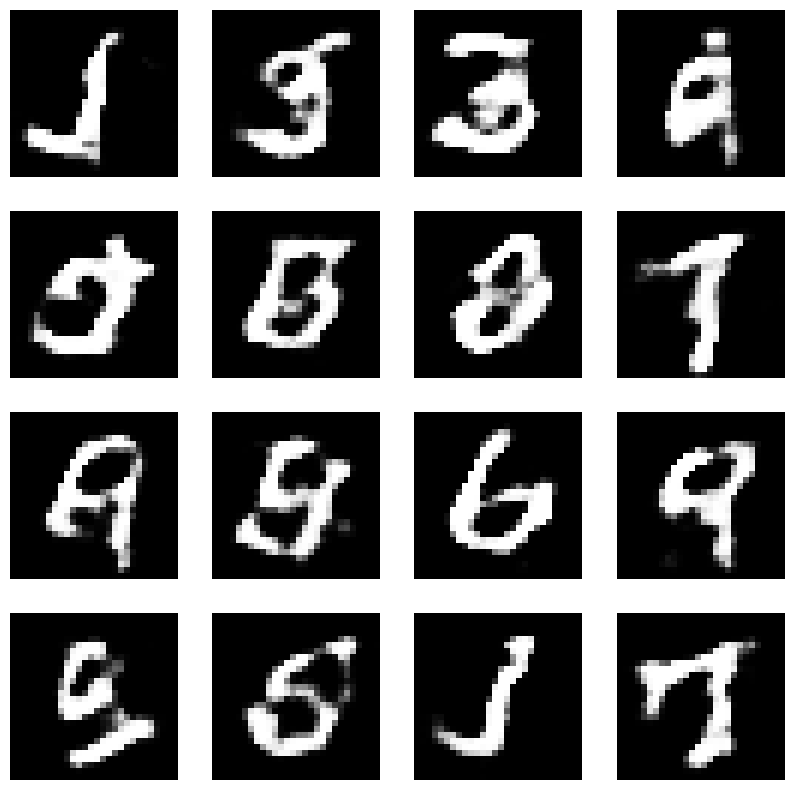

Epoch:  60


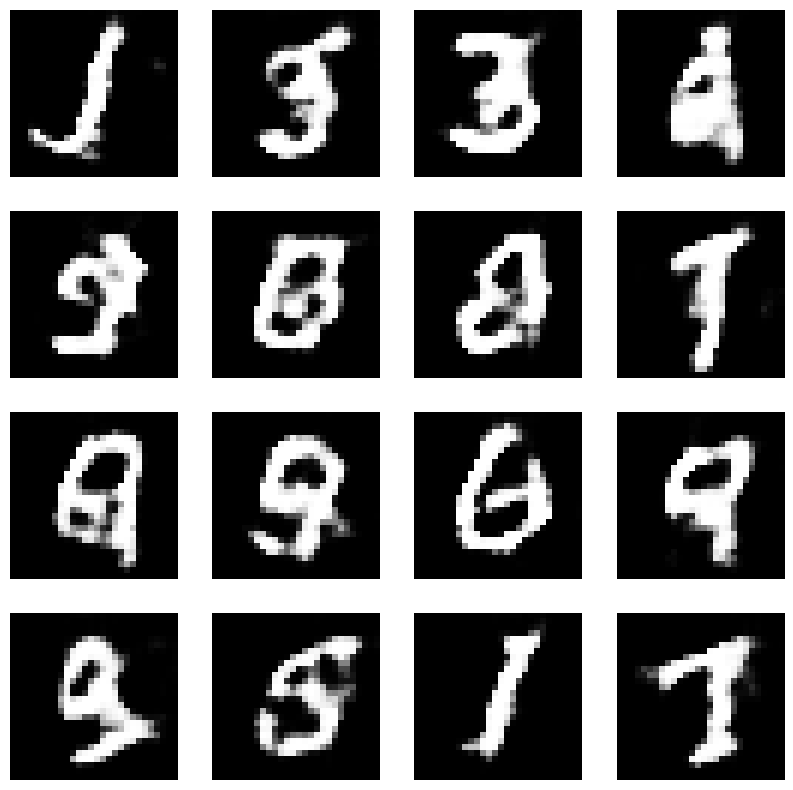

Epoch:  61


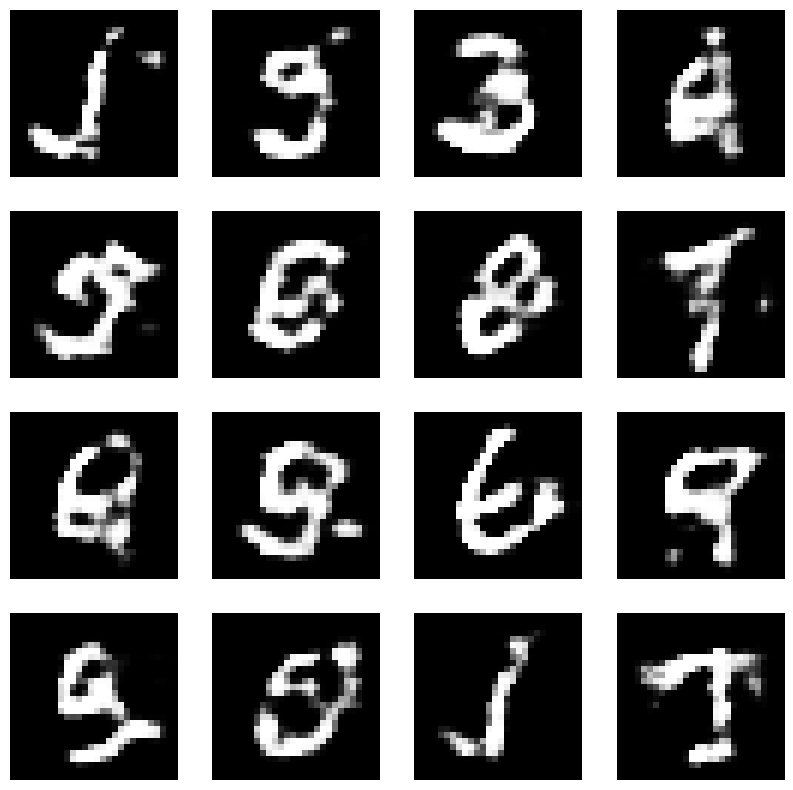

Epoch:  62


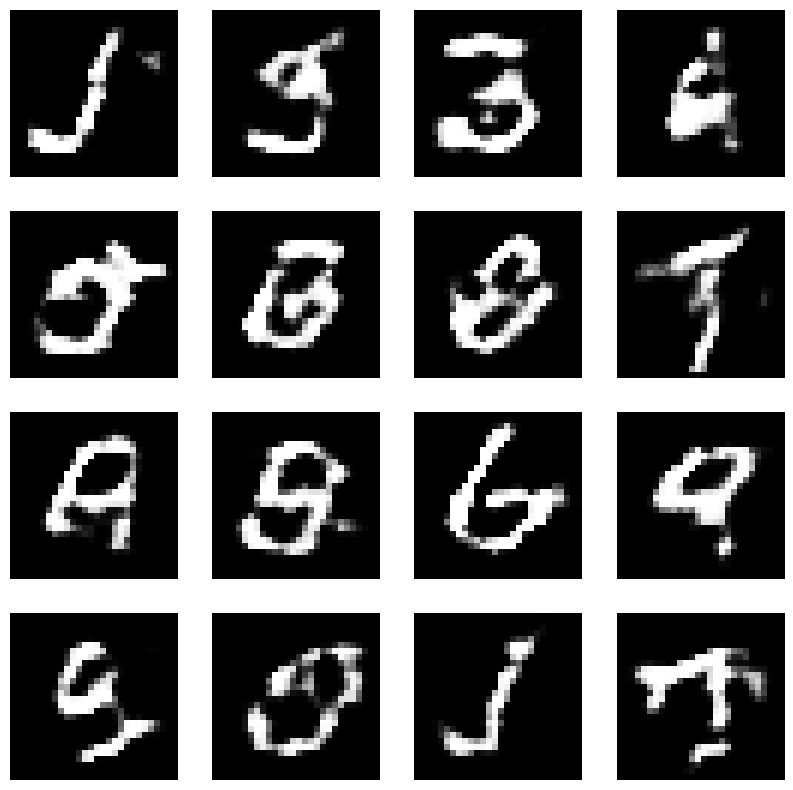

Epoch:  63


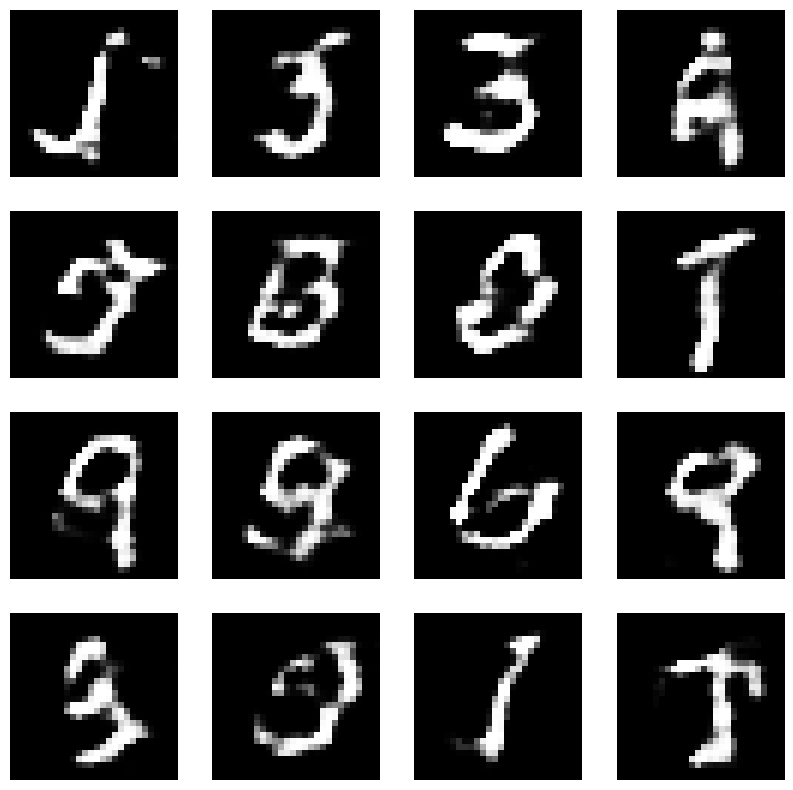

Epoch:  64


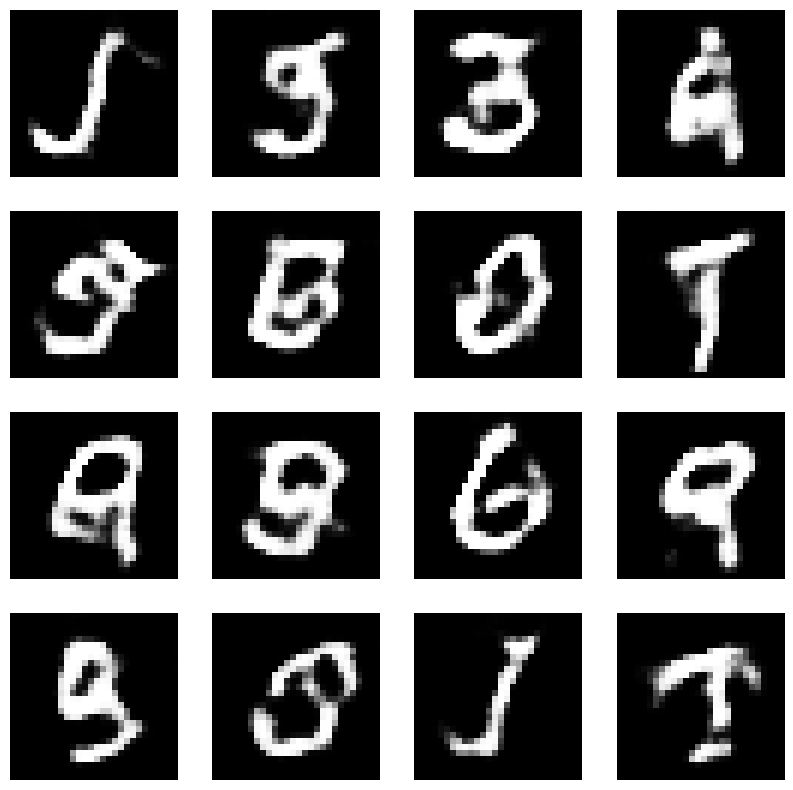

Epoch:  65


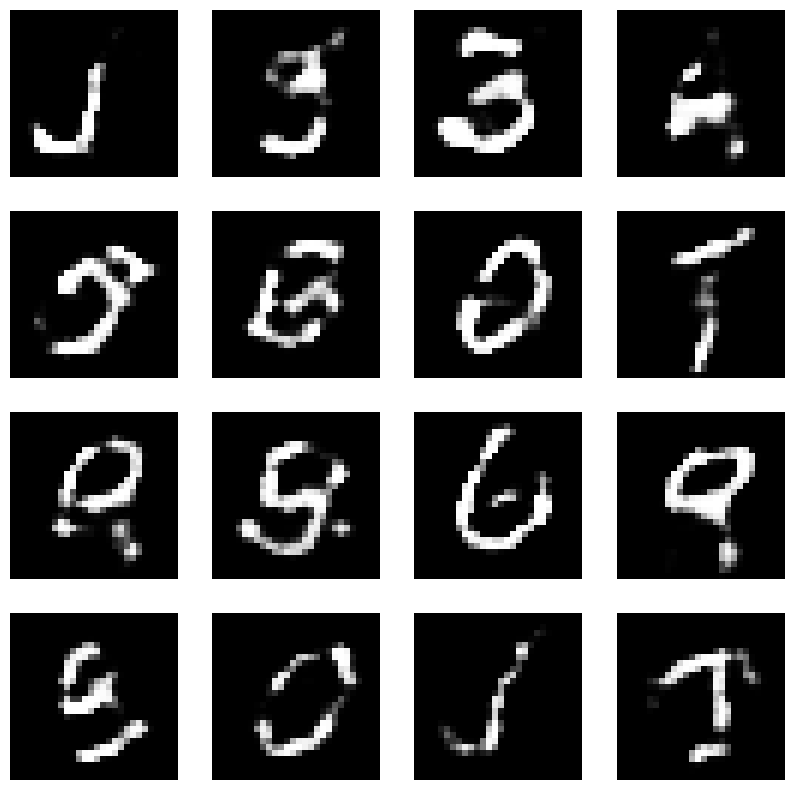

Epoch:  66


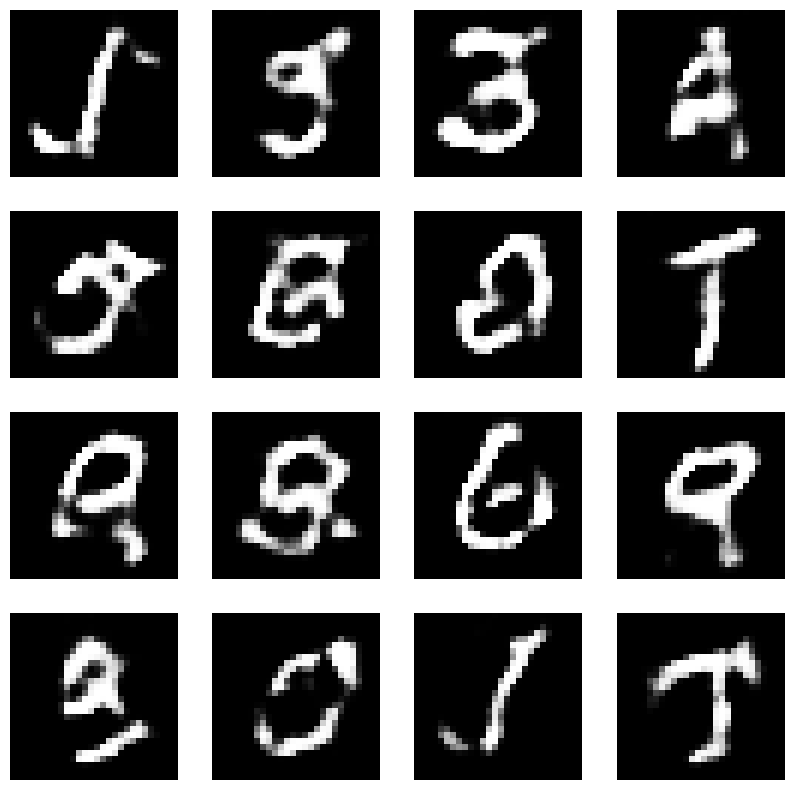

Epoch:  67


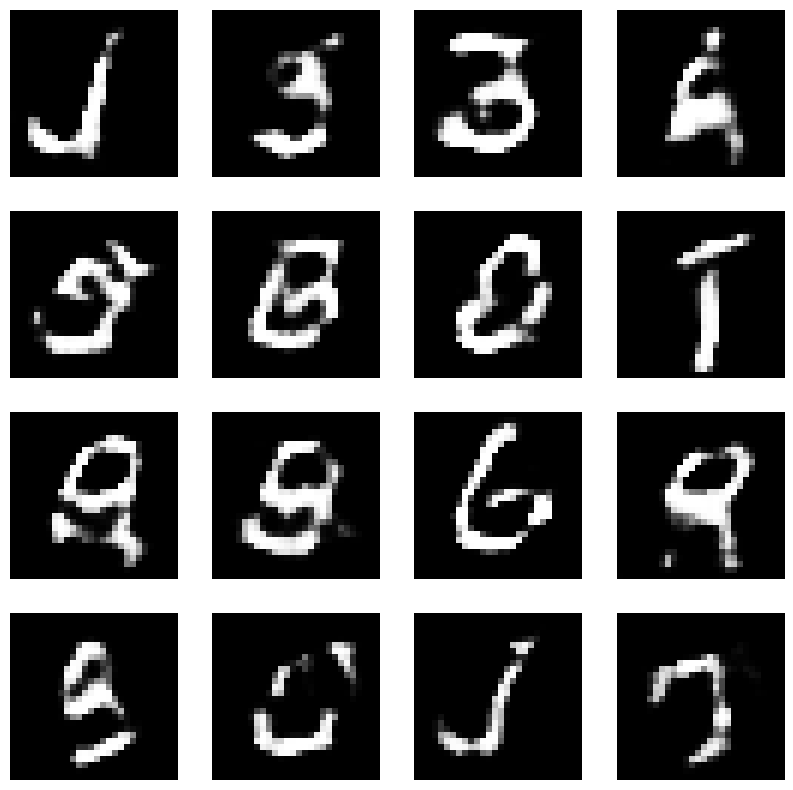

Epoch:  68


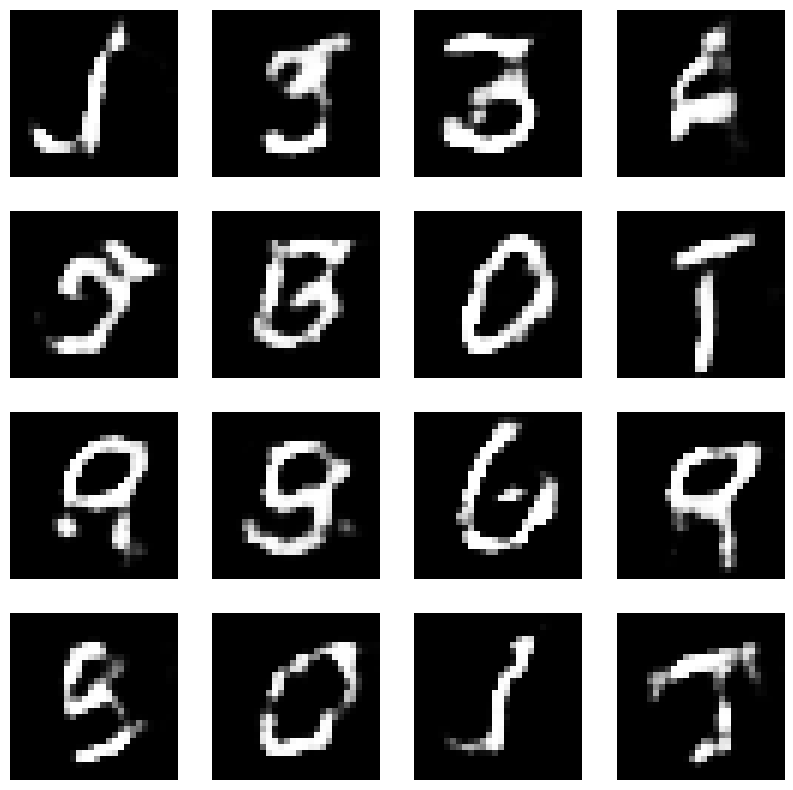

Epoch:  69


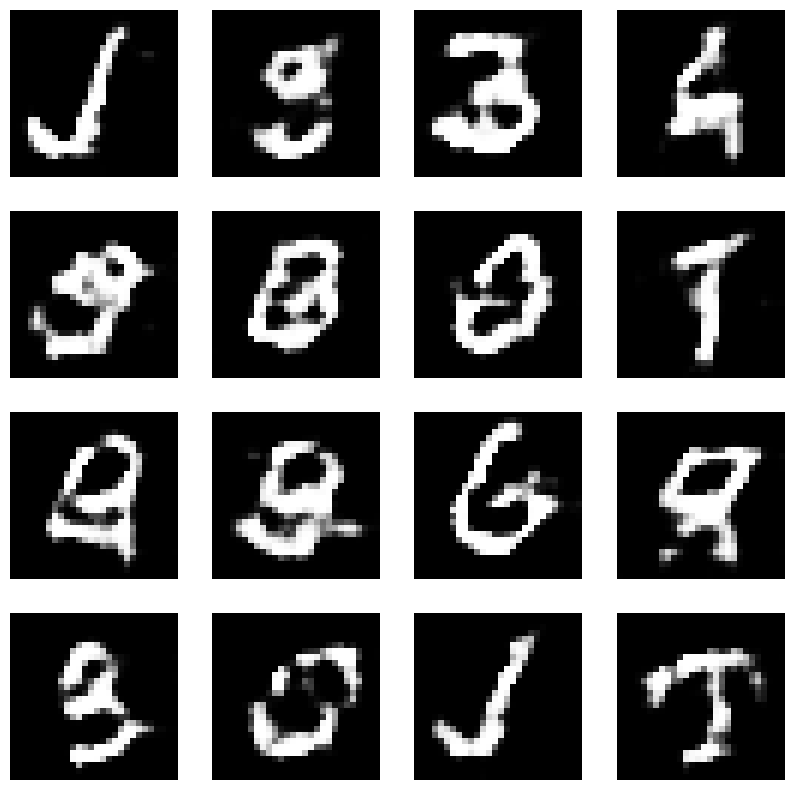

Epoch:  70


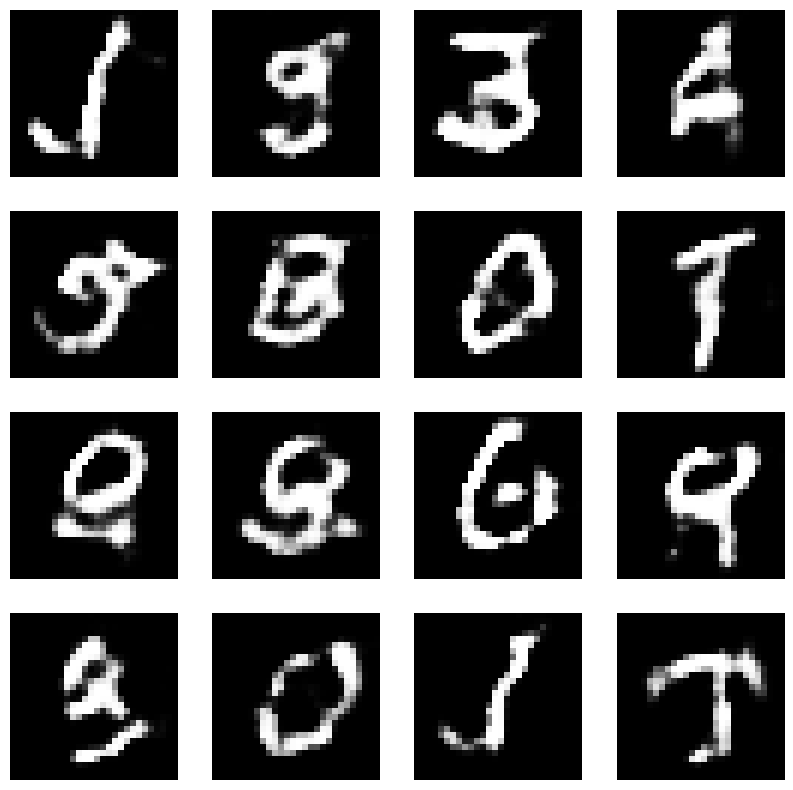

Epoch:  71


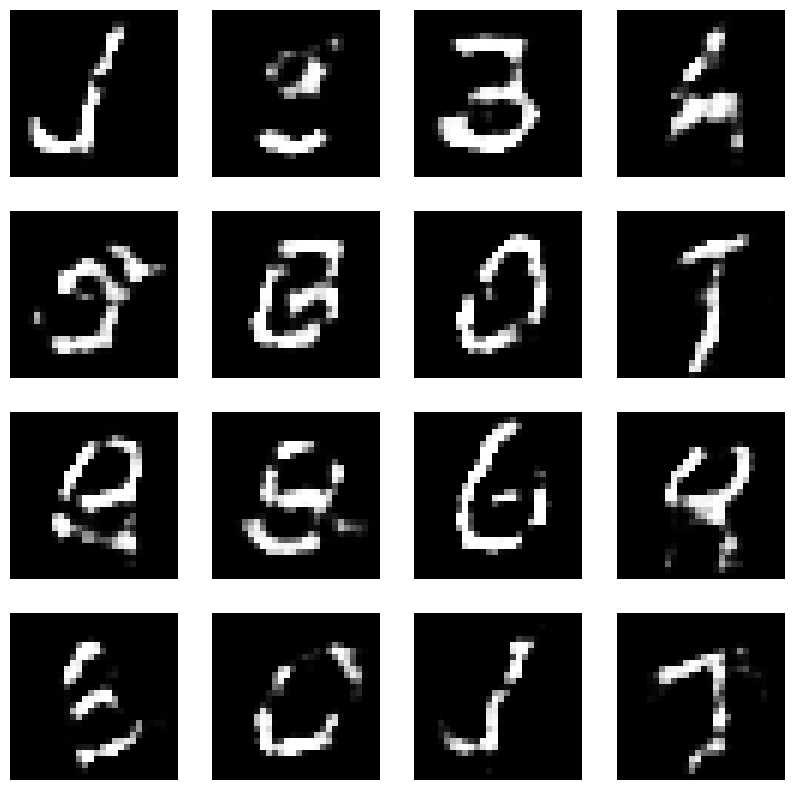

Epoch:  72


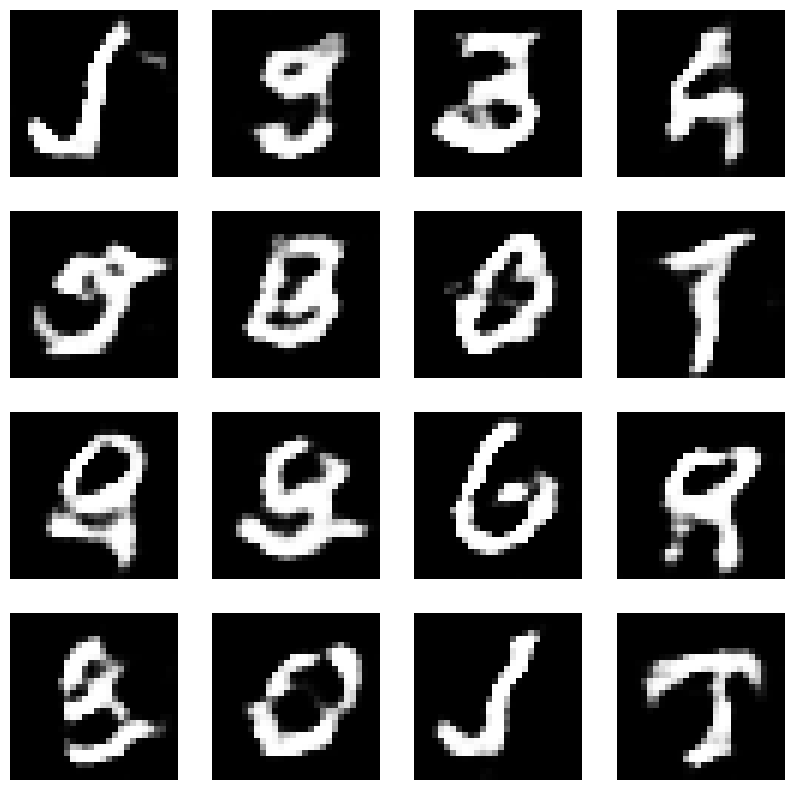

Epoch:  73


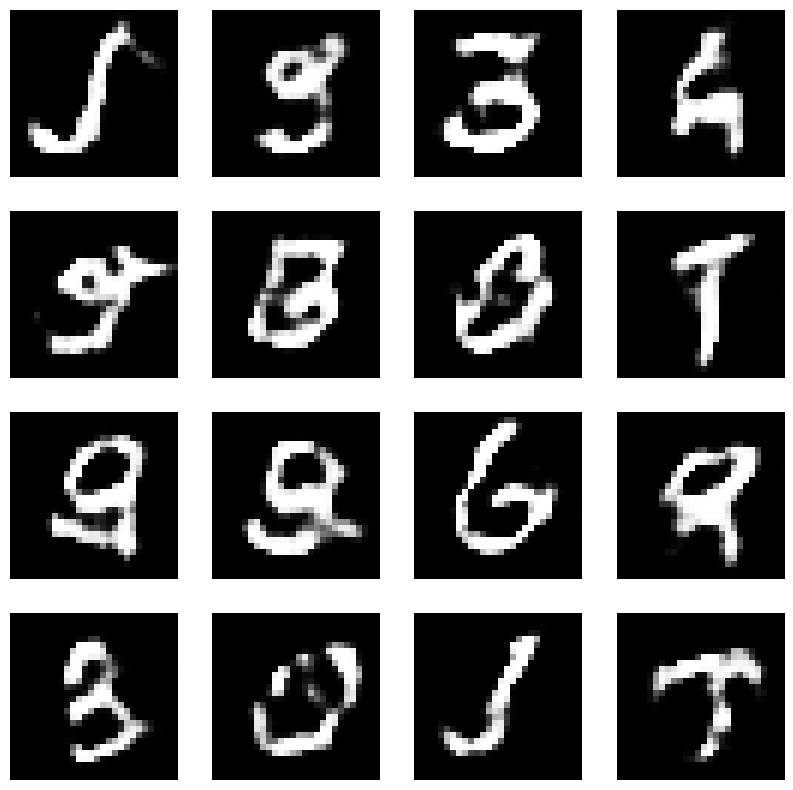

Epoch:  74


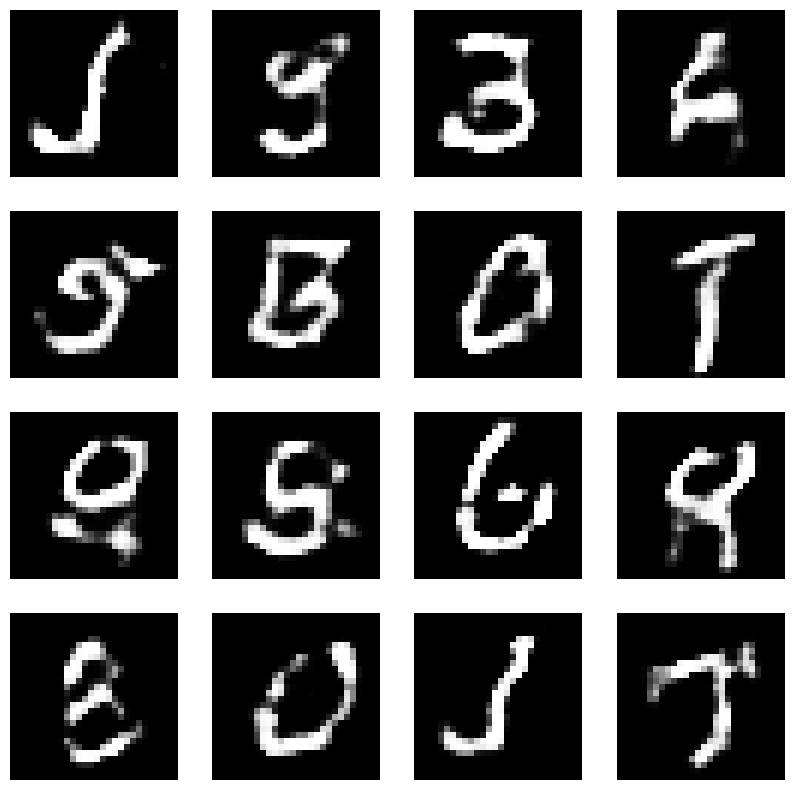

Epoch:  75


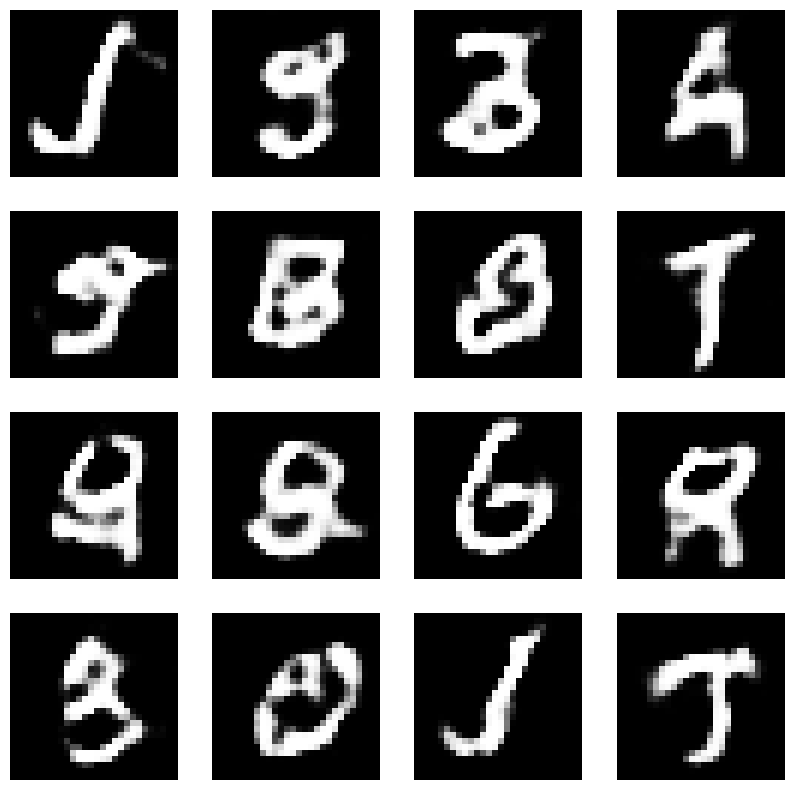

Epoch:  76


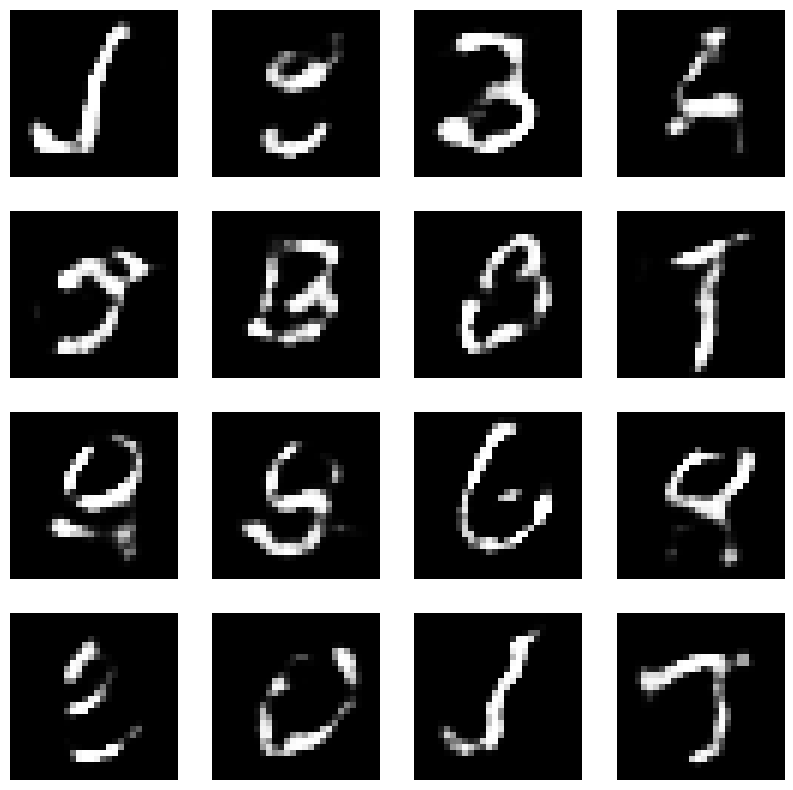

Epoch:  77


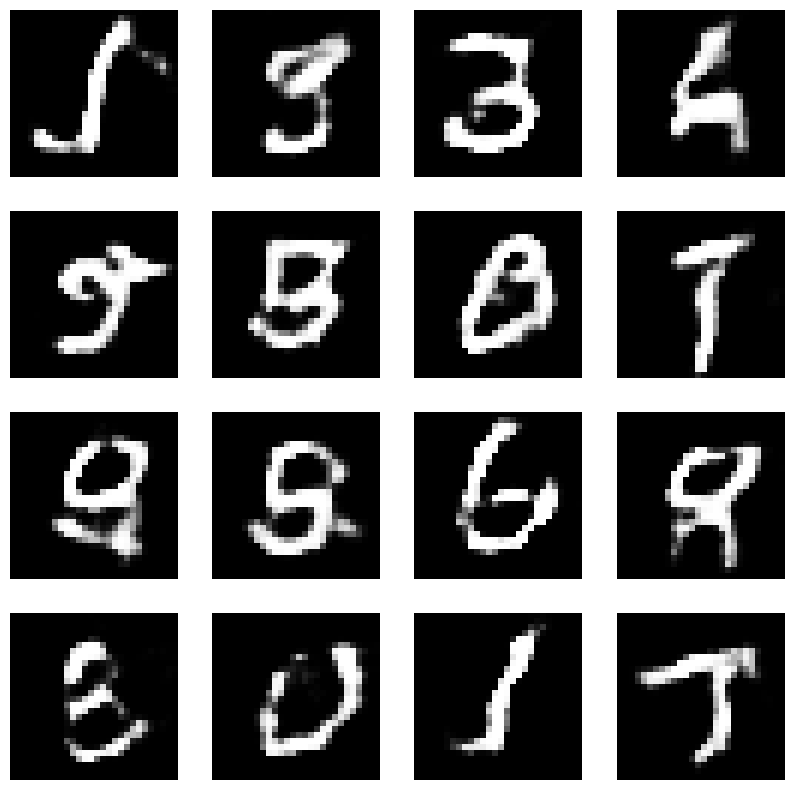

Epoch:  78


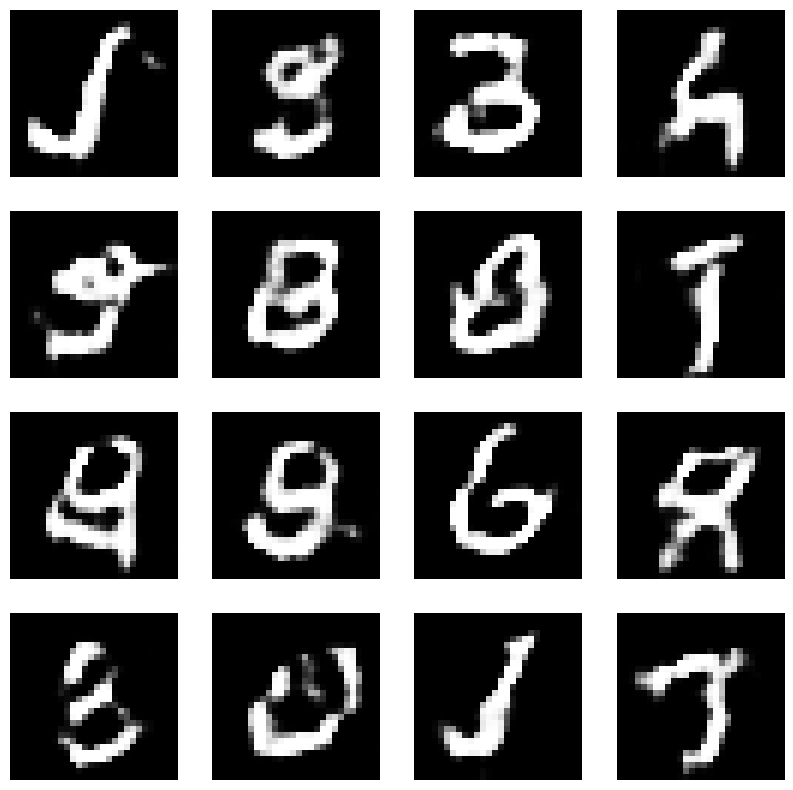

Epoch:  79


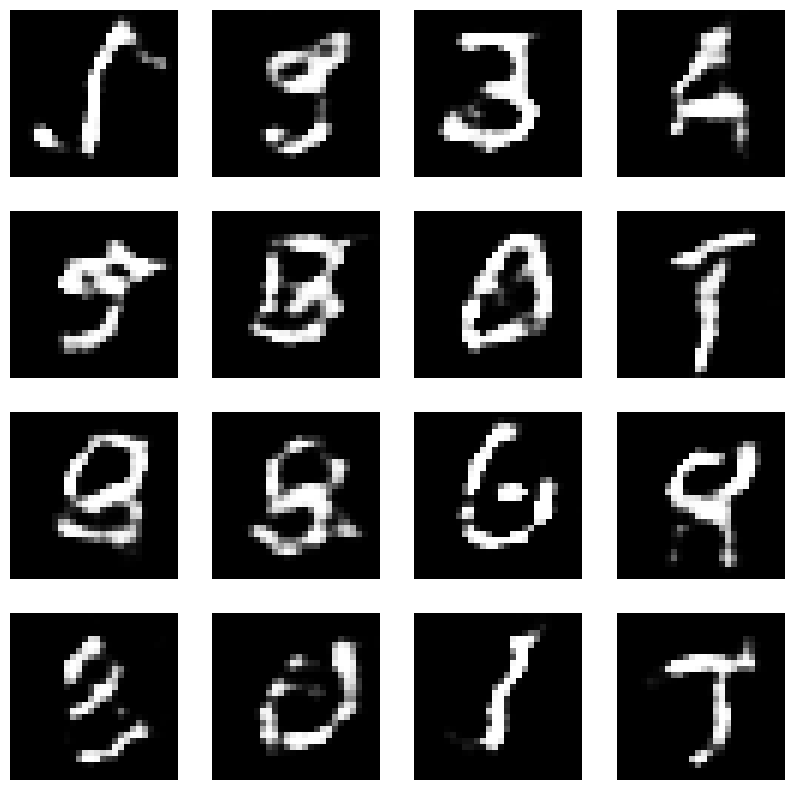

Epoch:  80


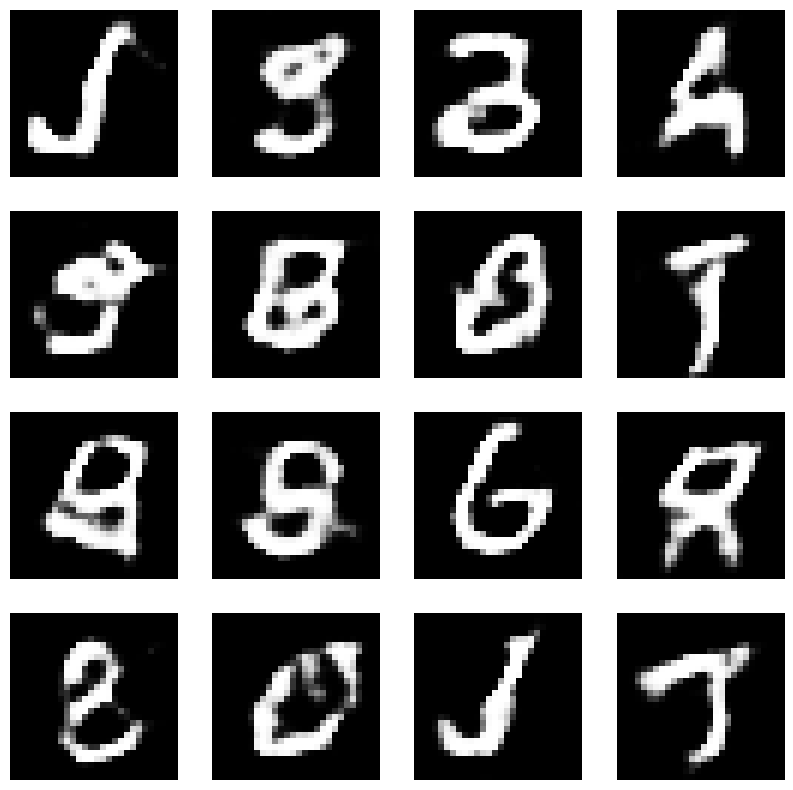

Epoch:  81


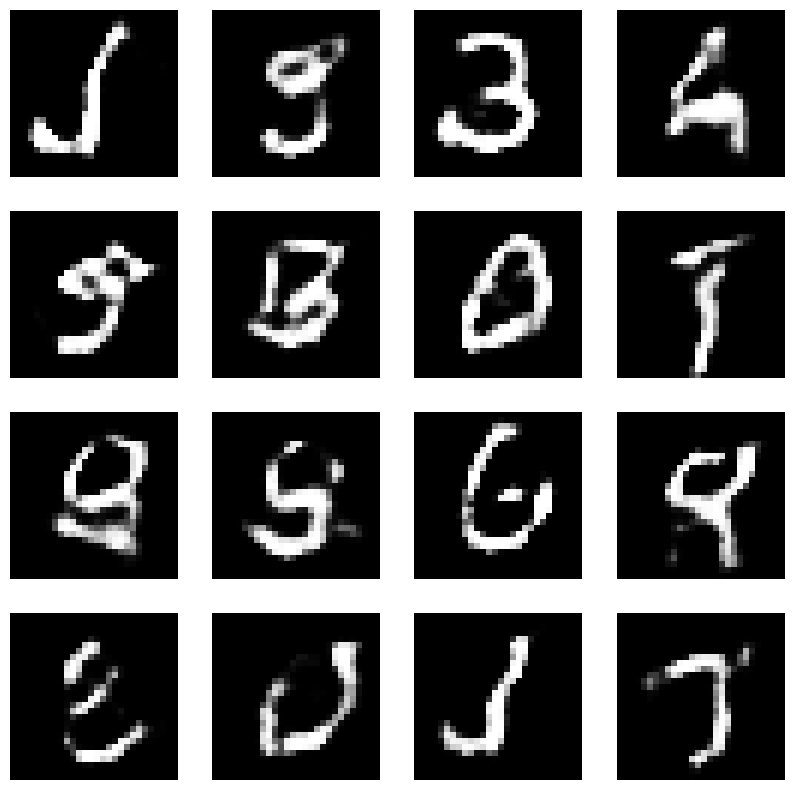

Epoch:  82


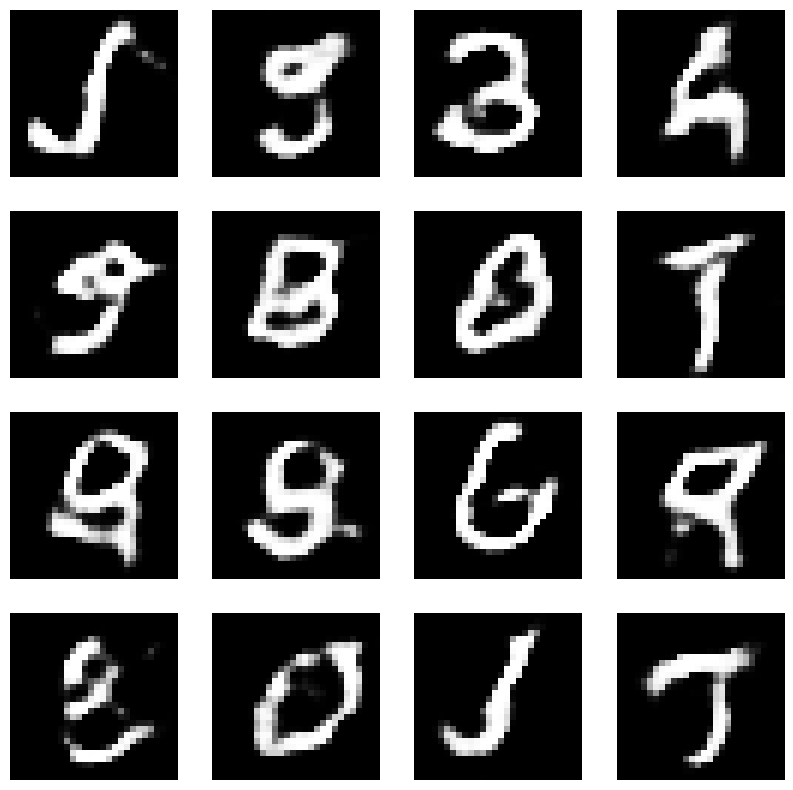

Epoch:  83


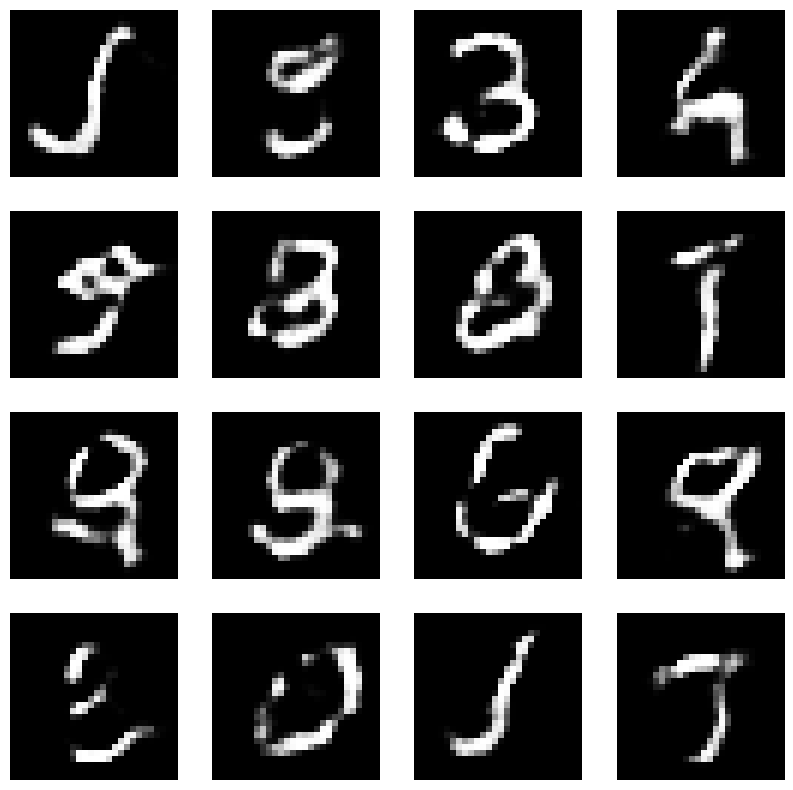

Epoch:  84


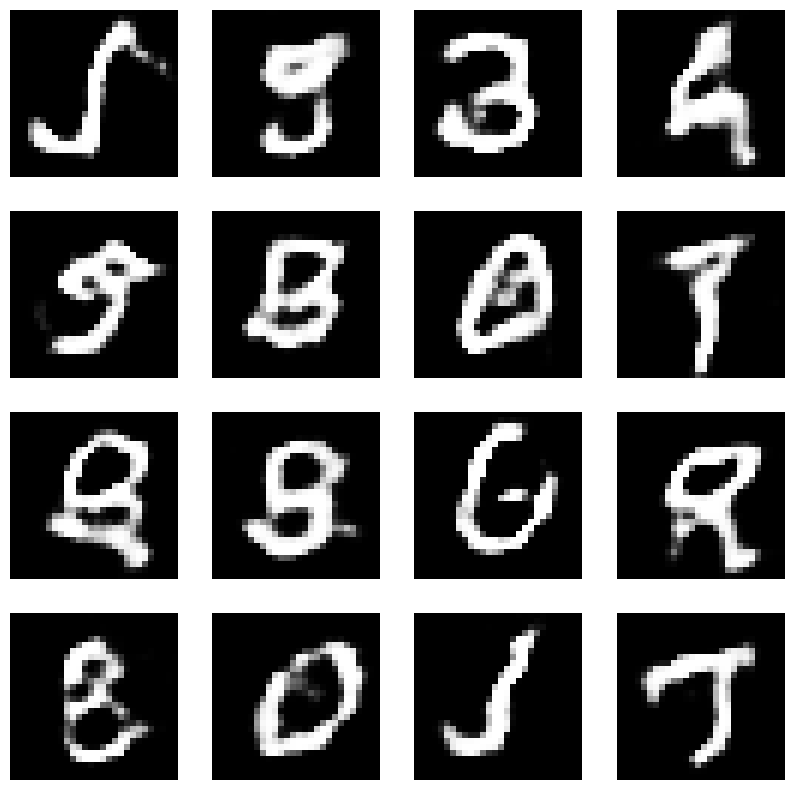

Epoch:  85


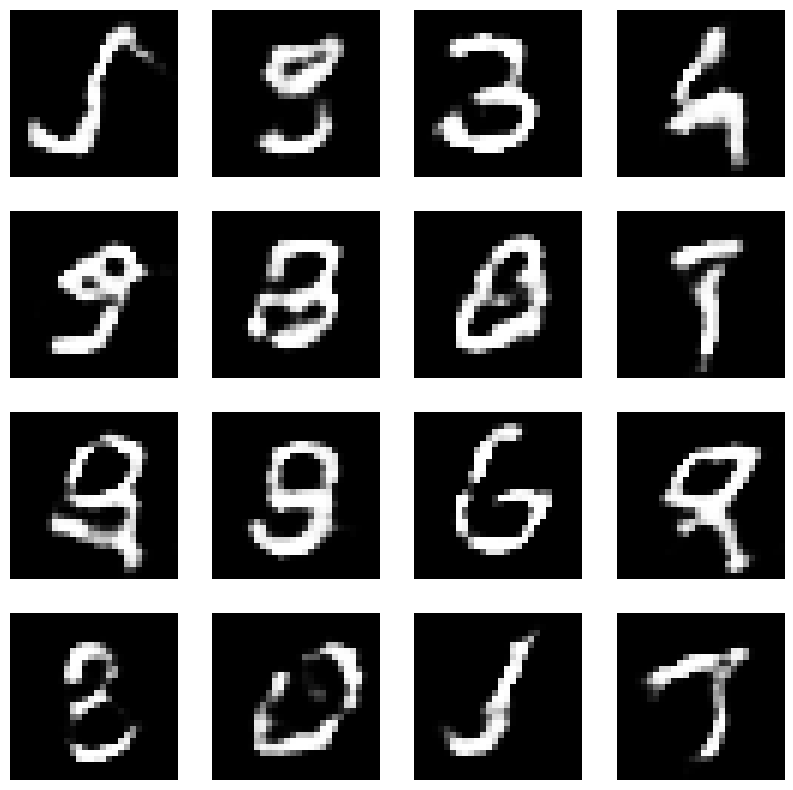

Epoch:  86


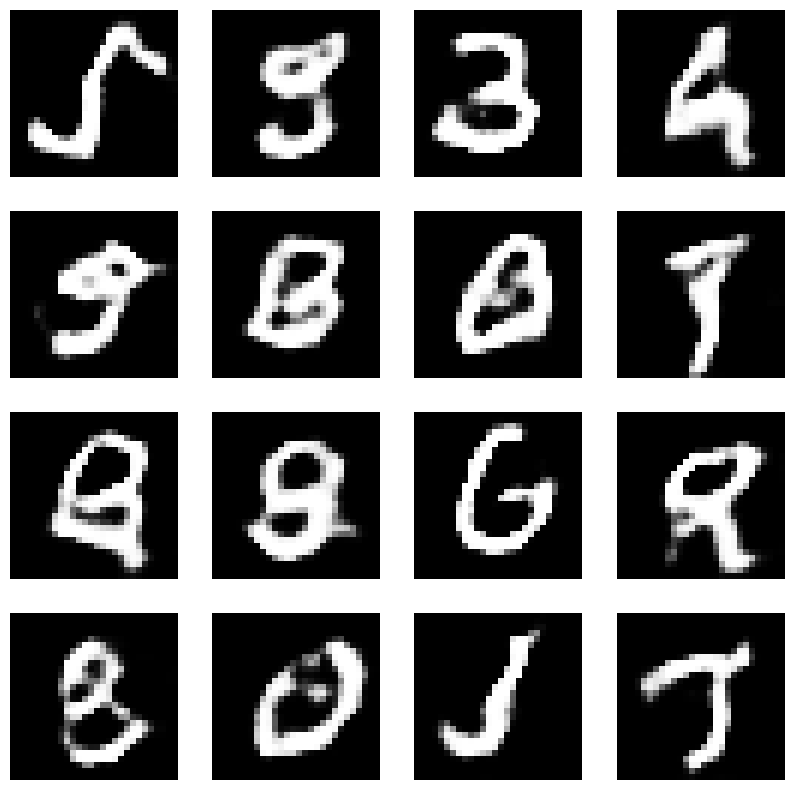

Epoch:  87


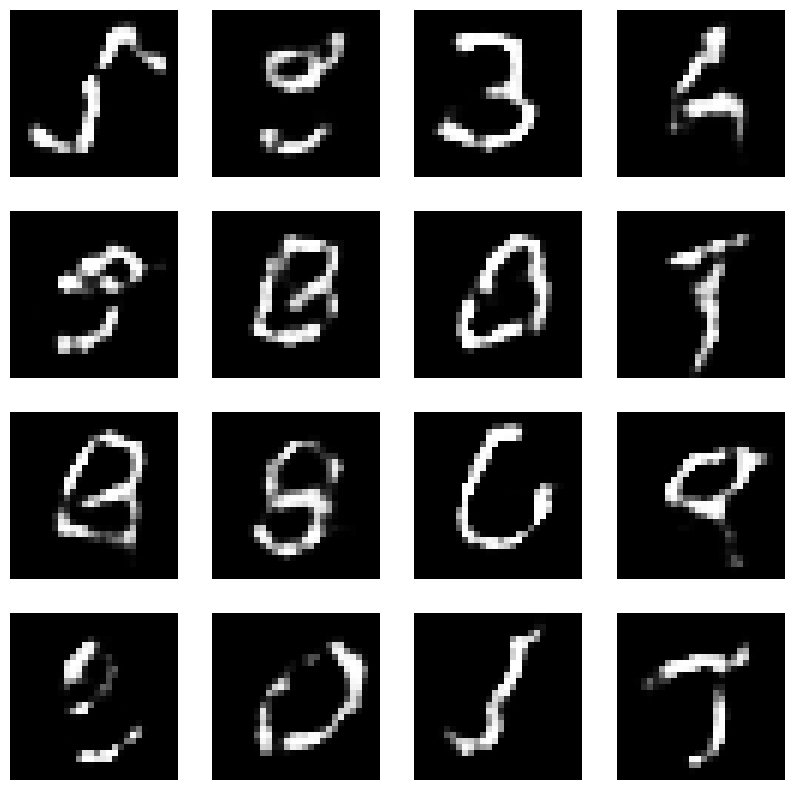

Epoch:  88


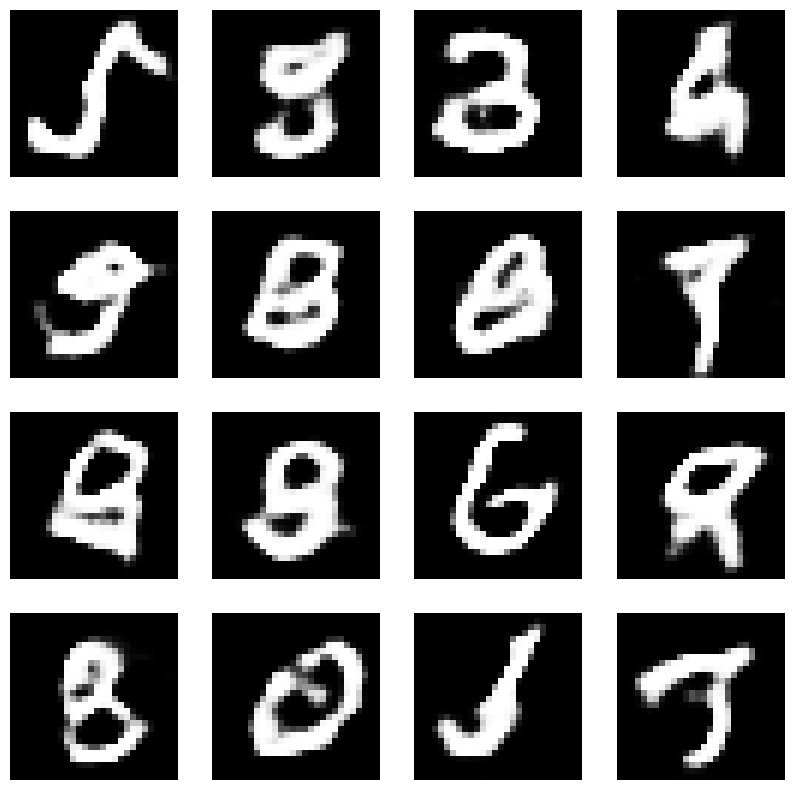

Epoch:  89


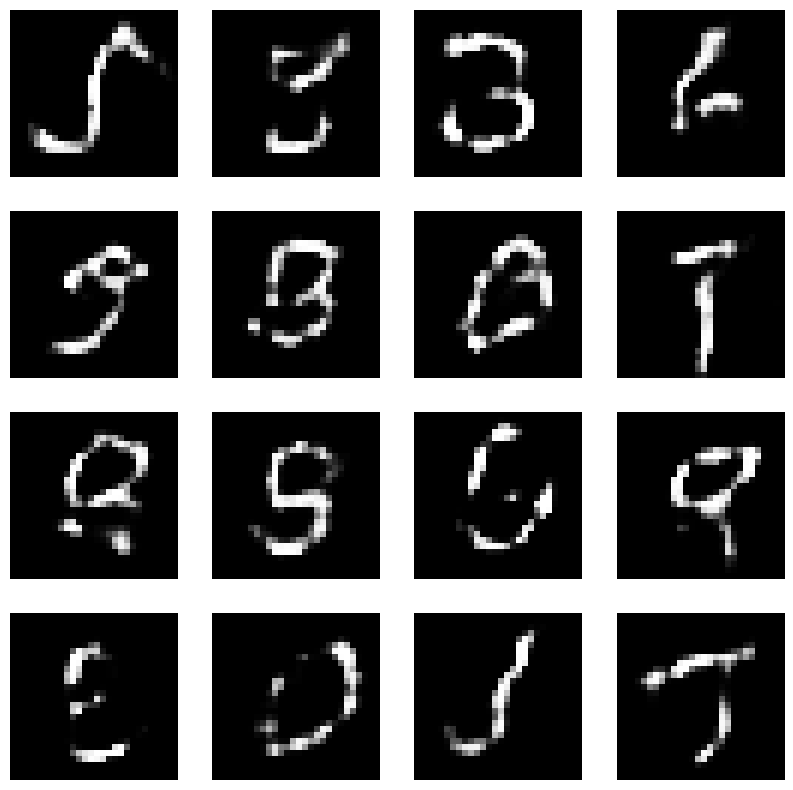

Epoch:  90


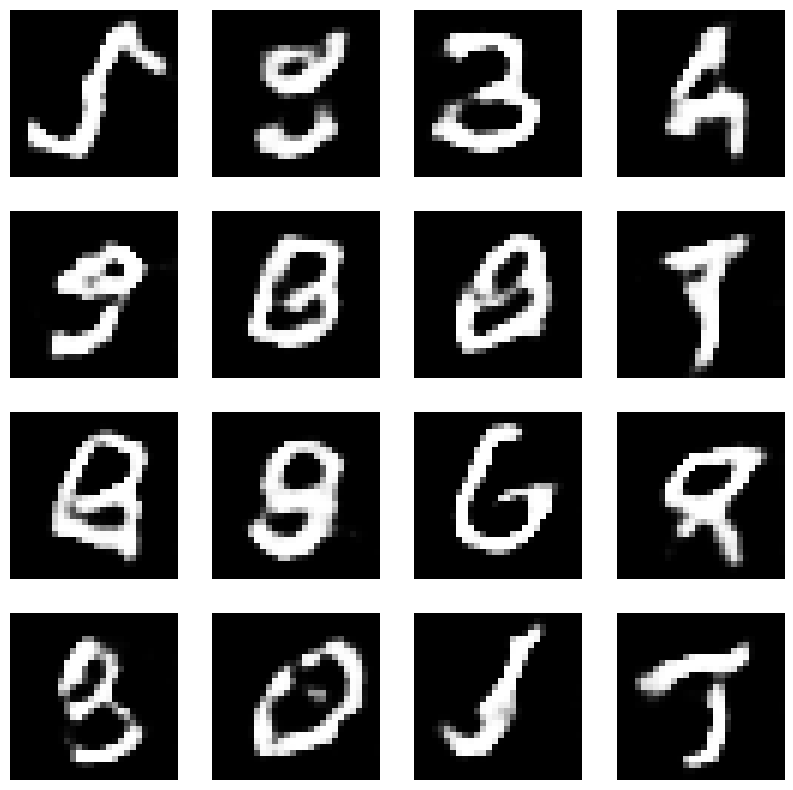

Epoch:  91


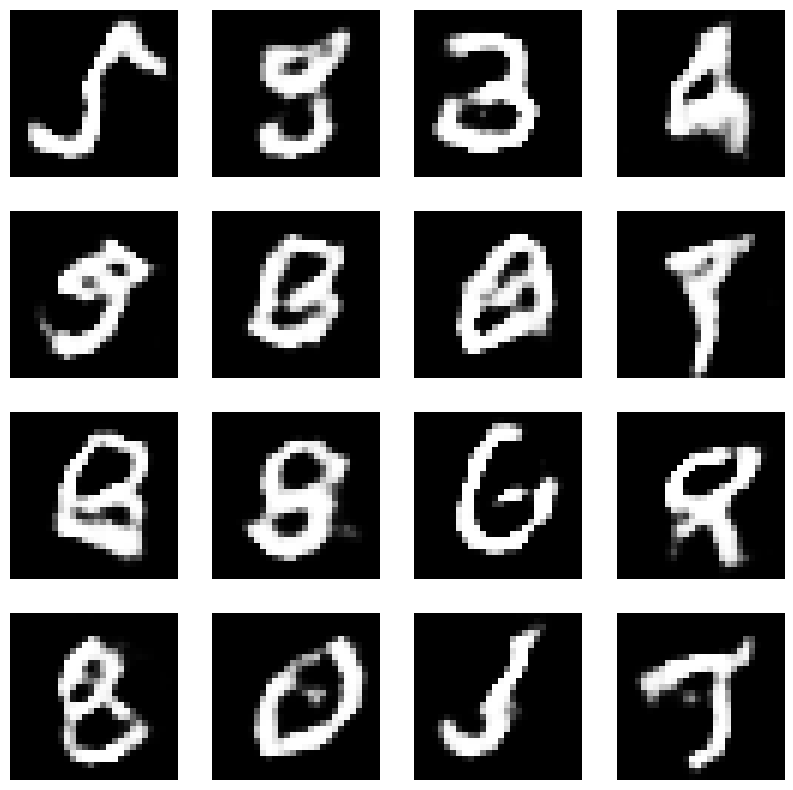

Epoch:  92


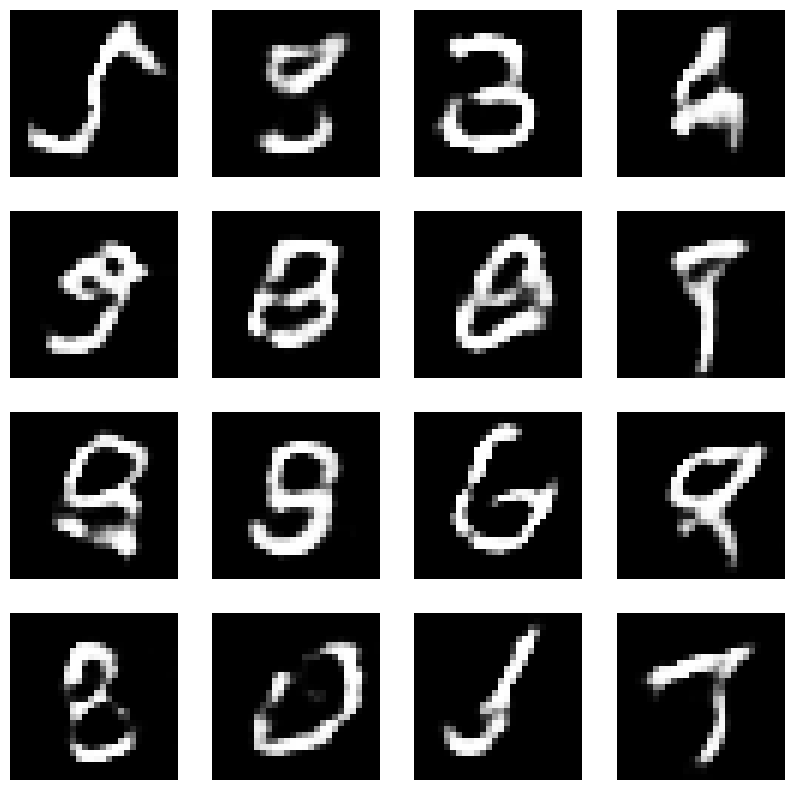

Epoch:  93


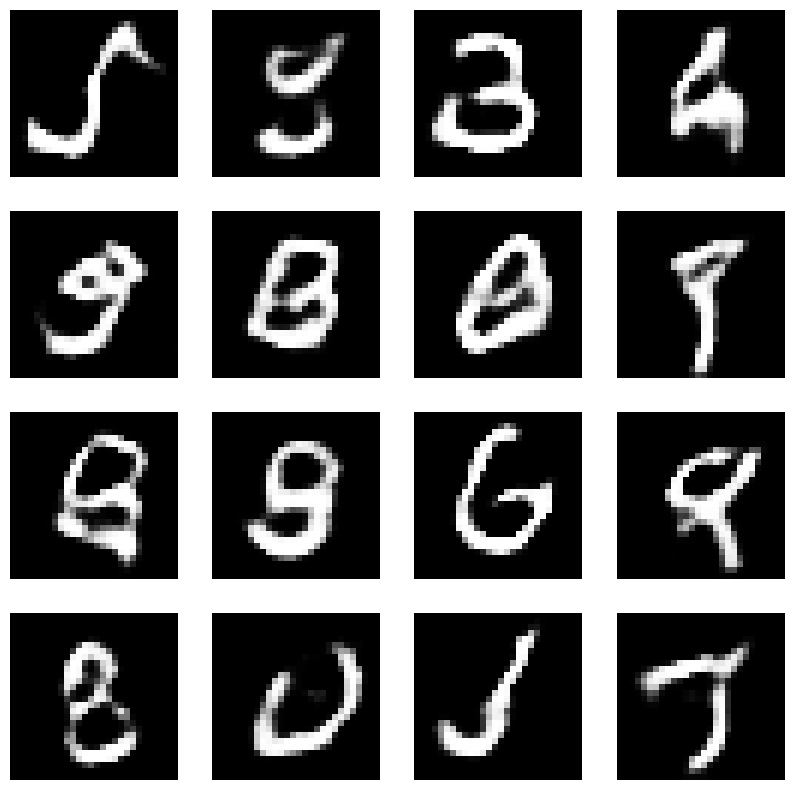

Epoch:  94


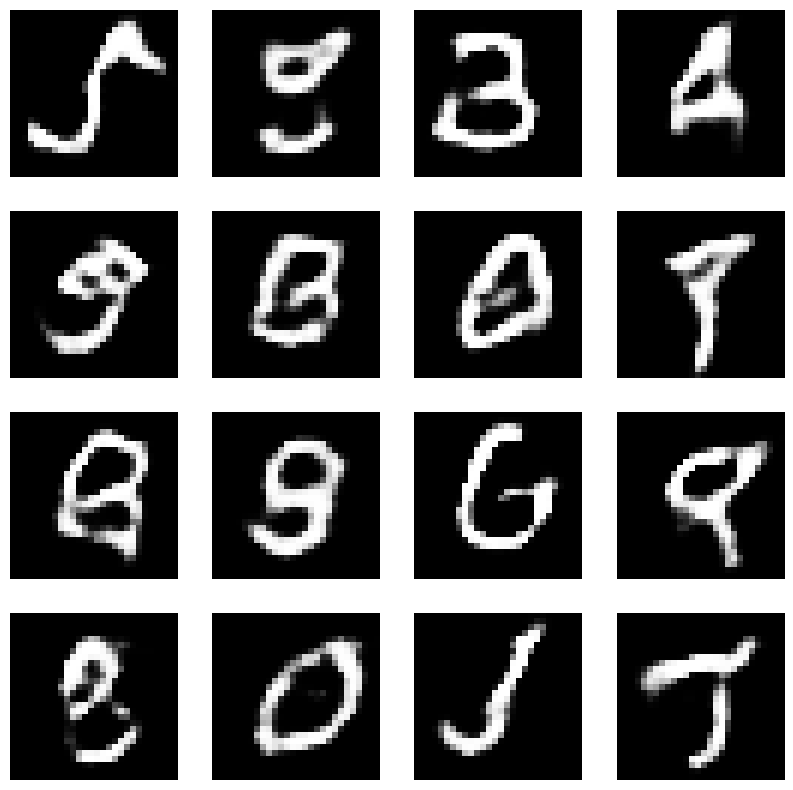

Epoch:  95


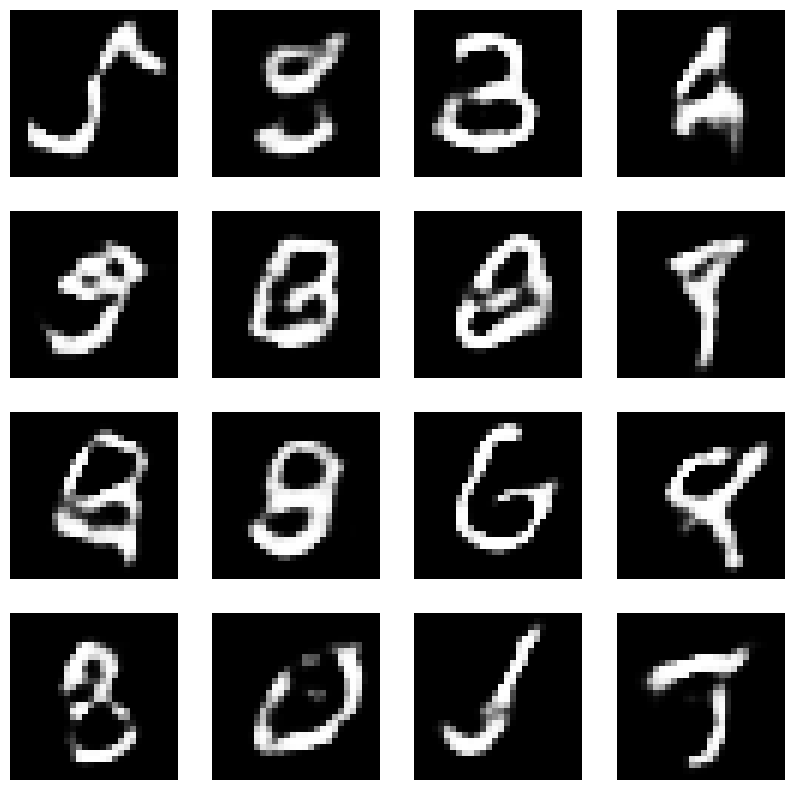

Epoch:  96


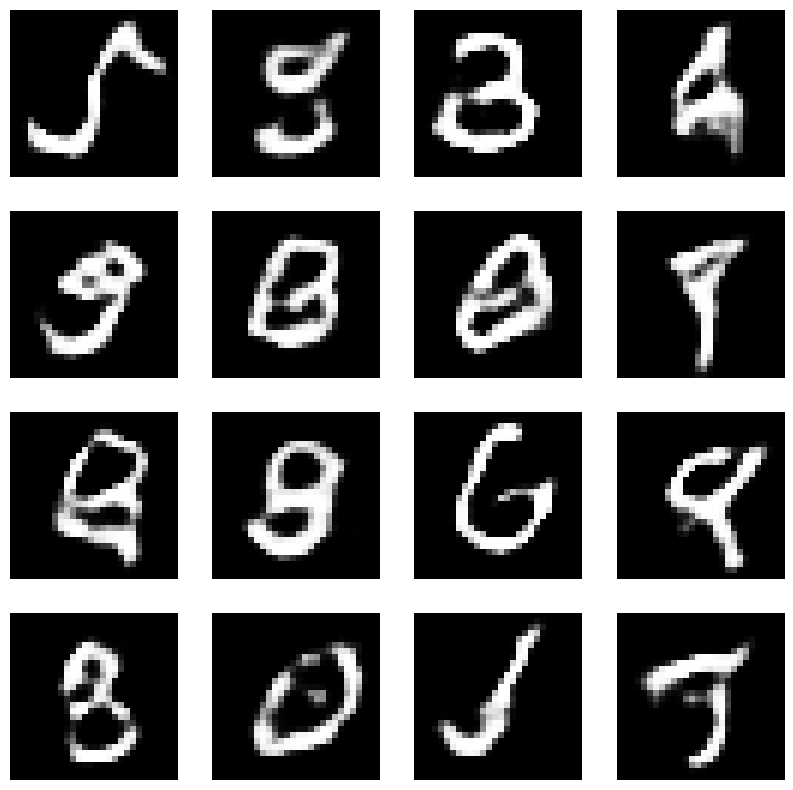

Epoch:  97


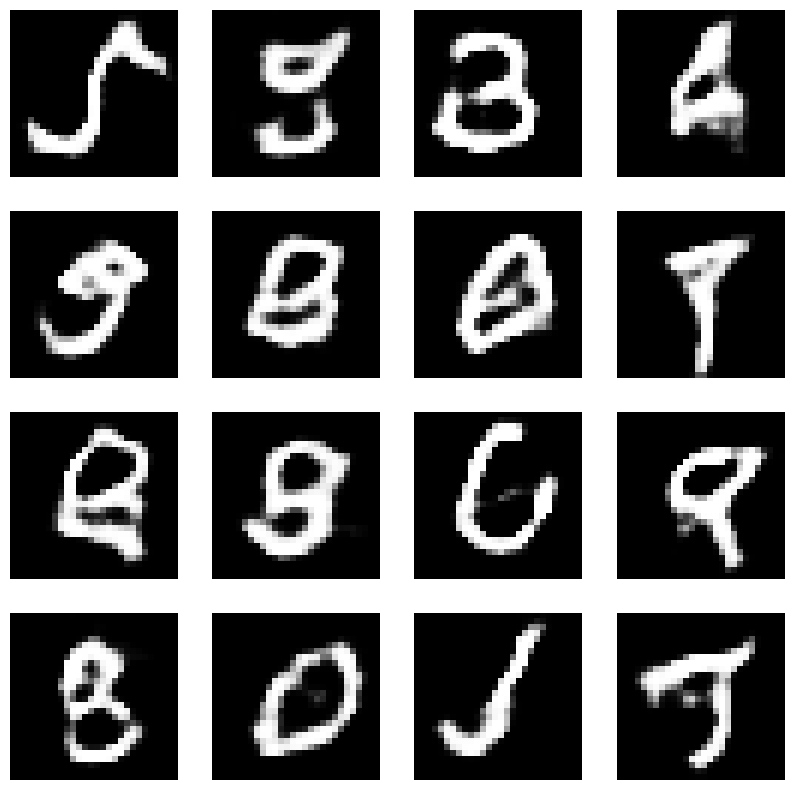

Epoch:  98


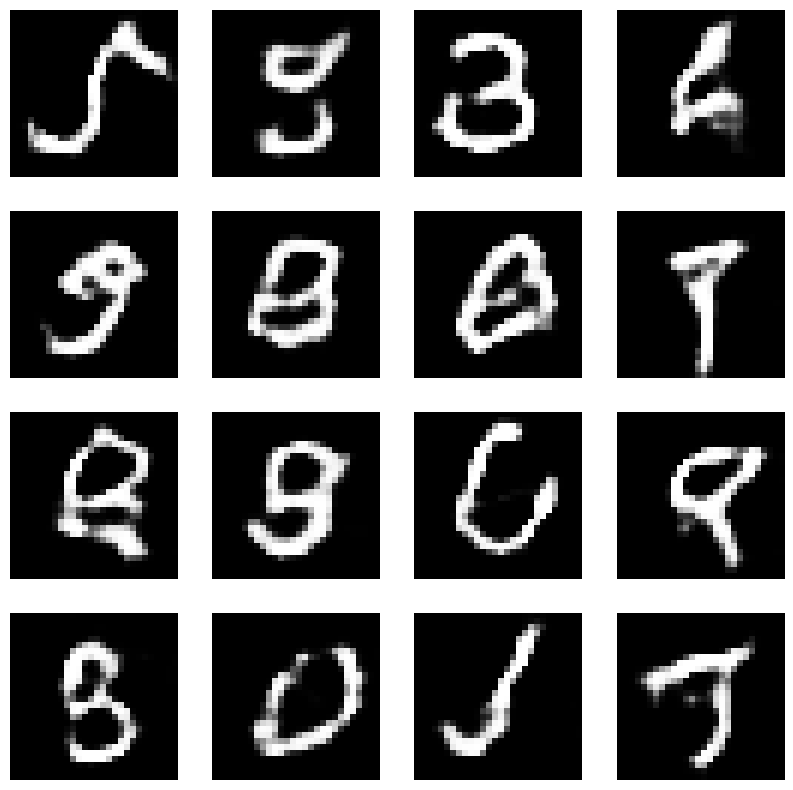

Epoch:  99


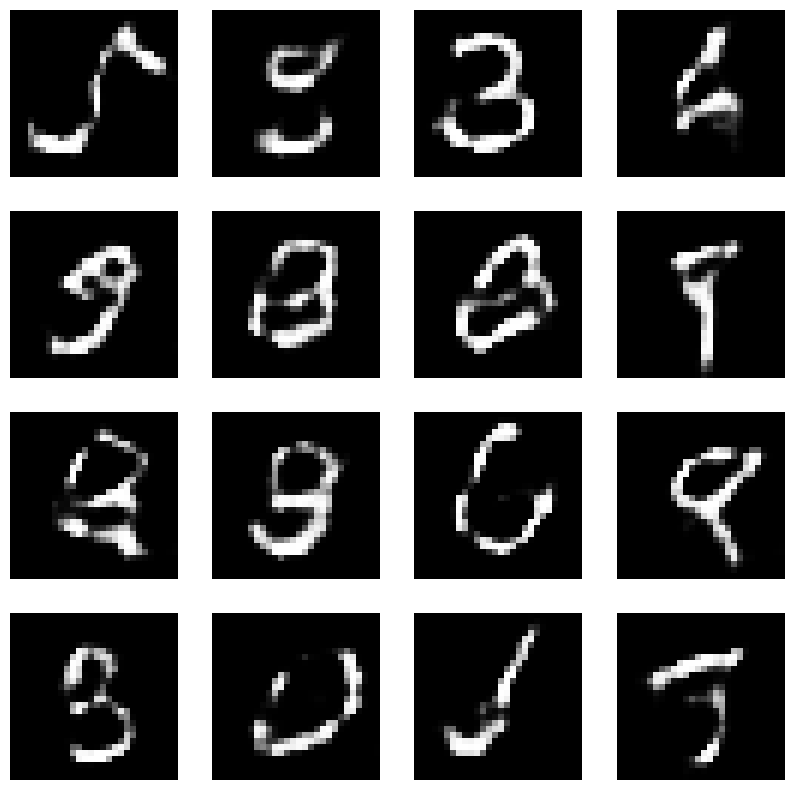

Epoch:  100


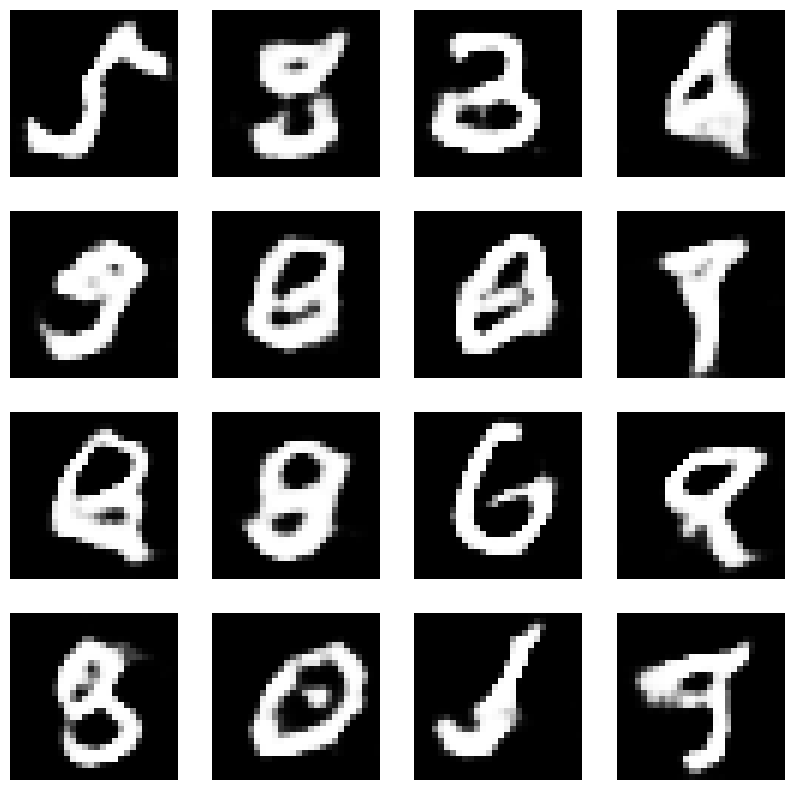

In [ ]:
train_gan(X_train, epochs, test_images)

For more information:
https://medium.com/@girish9851/step-by-step-introduction-to-deep-convolutional-generative-adversarial-networks-709ab83da7ea
